In [1]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
SEPAliveNodes = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 83, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 81, 81, 81, 81, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 73, 73, 73, 73, 73, 73, 73, 73, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 71, 71, 69, 69, 69, 69, 69, 69, 69, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 64, 64, 63, 62, 62, 61, 61, 61, 61, 61, 61, 61, 60, 60, 58, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 55, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 37, 37, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(len(SEPAliveNodes))
SEPDeadNodes = []
for i in range(0,len(SEPAliveNodes)):
    SEPDeadNodes.append(100-SEPAliveNodes[i])

EAMMHAliveNodes = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 83, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 81, 81, 81, 81, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 74, 74, 74, 73, 73, 73, 73, 73, 73, 73, 73, 73, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 71, 71, 69, 69, 69, 69, 69, 69, 69, 68, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 64, 64, 63, 62, 62, 61, 61, 61, 61, 61, 61, 61, 60, 60, 58, 57, 57, 57, 57, 57, 56, 56, 56, 56, 56, 56, 56, 55, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 52, 52, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 37, 37, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print(len(EAMMHAliveNodes))
EAMMHDeadNodes = []
for i in range(0,len(EAMMHAliveNodes)):
    EAMMHDeadNodes.append(100-EAMMHAliveNodes[i])


2000
2000


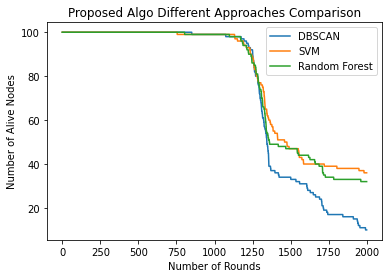

In [3]:
# At 0.5 J
xr = np.arange(0,2000,1)
AliveNodesDB = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 89, 89, 88, 88, 87, 87, 87, 86, 85, 84, 84, 83, 82, 82, 82, 82, 82, 82, 81, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 78, 77, 77, 76, 76, 76, 76, 76, 75, 74, 73, 72, 72, 72, 72, 70, 70, 70, 69, 69, 69, 68, 68, 67, 66, 65, 64, 64, 64, 63, 63, 62, 61, 61, 61, 61, 61, 61, 60, 60, 59, 59, 57, 57, 57, 57, 57, 56, 56, 56, 56, 55, 55, 54, 54, 54, 53, 52, 52, 51, 49, 49, 49, 49, 48, 48, 47, 46, 46, 45, 45, 42, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 22, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10]
AliveNodesSVM = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 89, 89, 88, 88, 88, 88, 88, 86, 86, 85, 85, 85, 84, 84, 83, 83, 83, 83, 83, 83, 83, 83, 82, 82, 82, 81, 81, 80, 80, 80, 80, 80, 80, 79, 79, 78, 78, 78, 78, 78, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 74, 73, 73, 73, 73, 73, 71, 71, 70, 69, 68, 67, 66, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 64, 63, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 56, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 45, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
AliveNodesRand = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 91, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 88, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 85, 85, 85, 85, 85, 85, 85, 85, 84, 84, 84, 82, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 80, 79, 79, 78, 77, 77, 77, 77, 77, 76, 75, 75, 75, 74, 74, 74, 74, 74, 74, 74, 74, 73, 73, 73, 72, 70, 70, 70, 70, 70, 69, 69, 67, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 65, 64, 63, 63, 62, 61, 61, 60, 59, 59, 58, 57, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 53, 53, 52, 52, 52, 51, 51, 51, 51, 51, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
plt.plot(xr,AliveNodesDB,label='DBSCAN')
plt.plot(xr,AliveNodesSVM,label='SVM')
plt.plot(xr,AliveNodesRand,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Alive Nodes')
plt.title('Proposed Algo Different Approaches Comparison')
plt.legend()
plt.show()



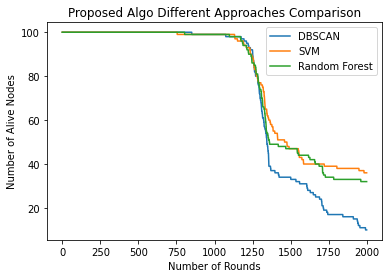

In [4]:
# At 0.5 J
xr = np.arange(0,2000,1)
AliveNodesDB = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 89, 89, 88, 88, 87, 87, 87, 86, 85, 84, 84, 83, 82, 82, 82, 82, 82, 82, 81, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 78, 77, 77, 76, 76, 76, 76, 76, 75, 74, 73, 72, 72, 72, 72, 70, 70, 70, 69, 69, 69, 68, 68, 67, 66, 65, 64, 64, 64, 63, 63, 62, 61, 61, 61, 61, 61, 61, 60, 60, 59, 59, 57, 57, 57, 57, 57, 56, 56, 56, 56, 55, 55, 54, 54, 54, 53, 52, 52, 51, 49, 49, 49, 49, 48, 48, 47, 46, 46, 45, 45, 42, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 22, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10]
AliveNodesSVM = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 89, 89, 88, 88, 88, 88, 88, 86, 86, 85, 85, 85, 84, 84, 83, 83, 83, 83, 83, 83, 83, 83, 82, 82, 82, 81, 81, 80, 80, 80, 80, 80, 80, 79, 79, 78, 78, 78, 78, 78, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 74, 73, 73, 73, 73, 73, 71, 71, 70, 69, 68, 67, 66, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 64, 63, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 56, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 45, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
AliveNodesRand = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 91, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 88, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 85, 85, 85, 85, 85, 85, 85, 85, 84, 84, 84, 82, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 80, 79, 79, 78, 77, 77, 77, 77, 77, 76, 75, 75, 75, 74, 74, 74, 74, 74, 74, 74, 74, 73, 73, 73, 72, 70, 70, 70, 70, 70, 69, 69, 67, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 65, 64, 63, 63, 62, 61, 61, 60, 59, 59, 58, 57, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 53, 53, 52, 52, 52, 51, 51, 51, 51, 51, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
plt.plot(xr,AliveNodesDB,label='DBSCAN')
plt.plot(xr,AliveNodesSVM,label='SVM')
plt.plot(xr,AliveNodesRand,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Alive Nodes')
plt.title('Proposed Algo Different Approaches Comparison')
plt.legend()
plt.show()

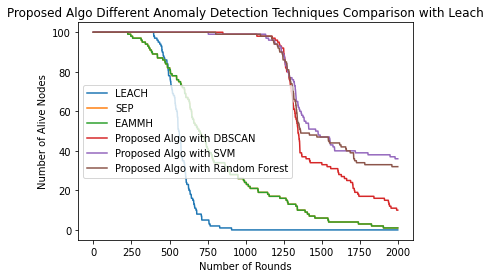

In [5]:
# At 0.5 J with leach
xr = np.arange(0,2000,1)
AliveNodesLeach = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 98, 98, 98, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 91, 91, 90, 90, 90, 90, 90, 90, 89, 88, 88, 88, 88, 88, 87, 87, 87, 87, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 84, 84, 84, 84, 84, 84, 82, 81, 81, 80, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 77, 76, 76, 75, 75, 74, 73, 73, 73, 72, 72, 72, 71, 71, 71, 70, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 68, 67, 67, 67, 65, 64, 64, 63, 63, 62, 61, 61, 61, 61, 61, 60, 60, 60, 60, 59, 57, 57, 57, 54, 51, 51, 51, 51, 50, 50, 50, 50, 49, 47, 47, 47, 46, 46, 46, 46, 46, 44, 44, 43, 40, 40, 38, 37, 37, 37, 37, 37, 37, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 33, 32, 31, 31, 31, 29, 29, 27, 27, 26, 26, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 19, 18, 18, 18, 18, 18, 18, 18, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 13, 13, 13, 13, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
AliveNodesDB = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 89, 89, 88, 88, 87, 87, 87, 86, 85, 84, 84, 83, 82, 82, 82, 82, 82, 82, 81, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 78, 77, 77, 76, 76, 76, 76, 76, 75, 74, 73, 72, 72, 72, 72, 70, 70, 70, 69, 69, 69, 68, 68, 67, 66, 65, 64, 64, 64, 63, 63, 62, 61, 61, 61, 61, 61, 61, 60, 60, 59, 59, 57, 57, 57, 57, 57, 56, 56, 56, 56, 55, 55, 54, 54, 54, 53, 52, 52, 51, 49, 49, 49, 49, 48, 48, 47, 46, 46, 45, 45, 42, 41, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 23, 23, 22, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10]
AliveNodesSVM = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 89, 89, 88, 88, 88, 88, 88, 86, 86, 85, 85, 85, 84, 84, 83, 83, 83, 83, 83, 83, 83, 83, 82, 82, 82, 81, 81, 80, 80, 80, 80, 80, 80, 79, 79, 78, 78, 78, 78, 78, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 74, 73, 73, 73, 73, 73, 71, 71, 70, 69, 68, 67, 66, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 64, 63, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 59, 58, 58, 58, 58, 58, 58, 58, 58, 58, 57, 57, 57, 57, 57, 57, 57, 56, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 46, 46, 45, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
AliveNodesRand = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 91, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 88, 87, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 85, 85, 85, 85, 85, 85, 85, 85, 85, 84, 84, 84, 82, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 80, 79, 79, 78, 77, 77, 77, 77, 77, 76, 75, 75, 75, 74, 74, 74, 74, 74, 74, 74, 74, 73, 73, 73, 72, 70, 70, 70, 70, 70, 69, 69, 67, 66, 66, 66, 66, 66, 66, 66, 66, 65, 65, 65, 65, 64, 63, 63, 62, 61, 61, 60, 59, 59, 58, 57, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 53, 53, 52, 52, 52, 51, 51, 51, 51, 51, 50, 50, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 46, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 43, 43, 43, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 38, 36, 36, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
plt.plot(xr,AliveNodesLeach,label='LEACH')
plt.plot(xr,SEPAliveNodes,label='SEP')
plt.plot(xr,EAMMHAliveNodes,label='EAMMH')
plt.plot(xr,AliveNodesDB,label='Proposed Algo with DBSCAN')
plt.plot(xr,AliveNodesSVM,label='Proposed Algo with SVM')
plt.plot(xr,AliveNodesRand,label='Proposed Algo with Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Alive Nodes')
plt.title('Proposed Algo Different Anomaly Detection Techniques Comparison with Leach')
plt.legend()
plt.show()

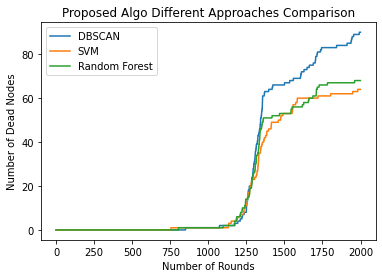

In [6]:
# At 0.5 J (DeadNodes)
xr = np.arange(0,2000,1)
DeadNodesDB = []
DeadNodesSVM = []
DeadNodesRand = []
for i in range(0,len(AliveNodesDB)):
    DeadNodesDB.append(100-AliveNodesDB[i])
    DeadNodesSVM.append(100-AliveNodesSVM[i])
    DeadNodesRand.append(100-AliveNodesRand[i])
plt.plot(xr,DeadNodesDB,label='DBSCAN')
plt.plot(xr,DeadNodesSVM,label='SVM')
plt.plot(xr,DeadNodesRand,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Dead Nodes')
plt.title('Proposed Algo Different Approaches Comparison')
plt.legend()
plt.show()



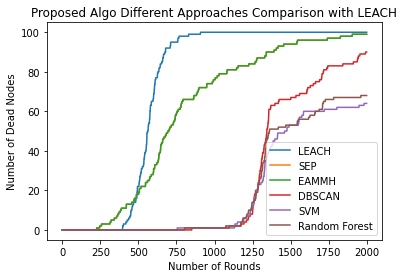

In [7]:
# At 0.5 J with Leach (Dead Nodes)
xr = np.arange(0,2000,1)
DeadNodesDB = []
DeadNodesSVM = []
DeadNodesRand = []
DeadNodesLeach = []
for i in range(0,len(AliveNodesDB)):
    DeadNodesDB.append(100-AliveNodesDB[i])
    DeadNodesSVM.append(100-AliveNodesSVM[i])
    DeadNodesRand.append(100-AliveNodesRand[i])
    DeadNodesLeach.append(100-AliveNodesLeach[i])
plt.plot(xr,DeadNodesLeach,label='LEACH')
plt.plot(xr,SEPDeadNodes,label='SEP')
plt.plot(xr,EAMMHDeadNodes,label='EAMMH')
plt.plot(xr,DeadNodesDB,label='DBSCAN')
plt.plot(xr,DeadNodesSVM,label='SVM')
plt.plot(xr,DeadNodesRand,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Dead Nodes')
plt.title('Proposed Algo Different Approaches Comparison with LEACH')
plt.legend()
plt.show()

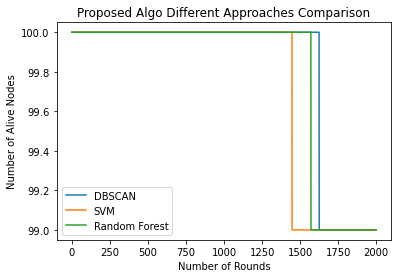

In [8]:
#At 1 J
xr = np.arange(0,2000,1)
AliveNodesDB1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
AliveNodesSVM1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
#AliveNodesRand1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
AliveNodesRand1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
plt.plot(xr,AliveNodesDB1,label='DBSCAN')
plt.plot(xr,AliveNodesSVM1,label='SVM')
plt.plot(xr,AliveNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Alive Nodes')
plt.title('Proposed Algo Different Approaches Comparison')
plt.legend()
plt.show()

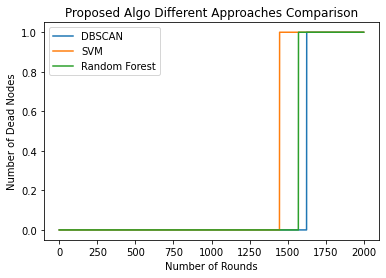

In [9]:
# At 1 J (DeadNodes)
xr = np.arange(0,2000,1)
DeadNodesDB1 = []
DeadNodesSVM1 = []
DeadNodesRand1 = []
for i in range(0,len(AliveNodesDB)):
    DeadNodesDB1.append(100-AliveNodesDB1[i])
    DeadNodesSVM1.append(100-AliveNodesSVM1[i])
    DeadNodesRand1.append(100-AliveNodesRand1[i])
plt.plot(xr,DeadNodesDB1,label='DBSCAN')
plt.plot(xr,DeadNodesSVM1,label='SVM')
plt.plot(xr,DeadNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Dead Nodes')
plt.title('Proposed Algo Different Approaches Comparison')
plt.legend()
plt.show()

In [10]:
pacTobsSVM = [199, 295, 391, 487, 583, 679, 775, 871, 967, 1063, 1159, 1255, 1351, 1447, 1543, 1639, 1735, 1831, 1927, 2023, 2119, 2215, 2311, 2407, 2503, 2599, 2695, 2791, 2887, 2983, 3079, 3175, 3271, 3367, 3463, 3559, 3655, 3751, 3847, 3943, 4039, 4135, 4231, 4327, 4423, 4519, 4615, 4711, 4807, 4903, 4999, 5095, 5191, 5287, 5383, 5479, 5575, 5671, 5767, 5863, 5959, 6055, 6151, 6247, 6343, 6439, 6535, 6631, 6727, 6823, 6919, 7015, 7111, 7207, 7303, 7399, 7495, 7591, 7687, 7783, 7879, 7975, 8071, 8167, 8263, 8359, 8455, 8551, 8647, 8743, 8839, 8935, 9031, 9127, 9223, 9319, 9415, 9511, 9607, 9703, 9799, 9895, 9991, 10087, 10183, 10279, 10375, 10471, 10567, 10663, 10759, 10855, 10951, 11047, 11143, 11239, 11335, 11431, 11527, 11623, 11719, 11815, 11911, 12007, 12103, 12199, 12295, 12391, 12487, 12583, 12679, 12775, 12871, 12967, 13063, 13159, 13255, 13351, 13447, 13543, 13639, 13735, 13831, 13927, 14023, 14119, 14215, 14311, 14407, 14503, 14599, 14695, 14791, 14887, 14983, 15079, 15175, 15271, 15367, 15463, 15559, 15655, 15751, 15847, 15943, 16039, 16135, 16231, 16327, 16423, 16519, 16615, 16711, 16807, 16903, 16999, 17095, 17191, 17287, 17383, 17479, 17575, 17671, 17767, 17863, 17959, 18055, 18151, 18247, 18343, 18439, 18535, 18631, 18727, 18823, 18919, 19015, 19111, 19207, 19303, 19399, 19495, 19591, 19687, 19783, 19879, 19975, 20071, 20167, 20263, 20359, 20455, 20551, 20647, 20743, 20839, 20935, 21031, 21127, 21223, 21319, 21415, 21511, 21607, 21703, 21799, 21895, 21991, 22087, 22183, 22279, 22375, 22471, 22567, 22663, 22759, 22855, 22951, 23047, 23143, 23239, 23335, 23431, 23527, 23623, 23719, 23815, 23911, 24007, 24103, 24199, 24295, 24391, 24487, 24583, 24679, 24775, 24871, 24967, 25063, 25159, 25255, 25351, 25447, 25543, 25639, 25735, 25831, 25927, 26023, 26119, 26215, 26311, 26407, 26503, 26599, 26695, 26791, 26887, 26983, 27079, 27175, 27271, 27367, 27463, 27559, 27655, 27751, 27847, 27943, 28039, 28135, 28231, 28327, 28423, 28519, 28615, 28711, 28807, 28903, 28999, 29095, 29191, 29287, 29383, 29479, 29575, 29671, 29767, 29863, 29959, 30055, 30151, 30247, 30343, 30439, 30535, 30631, 30727, 30823, 30919, 31015, 31111, 31207, 31303, 31399, 31495, 31591, 31687, 31783, 31879, 31975, 32071, 32167, 32263, 32359, 32455, 32551, 32647, 32743, 32839, 32935, 33031, 33127, 33223, 33319, 33415, 33511, 33607, 33703, 33799, 33895, 33991, 34087, 34183, 34279, 34375, 34471, 34567, 34663, 34759, 34855, 34951, 35047, 35143, 35239, 35335, 35431, 35527, 35623, 35719, 35815, 35911, 36007, 36103, 36199, 36295, 36391, 36487, 36583, 36679, 36775, 36871, 36967, 37063, 37159, 37255, 37351, 37447, 37543, 37639, 37735, 37831, 37927, 38023, 38119, 38215, 38311, 38407, 38503, 38599, 38695, 38791, 38887, 38983, 39079, 39175, 39271, 39367, 39463, 39559, 39655, 39751, 39847, 39943, 40039, 40135, 40231, 40327, 40423, 40519, 40615, 40711, 40807, 40903, 40999, 41095, 41191, 41287, 41383, 41479, 41575, 41671, 41767, 41863, 41959, 42055, 42151, 42247, 42343, 42439, 42535, 42631, 42727, 42823, 42919, 43015, 43111, 43207, 43303, 43399, 43495, 43591, 43687, 43783, 43879, 43975, 44071, 44167, 44263, 44359, 44455, 44551, 44647, 44743, 44839, 44935, 45031, 45127, 45223, 45319, 45415, 45511, 45607, 45703, 45799, 45895, 45991, 46087, 46183, 46279, 46375, 46471, 46567, 46663, 46759, 46855, 46951, 47047, 47143, 47239, 47335, 47431, 47527, 47623, 47719, 47815, 47911, 48007, 48103, 48199, 48295, 48391, 48487, 48583, 48679, 48775, 48871, 48967, 49063, 49159, 49255, 49351, 49447, 49543, 49639, 49735, 49831, 49927, 50023, 50119, 50215, 50311, 50407, 50503, 50599, 50695, 50791, 50887, 50983, 51079, 51175, 51271, 51367, 51463, 51559, 51655, 51751, 51847, 51943, 52039, 52135, 52231, 52327, 52423, 52519, 52615, 52711, 52807, 52903, 52999, 53095, 53191, 53287, 53383, 53479, 53575, 53671, 53767, 53863, 53959, 54055, 54151, 54247, 54343, 54439, 54535, 54631, 54727, 54823, 54919, 55015, 55111, 55207, 55303, 55399, 55495, 55591, 55687, 55783, 55879, 55975, 56071, 56167, 56263, 56359, 56455, 56551, 56647, 56743, 56839, 56935, 57032, 57129, 57226, 57323, 57420, 57516, 57612, 57708, 57804, 57900, 57996, 58092, 58188, 58284, 58380, 58476, 58572, 58668, 58764, 58883, 59002, 59121, 59240, 59359, 59478, 59597, 59716, 59814, 59912, 60010, 60108, 60206, 60304, 60402, 60521, 60640, 60759, 60878, 60997, 61097, 61197, 61296, 61395, 61494, 61593, 61692, 61791, 61889, 61988, 62087, 62186, 62285, 62384, 62483, 62582, 62681, 62780, 62879, 62978, 63077, 63176, 63275, 63374, 63473, 63572, 63671, 63770, 63869, 63967, 64065, 64162, 64259, 64356, 64453, 64550, 64647, 64744, 64841, 64938, 65035, 65132, 65229, 65326, 65423, 65520, 65617, 65714, 65811, 65908, 66005, 66102, 66199, 66303, 66407, 66511, 66615, 66719, 66823, 66927, 67031, 67135, 67239, 67343, 67438, 67533, 67628, 67723, 67831, 67939, 68047, 68155, 68263, 68371, 68479, 68587, 68695, 68803, 68911, 69019, 69127, 69235, 69343, 69451, 69559, 69667, 69784, 69901, 70013, 70125, 70237, 70349, 70460, 70571, 70682, 70793, 70904, 71015, 71126, 71237, 71348, 71459, 71570, 71681, 71792, 71903, 72014, 72125, 72236, 72347, 72458, 72569, 72680, 72791, 72902, 73013, 73124, 73235, 73346, 73457, 73568, 73679, 73790, 73901, 74012, 74123, 74234, 74345, 74456, 74567, 74678, 74789, 74900, 75011, 75122, 75233, 75344, 75455, 75566, 75677, 75788, 75899, 76010, 76121, 76232, 76343, 76454, 76565, 76676, 76787, 76898, 77009, 77120, 77231, 77342, 77453, 77564, 77666, 77768, 77870, 77972, 78074, 78176, 78278, 78380, 78482, 78584, 78686, 78788, 78890, 78992, 79094, 79196, 79298, 79400, 79503, 79606, 79709, 79812, 79915, 80018, 80121, 80224, 80327, 80430, 80544, 80658, 80772, 80886, 81000, 81114, 81228, 81342, 81456, 81570, 81684, 81798, 81912, 82026, 82140, 82254, 82368, 82482, 82596, 82710, 82824, 82926, 83028, 83130, 83232, 83334, 83436, 83538, 83640, 83742, 83844, 83946, 84048, 84150, 84252, 84354, 84456, 84558, 84669, 84780, 84891, 85002, 85113, 85224, 85335, 85446, 85557, 85668, 85779, 85890, 86016, 86142, 86268, 86394, 86520, 86646, 86772, 86898, 87024, 87150, 87276, 87402, 87528, 87654, 87767, 87880, 87993, 88106, 88219, 88332, 88445, 88558, 88671, 88784, 88897, 89010, 89123, 89236, 89349, 89461, 89573, 89685, 89797, 89909, 90021, 90132, 90243, 90354, 90465, 90576, 90687, 90798, 90909, 91020, 91131, 91242, 91353, 91464, 91575, 91686, 91797, 91908, 92019, 92130, 92241, 92369, 92497, 92625, 92753, 92881, 92990, 93099, 93208, 93317, 93426, 93535, 93644, 93753, 93862, 93992, 94122, 94252, 94382, 94512, 94642, 94772, 94902, 95032, 95141, 95250, 95359, 95468, 95577, 95686, 95795, 95904, 96013, 96143, 96273, 96403, 96533, 96654, 96775, 96896, 97017, 97138, 97259, 97380, 97501, 97622, 97743, 97864, 97985, 98093, 98201, 98309, 98417, 98548, 98682, 98816, 98950, 99084, 99218, 99352, 99477, 99602, 99727, 99852, 99977, 100102, 100238, 100374, 100510, 100646, 100782, 100918, 101054, 101190, 101326, 101462, 101598, 101734, 101870, 102006, 102142, 102278, 102414, 102551, 102688, 102825, 102962, 103099, 103237, 103375, 103513, 103651, 103789, 103927, 104065, 104203, 104336, 104469, 104602, 104735, 104868, 105001, 105134, 105267, 105400, 105533, 105666, 105799, 105932, 106065, 106198, 106331, 106473, 106615, 106757, 106899, 107041, 107183, 107325, 107467, 107609, 107744, 107879, 108014, 108149, 108284, 108419, 108554, 108689, 108824, 108959, 109073, 109187, 109301, 109415, 109529, 109643, 109757, 109871, 109985, 110099, 110213, 110327, 110441, 110555, 110669, 110783, 110897, 111011, 111125, 111259, 111393, 111528, 111663, 111798, 111933, 112068, 112203, 112338, 112473, 112608, 112743, 112878, 113013, 113148, 113283, 113418, 113553, 113688, 113823, 113958, 114093, 114228, 114346, 114464, 114582, 114700, 114818, 114936, 115073, 115210, 115347, 115484, 115621, 115758, 115895, 116032, 116169, 116306, 116441, 116576, 116711, 116846, 116981, 117116, 117251, 117386, 117521, 117657, 117793, 117929, 118065, 118201, 118337, 118473, 118609, 118745, 118881, 119017, 119153, 119289, 119425, 119561, 119697, 119833, 119969, 120105, 120241, 120377, 120513, 120649, 120785, 120921, 121057, 121193, 121329, 121465, 121601, 121737, 121873, 122009, 122145, 122281, 122417, 122558, 122699, 122840, 122981, 123122, 123263, 123404, 123545, 123686, 123827, 123968, 124089, 124210, 124331, 124452, 124573, 124694, 124815, 124936, 125057, 125178, 125299, 125420, 125541, 125662, 125783, 125904, 126025, 126146, 126267, 126388, 126509, 126630, 126751, 126872, 127004, 127136, 127268, 127400, 127532, 127654, 127776, 127898, 128020, 128142, 128264, 128386, 128508, 128630, 128752, 128874, 128996, 129118, 129240, 129362, 129484, 129606, 129728, 129850, 129972, 130108, 130244, 130380, 130516, 130652, 130786, 130914, 131042, 131170, 131298, 131426, 131554, 131682, 131810, 131938, 132066, 132182, 132298, 132414, 132530, 132646, 132762, 132878, 132994, 133110, 133226, 133342, 133458, 133574, 133690, 133806, 133922, 134038, 134154, 134270, 134386, 134502, 134618, 134734, 134869, 135004, 135139, 135246, 135353, 135470, 135573, 135676, 135779, 135882, 135985, 136088, 136191, 136294, 136397, 136500, 136603, 136706, 136809, 136912, 137015, 137128, 137241, 137354, 137467, 137564, 137661, 137758, 137855, 137948, 138053, 138158, 138263, 138368, 138455, 138542, 138629, 138714, 138799, 138882, 138963, 139064, 139165, 139266, 139367, 139460, 139553, 139642, 139735, 139828, 139921, 140010, 140099, 140188, 140277, 140366, 140455, 140530, 140605, 140680, 140755, 140828, 140883, 140936, 140989, 141042, 141095, 141148, 141201, 141254, 141307, 141392, 141477, 141546, 141615, 141684, 141749, 141812, 141891, 141970, 142029, 142083, 142139, 142195, 142251, 142307, 142363, 142419, 142475, 142531, 142592, 142653, 142714, 142775, 142836, 142897, 142958, 143019, 143080, 143141, 143202, 143261, 143320, 143379, 143438, 143497, 143558, 143619, 143680, 143741, 143802, 143839, 143876, 143913, 143949, 143985, 144021, 144057, 144091, 144125, 144159, 144193, 144227, 144261, 144321, 144381, 144409, 144437, 144465, 144493, 144521, 144549, 144577, 144605, 144633, 144669, 144713, 144757, 144801, 144845, 144889, 144923, 144957, 144991, 145025, 145059, 145093, 145127, 145161, 145195, 145229, 145263, 145297, 145331, 145365, 145399, 145433, 145467, 145501, 145535, 145569, 145603, 145637, 145671, 145705, 145739, 145773, 145807, 145841, 145875, 145905, 145935, 145965, 145995, 146025, 146055, 146085, 146115, 146148, 146181, 146214, 146247, 146280, 146313, 146346, 146379, 146412, 146445, 146478, 146511, 146544, 146577, 146610, 146643, 146676, 146709, 146740, 146771, 146802, 146833, 146864, 146895, 146929, 146963, 146987, 147011, 147035, 147059, 147083, 147107, 147131, 147155, 147179, 147203, 147227, 147251, 147275, 147299, 147323, 147347, 147371, 147395, 147419, 147441, 147463, 147485, 147507, 147529, 147551, 147573, 147595, 147614, 147633, 147652, 147687, 147722, 147757, 147792, 147827, 147862, 147897, 147932, 147967, 148002, 148037, 148072, 148107, 148142, 148177, 148212, 148247, 148282, 148317, 148352, 148387, 148422, 148457, 148492, 148527, 148562, 148597, 148632, 148667, 148702, 148737, 148772, 148807, 148842, 148877, 148912, 148927, 148942, 148957, 148972, 148987, 149002, 149017, 149032, 149047, 149062, 149077, 149092, 149107, 149122, 149137, 149152, 149167, 149182, 149197, 149212, 149227, 149242, 149257, 149272, 149287, 149302, 149317, 149332, 149347, 149362, 149377, 149392, 149407, 149422, 149437, 149452, 149467, 149482, 149497, 149512, 149527, 149542, 149557, 149572, 149587, 149602, 149617, 149632, 149647, 149662, 149677, 149692, 149707, 149722, 149737, 149752, 149767, 149782, 149805, 149828, 149851, 149874, 149897, 149920, 149943, 149966, 149989, 150012, 150035, 150058, 150081, 150104, 150127, 150148, 150169, 150190, 150211, 150232, 150253, 150274, 150295, 150316, 150337, 150358, 150379, 150400, 150421, 150442, 150463, 150482, 150501, 150520, 150539, 150558, 150577, 150596, 150615, 150634, 150653, 150672, 150691, 150710, 150727, 150744, 150761, 150778, 150795, 150810, 150825, 150840, 150855, 150870, 150889, 150908, 150921, 150934, 150947, 150960, 150973, 150986, 150999, 151012, 151025, 151038, 151051, 151064, 151077, 151090, 151103, 151116, 151129, 151142, 151155, 151168, 151181, 151194, 151207, 151220, 151233, 151246, 151259, 151272, 151285, 151298, 151311, 151324, 151327, 151330, 151333, 151336, 151339, 151342, 151345, 151348, 151351, 151354, 151357, 151360, 151363, 151366, 151369, 151372, 151375, 151378, 151381, 151384, 151387, 151390, 151393, 151396, 151399, 151402, 151405, 151408, 151411, 151414, 151417, 151420, 151423, 151426, 151429, 151432, 151435, 151438, 151441, 151444, 151447, 151450, 151453, 151456, 151459, 151462, 151465, 151468, 151471, 151474, 151477, 151480, 151483, 151486, 151489, 151492, 151495, 151498, 151501, 151504, 151507, 151510, 151513, 151516, 151519, 151522, 151525, 151528, 151531, 151534, 151537, 151540, 151543, 151546, 151549, 151552, 151555, 151558, 151561, 151564, 151567, 151570, 151573, 151576, 151579, 151582, 151585, 151588, 151591, 151594, 151597, 151600, 151603, 151606, 151609, 151612, 151615, 151618, 151621, 151624, 151627, 151630, 151633, 151636, 151639, 151642, 151645, 151648, 151651, 151654, 151657, 151660, 151663, 151666, 151669, 151672, 151675, 151678, 151681, 151684, 151687, 151690, 151693, 151696, 151699, 151702, 151705, 151708, 151711, 151714, 151717, 151720, 151723, 151726, 151729, 151732, 151735, 151738, 151741, 151744, 151747, 151750, 151753, 151756, 151759, 151762, 151765, 151768, 151771, 151774, 151777, 151780, 151783, 151786, 151789, 151792, 151795, 151798, 151801, 151804, 151807, 151810, 151813, 151816, 151819, 151822, 151825, 151828, 151831, 151834, 151837, 151840, 151843, 151846, 151849, 151852, 151855, 151858, 151861, 151864, 151867, 151870, 151873, 151876, 151879, 151882, 151885, 151888, 151891, 151894, 151897, 151900, 151903, 151906, 151909, 151912, 151915, 151918, 151921, 151924, 151927, 151930, 151933, 151936, 151939, 151942, 151945, 151948, 151951, 151954, 151957, 151960, 151963, 151966, 151969, 151972, 151975, 151978, 151981, 151984, 151987, 151990, 151993, 151996, 151999, 152002, 152005, 152008, 152011, 152014, 152017, 152020, 152023, 152026, 152029, 152032, 152035, 152038, 152041, 152044, 152047, 152050, 152053, 152056, 152059, 152062, 152065, 152068, 152071, 152074, 152077, 152080, 152083, 152086, 152089, 152092, 152095, 152098, 152101, 152104, 152107, 152110, 152113, 152116, 152119, 152122, 152125, 152128, 152131, 152134, 152137, 152140, 152143, 152146, 152149, 152152, 152155, 152158, 152161, 152164, 152167, 152170, 152173, 152176, 152179, 152182, 152185, 152188, 152191, 152194, 152197, 152200, 152203, 152206, 152209, 152212, 152215, 152218, 152221, 152224, 152227, 152230, 152233, 152236, 152239, 152242, 152245, 152248, 152251, 152254, 152257, 152260, 152263, 152266, 152269, 152272, 152275, 152278, 152281, 152284, 152287, 152290, 152293, 152296, 152299, 152302, 152305, 152308, 152311, 152314, 152317]

pacTobsDB = [201, 299, 397, 495, 593, 691, 789, 887, 985, 1083, 1181, 1279, 1377, 1475, 1573, 1671, 1769, 1867, 1965, 2063, 2161, 2259, 2357, 2455, 2553, 2651, 2749, 2847, 2945, 3043, 3141, 3239, 3337, 3435, 3533, 3631, 3729, 3827, 3925, 4023, 4121, 4219, 4317, 4415, 4513, 4611, 4709, 4807, 4905, 5003, 5101, 5199, 5297, 5395, 5493, 5591, 5689, 5787, 5885, 5983, 6081, 6179, 6277, 6375, 6473, 6571, 6669, 6767, 6865, 6963, 7061, 7159, 7257, 7355, 7453, 7551, 7649, 7747, 7845, 7943, 8041, 8139, 8237, 8335, 8433, 8531, 8629, 8727, 8825, 8923, 9021, 9119, 9217, 9315, 9413, 9511, 9609, 9707, 9805, 9903, 10001, 10099, 10197, 10295, 10393, 10491, 10589, 10687, 10785, 10883, 10981, 11079, 11177, 11275, 11373, 11471, 11569, 11667, 11765, 11863, 11961, 12059, 12157, 12255, 12353, 12451, 12549, 12647, 12745, 12843, 12941, 13039, 13137, 13235, 13333, 13431, 13529, 13627, 13725, 13823, 13921, 14019, 14117, 14215, 14313, 14411, 14509, 14607, 14705, 14803, 14901, 14999, 15097, 15195, 15293, 15391, 15489, 15587, 15685, 15783, 15881, 15979, 16077, 16175, 16273, 16371, 16469, 16567, 16665, 16763, 16861, 16959, 17057, 17155, 17253, 17351, 17449, 17547, 17645, 17743, 17841, 17939, 18037, 18135, 18233, 18331, 18429, 18527, 18625, 18723, 18821, 18919, 19017, 19115, 19213, 19311, 19409, 19507, 19605, 19703, 19801, 19899, 19997, 20095, 20193, 20291, 20389, 20487, 20585, 20683, 20781, 20879, 20977, 21075, 21173, 21271, 21369, 21467, 21565, 21663, 21761, 21859, 21957, 22055, 22153, 22251, 22349, 22447, 22545, 22643, 22741, 22839, 22937, 23035, 23133, 23231, 23329, 23427, 23525, 23623, 23721, 23819, 23917, 24015, 24113, 24211, 24309, 24407, 24505, 24603, 24701, 24799, 24897, 24995, 25093, 25191, 25289, 25387, 25485, 25583, 25681, 25779, 25877, 25975, 26073, 26171, 26269, 26367, 26465, 26563, 26661, 26759, 26857, 26955, 27053, 27151, 27249, 27347, 27445, 27543, 27641, 27739, 27837, 27935, 28033, 28131, 28229, 28327, 28425, 28523, 28621, 28719, 28817, 28915, 29013, 29111, 29209, 29307, 29405, 29503, 29601, 29699, 29797, 29895, 29993, 30091, 30189, 30287, 30385, 30483, 30581, 30679, 30777, 30875, 30973, 31071, 31169, 31267, 31365, 31463, 31561, 31659, 31757, 31855, 31953, 32051, 32149, 32247, 32345, 32443, 32541, 32639, 32737, 32835, 32933, 33031, 33129, 33227, 33325, 33423, 33521, 33619, 33717, 33815, 33913, 34011, 34109, 34207, 34305, 34403, 34501, 34599, 34697, 34795, 34893, 34991, 35089, 35187, 35285, 35383, 35481, 35579, 35677, 35775, 35873, 35971, 36069, 36167, 36265, 36363, 36461, 36559, 36657, 36755, 36853, 36951, 37049, 37147, 37245, 37343, 37441, 37539, 37637, 37735, 37833, 37931, 38029, 38127, 38225, 38323, 38421, 38519, 38617, 38715, 38813, 38911, 39009, 39107, 39205, 39303, 39401, 39499, 39597, 39695, 39793, 39891, 39989, 40087, 40185, 40283, 40381, 40479, 40577, 40675, 40773, 40871, 40969, 41067, 41165, 41263, 41361, 41459, 41557, 41655, 41753, 41851, 41949, 42047, 42145, 42243, 42341, 42439, 42537, 42635, 42733, 42831, 42929, 43027, 43125, 43223, 43321, 43419, 43517, 43615, 43713, 43811, 43909, 44007, 44105, 44203, 44301, 44399, 44497, 44595, 44693, 44791, 44889, 44987, 45085, 45183, 45281, 45379, 45477, 45575, 45673, 45771, 45869, 45967, 46065, 46163, 46261, 46359, 46457, 46555, 46653, 46751, 46849, 46947, 47045, 47143, 47241, 47339, 47437, 47535, 47633, 47731, 47829, 47927, 48025, 48123, 48221, 48319, 48417, 48515, 48613, 48711, 48809, 48907, 49005, 49103, 49201, 49299, 49397, 49495, 49593, 49691, 49789, 49887, 49985, 50083, 50181, 50279, 50377, 50475, 50573, 50671, 50769, 50867, 50965, 51063, 51161, 51259, 51357, 51455, 51553, 51651, 51749, 51847, 51945, 52043, 52141, 52239, 52337, 52435, 52533, 52631, 52729, 52827, 52925, 53023, 53121, 53219, 53317, 53415, 53513, 53611, 53709, 53807, 53905, 54003, 54101, 54199, 54297, 54395, 54493, 54591, 54689, 54787, 54885, 54983, 55081, 55179, 55277, 55375, 55473, 55571, 55669, 55767, 55865, 55963, 56061, 56159, 56257, 56355, 56453, 56551, 56649, 56747, 56845, 56943, 57041, 57139, 57237, 57335, 57433, 57531, 57629, 57727, 57825, 57923, 58021, 58119, 58218, 58317, 58416, 58515, 58614, 58712, 58810, 58908, 59006, 59104, 59202, 59300, 59398, 59496, 59594, 59692, 59790, 59888, 59986, 60107, 60228, 60349, 60470, 60591, 60712, 60833, 60954, 61054, 61154, 61254, 61354, 61454, 61554, 61654, 61775, 61896, 62017, 62138, 62259, 62361, 62463, 62564, 62665, 62766, 62867, 62968, 63069, 63169, 63270, 63371, 63472, 63573, 63674, 63775, 63876, 63977, 64078, 64179, 64280, 64381, 64482, 64583, 64684, 64785, 64886, 64987, 65088, 65189, 65289, 65389, 65488, 65587, 65686, 65785, 65884, 65983, 66082, 66181, 66280, 66379, 66478, 66577, 66676, 66775, 66874, 66973, 67072, 67171, 67270, 67369, 67468, 67567, 67673, 67779, 67885, 67991, 68097, 68203, 68309, 68415, 68521, 68627, 68733, 68830, 68927, 69024, 69121, 69231, 69341, 69451, 69561, 69671, 69781, 69891, 70001, 70111, 70221, 70331, 70441, 70551, 70661, 70771, 70881, 70991, 71101, 71220, 71339, 71453, 71567, 71681, 71795, 71908, 72021, 72134, 72247, 72360, 72473, 72586, 72699, 72812, 72925, 73038, 73151, 73264, 73377, 73490, 73603, 73716, 73829, 73942, 74055, 74168, 74282, 74396, 74510, 74624, 74738, 74852, 74966, 75080, 75194, 75308, 75422, 75536, 75650, 75764, 75878, 75992, 76106, 76220, 76334, 76448, 76562, 76676, 76790, 76904, 77018, 77132, 77246, 77360, 77474, 77588, 77702, 77816, 77930, 78044, 78158, 78272, 78386, 78500, 78614, 78728, 78842, 78956, 79070, 79184, 79289, 79394, 79499, 79604, 79709, 79814, 79919, 80024, 80129, 80234, 80339, 80444, 80549, 80654, 80759, 80864, 80969, 81074, 81188, 81302, 81416, 81530, 81644, 81758, 81872, 81986, 82100, 82214, 82331, 82448, 82565, 82682, 82799, 82916, 83033, 83150, 83267, 83384, 83501, 83618, 83735, 83852, 83969, 84086, 84203, 84320, 84437, 84554, 84671, 84788, 84905, 85022, 85139, 85256, 85373, 85490, 85607, 85724, 85841, 85958, 86075, 86192, 86309, 86426, 86549, 86672, 86796, 86920, 87044, 87168, 87292, 87416, 87540, 87664, 87788, 87912, 88036, 88160, 88275, 88390, 88505, 88620, 88735, 88850, 88965, 89080, 89195, 89310, 89425, 89540, 89655, 89770, 89886, 90002, 90118, 90234, 90350, 90466, 90582, 90698, 90814, 90930, 91046, 91162, 91278, 91394, 91510, 91627, 91744, 91861, 91978, 92095, 92212, 92326, 92440, 92554, 92668, 92782, 92896, 93010, 93124, 93238, 93352, 93466, 93580, 93694, 93808, 93922, 94036, 94150, 94264, 94378, 94492, 94621, 94750, 94879, 95008, 95137, 95255, 95373, 95491, 95609, 95727, 95845, 95963, 96081, 96199, 96312, 96425, 96538, 96651, 96764, 96877, 96990, 97103, 97216, 97350, 97484, 97618, 97752, 97886, 98020, 98154, 98288, 98422, 98545, 98668, 98791, 98914, 99038, 99162, 99286, 99410, 99534, 99658, 99782, 99906, 100030, 100154, 100278, 100402, 100525, 100648, 100771, 100894, 101018, 101145, 101272, 101399, 101526, 101653, 101780, 101918, 102056, 102194, 102332, 102470, 102608, 102741, 102874, 103007, 103140, 103273, 103406, 103539, 103672, 103805, 103938, 104071, 104205, 104339, 104473, 104607, 104741, 104875, 105016, 105157, 105298, 105439, 105580, 105716, 105852, 105988, 106124, 106260, 106396, 106532, 106668, 106809, 106950, 107091, 107232, 107373, 107514, 107655, 107796, 107937, 108078, 108219, 108360, 108501, 108642, 108783, 108924, 109040, 109156, 109272, 109388, 109504, 109620, 109736, 109852, 109968, 110101, 110234, 110367, 110500, 110633, 110766, 110899, 111032, 111165, 111298, 111436, 111574, 111712, 111850, 111988, 112126, 112264, 112402, 112540, 112678, 112816, 112954, 113092, 113230, 113368, 113506, 113644, 113782, 113920, 114058, 114196, 114311, 114426, 114541, 114674, 114807, 114940, 115073, 115206, 115339, 115472, 115605, 115738, 115871, 116004, 116137, 116270, 116403, 116536, 116669, 116802, 116935, 117067, 117199, 117331, 117463, 117595, 117727, 117868, 118009, 118150, 118291, 118432, 118573, 118714, 118855, 118996, 119137, 119274, 119411, 119548, 119685, 119822, 119959, 120096, 120233, 120370, 120492, 120614, 120736, 120858, 120980, 121102, 121224, 121346, 121468, 121590, 121712, 121834, 121956, 122078, 122200, 122322, 122444, 122566, 122688, 122810, 122932, 123054, 123176, 123298, 123420, 123542, 123664, 123786, 123908, 124030, 124152, 124274, 124396, 124518, 124640, 124762, 124907, 125052, 125197, 125342, 125487, 125632, 125777, 125922, 126067, 126212, 126357, 126502, 126647, 126792, 126937, 127082, 127227, 127372, 127517, 127662, 127807, 127952, 128089, 128226, 128363, 128500, 128637, 128774, 128911, 129048, 129185, 129322, 129459, 129596, 129733, 129867, 130001, 130135, 130269, 130403, 130537, 130665, 130793, 130921, 131049, 131177, 131305, 131433, 131561, 131689, 131817, 131945, 132073, 132201, 132329, 132457, 132585, 132711, 132837, 132963, 133089, 133215, 133341, 133467, 133593, 133719, 133845, 133971, 134093, 134215, 134337, 134459, 134579, 134699, 134819, 134939, 135059, 135179, 135299, 135419, 135539, 135659, 135779, 135897, 136015, 136133, 136251, 136369, 136487, 136605, 136723, 136841, 136959, 137077, 137195, 137313, 137431, 137549, 137683, 137806, 137927, 138048, 138179, 138310, 138441, 138570, 138699, 138802, 138905, 139018, 139129, 139240, 139351, 139462, 139573, 139684, 139807, 139900, 139993, 140086, 140179, 140272, 140365, 140458, 140551, 140644, 140737, 140830, 140923, 141016, 141109, 141198, 141287, 141376, 141479, 141582, 141685, 141788, 141891, 141996, 142101, 142182, 142281, 142380, 142479, 142578, 142677, 142776, 142875, 142974, 143073, 143172, 143269, 143364, 143457, 143536, 143613, 143690, 143767, 143844, 143903, 143962, 144019, 144074, 144129, 144184, 144239, 144294, 144349, 144432, 144515, 144588, 144661, 144708, 144755, 144802, 144849, 144896, 144967, 145038, 145082, 145126, 145196, 145266, 145336, 145406, 145476, 145514, 145590, 145667, 145734, 145795, 145856, 145917, 145978, 146037, 146096, 146163, 146204, 146245, 146310, 146375, 146434, 146473, 146518, 146563, 146608, 146653, 146698, 146743, 146788, 146833, 146878, 146918, 146958, 147004, 147050, 147080, 147110, 147140, 147170, 147200, 147230, 147260, 147290, 147320, 147350, 147380, 147410, 147440, 147470, 147500, 147530, 147560, 147590, 147620, 147650, 147680, 147710, 147740, 147770, 147800, 147830, 147860, 147890, 147920, 147950, 147980, 148010, 148040, 148070, 148100, 148130, 148160, 148190, 148220, 148250, 148280, 148310, 148340, 148370, 148400, 148430, 148460, 148490, 148520, 148550, 148578, 148606, 148634, 148662, 148688, 148714, 148740, 148766, 148792, 148818, 148843, 148868, 148893, 148918, 148943, 148968, 148993, 149018, 149043, 149068, 149093, 149118, 149143, 149168, 149193, 149218, 149243, 149268, 149293, 149318, 149343, 149368, 149393, 149418, 149442, 149466, 149490, 149514, 149538, 149562, 149586, 149610, 149634, 149658, 149682, 149706, 149730, 149754, 149778, 149802, 149826, 149850, 149874, 149898, 149922, 149946, 149970, 149994, 150018, 150042, 150066, 150090, 150114, 150155, 150196, 150237, 150278, 150319, 150360, 150401, 150442, 150483, 150524, 150565, 150606, 150647, 150688, 150729, 150770, 150811, 150852, 150869, 150886, 150903, 150920, 150937, 150954, 150971, 150988, 151005, 151022, 151039, 151056, 151073, 151090, 151107, 151124, 151141, 151158, 151175, 151192, 151209, 151226, 151243, 151260, 151277, 151294, 151311, 151328, 151345, 151362, 151379, 151396, 151413, 151430, 151467, 151504, 151541, 151578, 151615, 151652, 151689, 151726, 151763, 151800, 151837, 151874, 151911, 151948, 151985, 152022, 152059, 152096, 152133, 152170, 152207, 152244, 152281, 152318, 152335, 152352, 152369, 152386, 152403, 152420, 152437, 152454, 152471, 152488, 152505, 152522, 152539, 152556, 152573, 152590, 152607, 152624, 152641, 152658, 152675, 152692, 152709, 152726, 152743, 152760, 152777, 152794, 152811, 152828, 152845, 152862, 152879, 152896, 152913, 152930, 152947, 152964, 152981, 152998, 153015, 153032, 153049, 153066, 153083, 153100, 153117, 153134, 153151, 153168, 153185, 153202, 153219, 153242, 153265, 153288, 153311, 153334, 153357, 153380, 153403, 153426, 153449, 153472, 153495, 153518, 153541, 153564, 153587, 153610, 153635, 153660, 153685, 153710, 153735, 153760, 153785, 153810, 153835, 153860, 153885, 153910, 153935, 153960, 153985, 154010, 154035, 154060, 154085, 154110, 154131, 154152, 154173, 154194, 154215, 154236, 154257, 154278, 154299, 154320, 154341, 154362, 154383, 154404, 154425, 154444, 154463, 154482, 154501, 154520, 154539, 154558, 154577, 154596, 154615, 154634, 154653, 154672, 154691, 154710, 154729, 154748, 154767, 154786, 154805, 154824, 154843, 154862, 154881, 154900, 154919, 154934, 154949, 154964, 154979, 154994, 155009, 155024, 155039, 155054, 155069, 155084, 155099, 155114, 155129, 155144, 155159, 155174, 155189, 155204, 155219, 155234, 155249, 155264, 155279, 155294, 155309, 155324, 155343, 155362, 155381, 155400, 155419, 155438, 155457, 155476, 155495, 155514, 155533, 155552, 155571, 155590, 155609, 155628, 155647, 155666, 155685, 155702, 155709, 155716, 155723, 155730, 155737, 155744, 155751, 155754, 155757, 155760, 155763, 155766, 155769, 155772, 155775, 155778, 155781, 155784, 155787, 155790, 155793, 155796, 155799, 155802, 155805, 155808, 155811, 155814, 155817, 155820, 155823, 155826, 155829, 155832, 155835, 155838, 155841, 155844, 155847, 155850, 155853, 155856, 155859, 155862, 155865, 155868, 155871, 155874, 155877, 155880, 155883, 155886, 155889, 155892, 155895, 155898, 155901, 155904, 155907, 155910, 155913, 155916, 155919, 155922, 155925, 155928, 155931, 155934, 155937, 155940, 155943, 155946, 155949, 155952, 155955, 155958, 155961, 155964, 155967, 155970, 155973, 155976, 155979, 155982, 155985, 155988, 155991, 155994, 155997, 156000, 156003, 156006, 156009, 156012, 156015, 156018, 156021, 156024, 156027, 156030, 156033, 156036, 156039, 156042, 156045, 156048, 156051, 156054, 156057, 156060, 156063, 156066, 156069, 156072, 156075, 156078, 156081, 156084, 156087, 156090, 156093, 156096, 156099, 156102, 156105, 156108, 156111, 156114, 156117, 156120, 156123, 156126, 156129, 156132, 156135, 156138, 156141, 156144, 156147, 156150, 156153, 156156, 156159, 156162, 156165, 156168, 156171, 156174, 156177, 156180, 156183, 156186, 156189, 156192, 156195, 156198, 156201, 156204, 156207, 156210, 156213, 156216, 156219, 156222, 156225, 156228, 156231, 156234, 156237, 156240, 156243, 156246, 156249, 156252, 156255, 156258, 156261, 156264, 156267, 156270, 156273, 156276, 156279, 156282, 156285, 156288, 156291, 156294, 156297, 156300, 156303, 156306, 156309, 156312, 156315, 156318, 156321, 156324, 156327, 156330, 156333, 156336, 156339, 156342, 156345, 156348, 156351, 156354, 156357, 156360, 156363, 156366, 156369, 156372, 156375, 156378, 156381, 156384, 156387, 156390, 156393, 156396, 156399, 156402, 156405, 156408, 156411, 156414, 156417, 156420, 156423, 156426, 156429, 156432, 156435, 156438, 156441, 156444, 156447, 156450, 156453, 156456, 156459, 156462, 156465, 156468, 156471, 156474, 156477, 156480, 156483, 156486, 156489, 156492, 156495, 156498, 156501, 156504, 156507, 156510, 156513, 156516]

pactoRand = [195, 293, 391, 489, 587, 685, 783, 881, 979, 1077, 1175, 1273, 1371, 1469, 1567, 1665, 1763, 1861, 1959, 2057, 2155, 2253, 2351, 2449, 2547, 2645, 2743, 2841, 2939, 3037, 3135, 3233, 3331, 3429, 3527, 3625, 3723, 3821, 3919, 4017, 4115, 4213, 4311, 4409, 4507, 4605, 4703, 4801, 4899, 4997, 5095, 5193, 5291, 5389, 5487, 5585, 5683, 5781, 5879, 5977, 6075, 6173, 6271, 6369, 6467, 6565, 6663, 6761, 6859, 6957, 7055, 7153, 7251, 7349, 7447, 7545, 7643, 7741, 7839, 7937, 8035, 8133, 8231, 8329, 8427, 8525, 8623, 8721, 8819, 8917, 9015, 9113, 9211, 9309, 9407, 9505, 9603, 9701, 9799, 9897, 9995, 10093, 10191, 10289, 10387, 10485, 10583, 10681, 10779, 10877, 10975, 11073, 11171, 11269, 11367, 11465, 11563, 11661, 11759, 11857, 11955, 12053, 12151, 12249, 12347, 12445, 12543, 12641, 12739, 12837, 12935, 13033, 13131, 13229, 13327, 13425, 13523, 13621, 13719, 13817, 13915, 14013, 14111, 14209, 14307, 14405, 14503, 14601, 14699, 14797, 14895, 14993, 15091, 15189, 15287, 15385, 15483, 15581, 15679, 15777, 15875, 15973, 16071, 16169, 16267, 16365, 16463, 16561, 16659, 16757, 16855, 16953, 17051, 17149, 17247, 17345, 17443, 17541, 17639, 17737, 17835, 17933, 18031, 18129, 18227, 18325, 18423, 18521, 18619, 18717, 18815, 18913, 19011, 19109, 19207, 19305, 19403, 19501, 19599, 19697, 19795, 19893, 19991, 20089, 20187, 20285, 20383, 20481, 20579, 20677, 20775, 20873, 20971, 21069, 21167, 21265, 21363, 21461, 21559, 21657, 21755, 21853, 21951, 22049, 22147, 22245, 22343, 22441, 22539, 22637, 22735, 22833, 22931, 23029, 23127, 23225, 23323, 23421, 23519, 23617, 23715, 23813, 23911, 24009, 24107, 24205, 24303, 24401, 24499, 24597, 24695, 24793, 24891, 24989, 25087, 25185, 25283, 25381, 25479, 25577, 25675, 25773, 25871, 25969, 26067, 26165, 26263, 26361, 26459, 26557, 26655, 26753, 26851, 26949, 27047, 27145, 27243, 27341, 27439, 27537, 27635, 27733, 27831, 27929, 28027, 28125, 28223, 28321, 28419, 28517, 28615, 28713, 28811, 28909, 29007, 29105, 29203, 29301, 29399, 29497, 29595, 29693, 29791, 29889, 29987, 30085, 30183, 30281, 30379, 30477, 30575, 30673, 30771, 30869, 30967, 31065, 31163, 31261, 31359, 31457, 31555, 31653, 31751, 31849, 31947, 32045, 32143, 32241, 32339, 32437, 32535, 32633, 32731, 32829, 32927, 33025, 33123, 33221, 33319, 33417, 33515, 33613, 33711, 33809, 33907, 34005, 34103, 34201, 34299, 34397, 34495, 34593, 34691, 34789, 34887, 34985, 35083, 35181, 35279, 35377, 35475, 35573, 35671, 35769, 35867, 35965, 36063, 36161, 36259, 36357, 36455, 36553, 36651, 36749, 36847, 36945, 37043, 37141, 37239, 37337, 37435, 37533, 37631, 37729, 37827, 37925, 38023, 38121, 38219, 38317, 38415, 38513, 38611, 38709, 38807, 38905, 39003, 39101, 39199, 39297, 39395, 39493, 39591, 39689, 39787, 39885, 39983, 40081, 40179, 40277, 40375, 40473, 40571, 40669, 40767, 40865, 40963, 41061, 41159, 41257, 41355, 41453, 41551, 41649, 41747, 41845, 41943, 42041, 42139, 42237, 42335, 42433, 42531, 42629, 42727, 42825, 42923, 43021, 43119, 43217, 43315, 43413, 43511, 43609, 43707, 43805, 43903, 44001, 44099, 44197, 44295, 44393, 44491, 44589, 44687, 44785, 44883, 44981, 45079, 45177, 45275, 45373, 45471, 45569, 45667, 45765, 45863, 45961, 46059, 46157, 46255, 46353, 46451, 46549, 46647, 46745, 46843, 46941, 47039, 47137, 47235, 47333, 47431, 47529, 47627, 47725, 47823, 47921, 48019, 48117, 48215, 48313, 48411, 48509, 48607, 48705, 48803, 48901, 48999, 49097, 49195, 49293, 49391, 49489, 49587, 49685, 49783, 49881, 49979, 50077, 50175, 50273, 50371, 50469, 50567, 50665, 50763, 50861, 50959, 51057, 51155, 51253, 51351, 51449, 51547, 51645, 51743, 51841, 51939, 52037, 52135, 52233, 52331, 52429, 52527, 52625, 52723, 52821, 52919, 53017, 53115, 53213, 53311, 53409, 53507, 53605, 53703, 53801, 53899, 53997, 54095, 54193, 54291, 54389, 54487, 54585, 54683, 54781, 54879, 54977, 55075, 55173, 55271, 55369, 55467, 55565, 55663, 55761, 55859, 55957, 56055, 56153, 56251, 56349, 56447, 56545, 56643, 56741, 56839, 56937, 57035, 57133, 57231, 57329, 57427, 57525, 57623, 57721, 57819, 57917, 58015, 58113, 58212, 58311, 58410, 58509, 58608, 58706, 58804, 58902, 59000, 59098, 59196, 59294, 59392, 59490, 59588, 59686, 59784, 59882, 59980, 60101, 60222, 60343, 60464, 60585, 60706, 60827, 60948, 61048, 61148, 61248, 61348, 61448, 61548, 61648, 61769, 61890, 62011, 62132, 62253, 62355, 62457, 62558, 62659, 62760, 62861, 62962, 63063, 63163, 63264, 63365, 63466, 63567, 63668, 63769, 63870, 63971, 64072, 64173, 64274, 64375, 64476, 64577, 64678, 64779, 64880, 64981, 65082, 65183, 65283, 65383, 65482, 65581, 65680, 65779, 65878, 65977, 66076, 66175, 66274, 66373, 66472, 66571, 66670, 66769, 66868, 66967, 67066, 67165, 67264, 67363, 67462, 67561, 67667, 67773, 67879, 67985, 68091, 68197, 68303, 68409, 68515, 68621, 68727, 68824, 68921, 69018, 69115, 69225, 69335, 69445, 69555, 69665, 69775, 69885, 69995, 70105, 70215, 70325, 70435, 70545, 70655, 70765, 70875, 70985, 71095, 71214, 71333, 71447, 71561, 71675, 71789, 71902, 72015, 72128, 72241, 72354, 72467, 72580, 72693, 72806, 72919, 73032, 73145, 73258, 73371, 73484, 73597, 73710, 73823, 73936, 74049, 74162, 74276, 74390, 74504, 74618, 74732, 74846, 74960, 75074, 75188, 75302, 75416, 75530, 75644, 75758, 75872, 75986, 76100, 76214, 76328, 76442, 76556, 76670, 76784, 76898, 77012, 77126, 77240, 77354, 77468, 77582, 77696, 77810, 77924, 78038, 78152, 78266, 78380, 78494, 78608, 78722, 78836, 78950, 79064, 79178, 79283, 79388, 79493, 79598, 79703, 79808, 79913, 80018, 80123, 80228, 80333, 80438, 80543, 80648, 80753, 80858, 80963, 81068, 81182, 81296, 81410, 81524, 81638, 81752, 81866, 81980, 82094, 82208, 82325, 82442, 82559, 82676, 82793, 82910, 83027, 83144, 83261, 83378, 83495, 83612, 83729, 83846, 83963, 84080, 84197, 84314, 84431, 84548, 84665, 84782, 84899, 85016, 85133, 85250, 85367, 85484, 85601, 85718, 85835, 85952, 86069, 86186, 86303, 86420, 86537, 86654, 86770, 86886, 87002, 87118, 87234, 87358, 87482, 87606, 87730, 87854, 87978, 88102, 88217, 88332, 88447, 88562, 88677, 88792, 88907, 89022, 89137, 89252, 89367, 89482, 89597, 89712, 89828, 89944, 90060, 90176, 90292, 90408, 90524, 90640, 90756, 90872, 90988, 91104, 91220, 91336, 91452, 91569, 91686, 91803, 91920, 92037, 92154, 92268, 92382, 92496, 92610, 92724, 92838, 92952, 93066, 93180, 93294, 93408, 93522, 93636, 93750, 93864, 93978, 94092, 94206, 94320, 94434, 94563, 94692, 94821, 94950, 95079, 95197, 95315, 95433, 95551, 95669, 95787, 95905, 96023, 96141, 96254, 96367, 96480, 96593, 96706, 96819, 96932, 97045, 97158, 97292, 97426, 97560, 97694, 97828, 97962, 98096, 98230, 98364, 98487, 98610, 98733, 98856, 98980, 99104, 99228, 99352, 99476, 99600, 99724, 99848, 99972, 100096, 100220, 100344, 100467, 100590, 100713, 100836, 100960, 101087, 101214, 101341, 101468, 101595, 101722, 101860, 101998, 102136, 102274, 102412, 102550, 102683, 102816, 102949, 103082, 103215, 103348, 103481, 103614, 103747, 103880, 104013, 104147, 104281, 104415, 104549, 104683, 104817, 104958, 105099, 105240, 105381, 105522, 105658, 105794, 105930, 106066, 106202, 106338, 106474, 106610, 106751, 106892, 107033, 107174, 107315, 107456, 107597, 107738, 107879, 108020, 108161, 108302, 108443, 108584, 108725, 108866, 108982, 109098, 109214, 109330, 109446, 109562, 109678, 109794, 109910, 110043, 110176, 110309, 110442, 110575, 110708, 110841, 110974, 111107, 111240, 111378, 111516, 111654, 111792, 111930, 112068, 112206, 112344, 112482, 112620, 112758, 112896, 113034, 113172, 113310, 113448, 113586, 113724, 113862, 114000, 114138, 114253, 114368, 114483, 114598, 114731, 114864, 114997, 115130, 115263, 115396, 115529, 115662, 115795, 115928, 116061, 116194, 116327, 116460, 116593, 116726, 116859, 116991, 117123, 117255, 117387, 117519, 117651, 117792, 117933, 118074, 118215, 118356, 118497, 118638, 118779, 118920, 119061, 119198, 119335, 119472, 119609, 119746, 119883, 120020, 120157, 120294, 120416, 120538, 120660, 120782, 120904, 121026, 121148, 121270, 121392, 121514, 121636, 121758, 121880, 122002, 122124, 122246, 122368, 122490, 122612, 122734, 122856, 122978, 123100, 123222, 123344, 123466, 123588, 123710, 123832, 123954, 124076, 124198, 124320, 124442, 124564, 124686, 124831, 124976, 125121, 125266, 125411, 125556, 125701, 125846, 125991, 126136, 126281, 126426, 126571, 126716, 126861, 127006, 127151, 127296, 127441, 127586, 127723, 127860, 127997, 128134, 128271, 128408, 128545, 128682, 128819, 128956, 129093, 129230, 129367, 129504, 129641, 129775, 129909, 130043, 130177, 130311, 130445, 130579, 130713, 130841, 130969, 131097, 131225, 131353, 131481, 131609, 131737, 131865, 131993, 132121, 132249, 132377, 132505, 132631, 132757, 132883, 133009, 133135, 133261, 133387, 133513, 133639, 133765, 133891, 134013, 134135, 134255, 134375, 134495, 134615, 134735, 134855, 134975, 135095, 135215, 135335, 135455, 135575, 135695, 135813, 135931, 136049, 136167, 136285, 136403, 136521, 136639, 136757, 136875, 136993, 137111, 137249, 137387, 137499, 137611, 137724, 137855, 137970, 138085, 138200, 138315, 138430, 138543, 138656, 138769, 138882, 138995, 139108, 139219, 139330, 139441, 139552, 139663, 139774, 139885, 139996, 140089, 140182, 140275, 140394, 140513, 140632, 140751, 140870, 140959, 141048, 141137, 141226, 141315, 141404, 141489, 141574, 141659, 141742, 141825, 141906, 141985, 142064, 142143, 142220, 142297, 142374, 142451, 142528, 142605, 142682, 142759, 142864, 142955, 143058, 143151, 143232, 143313, 143392, 143471, 143550, 143629, 143708, 143793, 143848, 143903, 143958, 144041, 144124, 144207, 144254, 144301, 144348, 144395, 144442, 144489, 144534, 144579, 144624, 144669, 144714, 144796, 144878, 144960, 145040, 145082, 145150, 145188, 145264, 145298, 145375, 145442, 145481, 145520, 145559, 145622, 145685, 145748, 145811, 145856, 145901, 145946, 145991, 146036, 146081, 146126, 146179, 146232, 146285, 146318, 146349, 146380, 146411, 146442, 146488, 146532, 146576, 146620, 146664, 146708, 146752, 146796, 146840, 146884, 146928, 146972, 147016, 147060, 147104, 147148, 147192, 147236, 147280, 147324, 147368, 147410, 147452, 147494, 147536, 147578, 147620, 147662, 147704, 147746, 147788, 147820, 147852, 147884, 147916, 147948, 147980, 148012, 148044, 148076, 148108, 148140, 148172, 148204, 148236, 148268, 148300, 148332, 148364, 148396, 148428, 148460, 148492, 148524, 148556, 148588, 148620, 148652, 148684, 148716, 148748, 148780, 148812, 148844, 148885, 148926, 148967, 149008, 149049, 149090, 149131, 149172, 149213, 149254, 149295, 149336, 149377, 149418, 149459, 149490, 149521, 149550, 149579, 149608, 149637, 149666, 149695, 149724, 149752, 149780, 149808, 149836, 149864, 149892, 149920, 149948, 149976, 150004, 150032, 150060, 150086, 150112, 150138, 150164, 150190, 150216, 150242, 150268, 150294, 150320, 150346, 150372, 150398, 150424, 150450, 150480, 150510, 150547, 150584, 150621, 150658, 150695, 150732, 150769, 150806, 150843, 150880, 150917, 150954, 150991, 151028, 151065, 151102, 151139, 151176, 151213, 151250, 151287, 151324, 151361, 151398, 151435, 151472, 151509, 151546, 151583, 151620, 151657, 151694, 151731, 151748, 151765, 151782, 151799, 151816, 151833, 151850, 151867, 151884, 151901, 151918, 151935, 151952, 151969, 151986, 152003, 152020, 152037, 152054, 152071, 152088, 152105, 152122, 152139, 152156, 152173, 152190, 152207, 152224, 152241, 152258, 152275, 152292, 152309, 152326, 152343, 152360, 152377, 152394, 152411, 152428, 152445, 152462, 152479, 152496, 152513, 152530, 152547, 152564, 152581, 152598, 152615, 152632, 152649, 152666, 152683, 152700, 152717, 152734, 152751, 152768, 152785, 152802, 152819, 152836, 152853, 152870, 152887, 152904, 152933, 152962, 152991, 153020, 153037, 153054, 153075, 153096, 153117, 153138, 153159, 153180, 153201, 153222, 153243, 153264, 153285, 153306, 153327, 153348, 153369, 153390, 153411, 153432, 153453, 153474, 153495, 153516, 153537, 153558, 153579, 153600, 153621, 153642, 153663, 153684, 153705, 153726, 153747, 153768, 153789, 153810, 153831, 153852, 153873, 153894, 153915, 153936, 153957, 153978, 153999, 154020, 154041, 154060, 154079, 154098, 154117, 154136, 154155, 154174, 154193, 154212, 154231, 154250, 154269, 154288, 154307, 154326, 154345, 154364, 154383, 154402, 154421, 154440, 154459, 154478, 154497, 154516, 154535, 154554, 154573, 154592, 154611, 154630, 154649, 154668, 154687, 154706, 154725, 154742, 154759, 154776, 154791, 154806, 154821, 154836, 154851, 154866, 154881, 154896, 154909, 154922, 154935, 154948, 154961, 154974, 154987, 155002, 155017, 155032, 155047, 155062, 155077, 155092, 155107, 155122, 155137, 155152, 155167, 155182, 155197, 155212, 155227, 155242, 155257, 155276, 155295, 155314, 155333, 155352, 155361, 155370, 155379, 155388, 155397, 155406, 155415, 155424, 155433, 155442, 155451, 155460, 155469, 155478, 155487, 155496, 155505, 155514, 155523, 155532, 155541, 155550, 155559, 155568, 155577, 155586, 155595, 155604, 155613, 155622, 155631, 155640, 155649, 155658, 155667, 155676, 155679, 155682, 155685, 155688, 155691, 155694, 155697, 155700, 155703, 155706, 155709, 155712, 155715, 155718, 155721, 155724, 155727, 155730, 155733, 155736, 155739, 155742, 155745, 155748, 155751, 155754, 155757, 155760, 155763, 155766, 155769, 155772, 155775, 155778, 155781, 155784, 155787, 155790, 155793, 155796, 155799, 155802, 155805, 155808, 155811, 155814, 155817, 155820, 155823, 155826, 155829, 155832, 155835, 155838, 155841, 155844, 155847, 155850, 155853, 155856, 155859, 155862, 155865, 155868, 155871, 155874, 155877, 155880, 155883, 155886, 155889, 155892, 155895, 155898, 155901, 155904, 155907, 155910, 155913, 155916, 155919, 155922, 155925, 155928, 155931, 155934, 155937, 155940, 155943, 155946, 155949, 155952, 155955, 155958, 155961, 155964, 155967, 155970, 155973, 155976, 155979, 155982, 155985, 155988, 155991, 155994, 155997, 156000, 156003, 156006, 156009, 156012, 156015, 156018, 156021, 156024, 156027, 156030, 156033, 156036, 156039, 156042, 156045, 156048, 156051, 156054, 156057, 156060, 156063, 156066, 156069, 156072, 156075, 156078, 156081, 156084, 156087, 156090, 156093, 156096, 156099, 156102, 156105, 156108, 156111, 156114, 156117, 156120, 156123, 156126, 156129, 156132, 156135, 156138, 156141, 156144, 156147, 156150, 156153, 156156, 156159, 156162, 156165, 156168, 156171, 156174, 156177, 156180, 156183, 156186, 156189, 156192, 156195, 156198, 156201, 156204, 156207, 156210, 156213, 156216, 156219, 156222, 156225, 156228, 156231, 156234, 156237, 156240, 156243, 156246, 156249, 156252, 156255, 156258, 156261, 156264, 156267, 156270, 156273, 156276, 156279, 156282, 156285, 156288, 156291, 156294, 156297, 156300, 156303, 156306, 156309, 156312, 156315, 156318, 156321, 156324, 156327, 156330, 156333, 156336, 156339, 156342, 156345, 156348, 156351, 156354, 156357, 156360, 156363, 156366, 156369, 156372, 156375, 156378, 156381, 156384, 156387, 156390, 156393, 156396, 156399, 156402, 156405, 156408, 156411, 156414, 156417, 156420]

pacTobsEAMMH = [37, 67, 92, 119, 146, 183, 212, 248, 280, 307, 334, 370, 394, 424, 462, 484, 524, 552, 592, 624, 646, 676, 712, 734, 765, 797, 826, 855, 880, 918, 945, 973, 1007, 1034, 1064, 1093, 1126, 1155, 1186, 1227, 1256, 1279, 1311, 1339, 1363, 1398, 1429, 1458, 1494, 1520, 1546, 1586, 1614, 1642, 1675, 1707, 1733, 1768, 1800, 1828, 1857, 1891, 1922, 1958, 1985, 2015, 2050, 2075, 2103, 2129, 2163, 2184, 2217, 2245, 2274, 2305, 2342, 2370, 2404, 2429, 2460, 2487, 2520, 2551, 2573, 2607, 2641, 2667, 2690, 2732, 2766, 2797, 2822, 2857, 2883, 2910, 2934, 2968, 3001, 3034, 3063, 3095, 3123, 3149, 3183, 3210, 3245, 3276, 3307, 3337, 3368, 3395, 3424, 3457, 3483, 3509, 3542, 3570, 3609, 3633, 3657, 3695, 3723, 3754, 3788, 3810, 3838, 3868, 3899, 3939, 3963, 3991, 4031, 4052, 4085, 4112, 4150, 4179, 4216, 4245, 4270, 4291, 4331, 4358, 4389, 4420, 4442, 4468, 4497, 4528, 4556, 4585, 4617, 4648, 4679, 4712, 4727, 4771, 4804, 4829, 4858, 4890, 4919, 4945, 4974, 5008, 5037, 5064, 5090, 5121, 5148, 5172, 5202, 5238, 5275, 5300, 5329, 5354, 5387, 5422, 5462, 5487, 5513, 5551, 5582, 5604, 5635, 5659, 5693, 5723, 5760, 5785, 5809, 5843, 5875, 5907, 5937, 5967, 5995, 6021, 6052, 6082, 6112, 6139, 6168, 6197, 6226, 6254, 6301, 6319, 6351, 6380, 6408, 6436, 6474, 6499, 6529, 6556, 6583, 6610, 6640, 6672, 6698, 6728, 6760, 6787, 6814, 6851, 6890, 6917, 6942, 6972, 6999, 7027, 7056, 7082, 7116, 7149, 7183, 7208, 7238, 7271, 7296, 7327, 7357, 7380, 7402, 7438, 7467, 7493, 7523, 7553, 7582, 7615, 7641, 7671, 7705, 7733, 7769, 7798, 7823, 7854, 7879, 7910, 7942, 7971, 8001, 8032, 8056, 8089, 8114, 8148, 8174, 8204, 8227, 8264, 8296, 8327, 8354, 8385, 8412, 8440, 8466, 8495, 8523, 8554, 8578, 8616, 8645, 8669, 8698, 8733, 8753, 8786, 8816, 8848, 8872, 8902, 8933, 8958, 8981, 9003, 9042, 9071, 9096, 9130, 9157, 9186, 9215, 9250, 9281, 9302, 9338, 9363, 9389, 9417, 9444, 9476, 9509, 9537, 9559, 9581, 9617, 9643, 9664, 9691, 9729, 9769, 9799, 9818, 9846, 9878, 9906, 9927, 9956, 9986, 10010, 10045, 10070, 10101, 10130, 10156, 10183, 10213, 10240, 10269, 10295, 10326, 10357, 10383, 10414, 10437, 10467, 10499, 10531, 10557, 10584, 10618, 10638, 10666, 10689, 10716, 10743, 10770, 10798, 10827, 10857, 10889, 10911, 10936, 10966, 10995, 11033, 11061, 11077, 11107, 11136, 11160, 11185, 11213, 11243, 11273, 11307, 11330, 11352, 11383, 11413, 11452, 11479, 11497, 11528, 11556, 11576, 11606, 11638, 11659, 11687, 11720, 11742, 11762, 11789, 11814, 11843, 11870, 11895, 11926, 11954, 11981, 12009, 12031, 12057, 12079, 12107, 12135, 12164, 12184, 12213, 12244, 12268, 12291, 12314, 12338, 12369, 12392, 12419, 12447, 12472, 12493, 12525, 12556, 12577, 12608, 12630, 12661, 12683, 12711, 12732, 12761, 12785, 12813, 12837, 12870, 12889, 12918, 12950, 12972, 12994, 13023, 13038, 13072, 13103, 13124, 13149, 13173, 13197, 13225, 13256, 13286, 13307, 13333, 13358, 13386, 13411, 13439, 13465, 13491, 13514, 13541, 13562, 13587, 13614, 13641, 13665, 13690, 13716, 13743, 13765, 13797, 13819, 13844, 13871, 13896, 13918, 13947, 13966, 13991, 14012, 14037, 14068, 14093, 14116, 14140, 14159, 14185, 14208, 14241, 14263, 14287, 14309, 14342, 14365, 14380, 14409, 14438, 14463, 14484, 14510, 14528, 14553, 14576, 14598, 14621, 14648, 14676, 14699, 14718, 14744, 14762, 14793, 14814, 14839, 14862, 14888, 14913, 14928, 14954, 14976, 14995, 15012, 15038, 15066, 15085, 15106, 15135, 15157, 15182, 15206, 15234, 15252, 15275, 15307, 15326, 15341, 15368, 15387, 15411, 15434, 15457, 15481, 15502, 15528, 15549, 15570, 15601, 15620, 15641, 15665, 15691, 15714, 15743, 15759, 15785, 15802, 15827, 15843, 15862, 15889, 15915, 15932, 15961, 15984, 16003, 16027, 16046, 16076, 16093, 16117, 16135, 16160, 16179, 16206, 16223, 16248, 16271, 16291, 16314, 16341, 16357, 16377, 16399, 16420, 16444, 16462, 16483, 16508, 16533, 16551, 16577, 16596, 16614, 16635, 16659, 16676, 16696, 16717, 16738, 16759, 16780, 16800, 16821, 16840, 16858, 16879, 16900, 16921, 16949, 16963, 16983, 17011, 17033, 17045, 17059, 17079, 17101, 17118, 17141, 17162, 17179, 17203, 17221, 17234, 17252, 17281, 17305, 17323, 17341, 17356, 17378, 17396, 17406, 17425, 17449, 17464, 17480, 17500, 17521, 17535, 17555, 17572, 17590, 17603, 17614, 17634, 17653, 17673, 17688, 17706, 17722, 17738, 17757, 17775, 17795, 17806, 17820, 17842, 17857, 17873, 17891, 17905, 17923, 17937, 17953, 17967, 17981, 18004, 18021, 18039, 18055, 18065, 18077, 18096, 18114, 18129, 18145, 18159, 18174, 18193, 18202, 18221, 18239, 18252, 18266, 18286, 18294, 18307, 18331, 18348, 18366, 18379, 18392, 18402, 18423, 18438, 18454, 18467, 18484, 18493, 18511, 18521, 18533, 18551, 18562, 18579, 18594, 18605, 18619, 18634, 18647, 18660, 18675, 18687, 18704, 18720, 18733, 18747, 18762, 18774, 18790, 18804, 18818, 18828, 18845, 18858, 18870, 18884, 18898, 18909, 18921, 18938, 18955, 18962, 18969, 18984, 18999, 19007, 19021, 19034, 19048, 19060, 19074, 19087, 19103, 19113, 19123, 19140, 19150, 19164, 19172, 19183, 19194, 19206, 19221, 19231, 19243, 19259, 19270, 19284, 19297, 19307, 19322, 19332, 19342, 19353, 19369, 19376, 19394, 19402, 19413, 19418, 19435, 19447, 19455, 19469, 19479, 19490, 19503, 19512, 19523, 19535, 19548, 19553, 19563, 19575, 19589, 19595, 19601, 19618, 19628, 19636, 19648, 19658, 19666, 19675, 19688, 19701, 19708, 19720, 19729, 19744, 19753, 19766, 19773, 19784, 19792, 19805, 19815, 19831, 19843, 19848, 19855, 19869, 19880, 19890, 19899, 19911, 19923, 19932, 19940, 19947, 19957, 19968, 19978, 19986, 20000, 20010, 20018, 20031, 20038, 20046, 20059, 20067, 20076, 20089, 20097, 20112, 20121, 20133, 20143, 20152, 20163, 20179, 20184, 20196, 20205, 20217, 20226, 20232, 20249, 20259, 20265, 20275, 20286, 20296, 20306, 20314, 20325, 20338, 20349, 20359, 20369, 20378, 20390, 20396, 20405, 20412, 20424, 20432, 20444, 20453, 20464, 20472, 20481, 20493, 20501, 20510, 20520, 20525, 20537, 20548, 20559, 20565, 20574, 20583, 20593, 20599, 20610, 20620, 20633, 20638, 20647, 20653, 20661, 20673, 20685, 20693, 20699, 20703, 20710, 20722, 20729, 20742, 20747, 20753, 20762, 20772, 20780, 20788, 20798, 20813, 20819, 20824, 20828, 20835, 20848, 20858, 20865, 20871, 20879, 20887, 20897, 20908, 20915, 20922, 20932, 20941, 20947, 20950, 20959, 20974, 20981, 20990, 20995, 21004, 21011, 21022, 21032, 21038, 21049, 21057, 21062, 21077, 21090, 21097, 21102, 21115, 21121, 21125, 21134, 21141, 21151, 21161, 21168, 21175, 21186, 21190, 21198, 21207, 21212, 21223, 21232, 21242, 21248, 21251, 21265, 21273, 21278, 21289, 21297, 21304, 21315, 21321, 21329, 21339, 21345, 21352, 21358, 21370, 21377, 21387, 21392, 21401, 21408, 21414, 21421, 21431, 21436, 21443, 21454, 21457, 21463, 21476, 21481, 21488, 21496, 21502, 21508, 21517, 21522, 21530, 21535, 21542, 21550, 21555, 21564, 21570, 21578, 21587, 21595, 21604, 21609, 21615, 21622, 21628, 21637, 21645, 21649, 21659, 21665, 21670, 21679, 21686, 21691, 21697, 21708, 21712, 21719, 21727, 21730, 21736, 21743, 21750, 21757, 21761, 21769, 21774, 21781, 21788, 21795, 21798, 21805, 21814, 21821, 21826, 21832, 21839, 21843, 21844, 21857, 21863, 21867, 21876, 21880, 21886, 21892, 21900, 21905, 21911, 21916, 21921, 21925, 21934, 21940, 21949, 21952, 21957, 21965, 21969, 21979, 21986, 21989, 21994, 21999, 22007, 22015, 22019, 22024, 22031, 22036, 22040, 22042, 22053, 22057, 22063, 22068, 22076, 22083, 22085, 22092, 22099, 22103, 22111, 22118, 22126, 22130, 22139, 22144, 22146, 22153, 22157, 22164, 22170, 22176, 22182, 22188, 22194, 22199, 22206, 22208, 22214, 22222, 22228, 22232, 22237, 22241, 22248, 22254, 22260, 22263, 22267, 22275, 22282, 22287, 22292, 22297, 22299, 22305, 22314, 22317, 22323, 22333, 22340, 22349, 22352, 22357, 22364, 22368, 22370, 22376, 22383, 22384, 22393, 22399, 22405, 22412, 22416, 22425, 22428, 22433, 22439, 22445, 22448, 22457, 22460, 22464, 22465, 22468, 22476, 22481, 22488, 22492, 22498, 22501, 22506, 22509, 22517, 22522, 22528, 22533, 22537, 22543, 22549, 22554, 22558, 22567, 22570, 22572, 22579, 22585, 22590, 22595, 22600, 22605, 22608, 22617, 22623, 22627, 22632, 22637, 22643, 22648, 22653, 22660, 22664, 22671, 22676, 22679, 22686, 22691, 22694, 22697, 22701, 22707, 22709, 22716, 22724, 22726, 22731, 22740, 22743, 22749, 22753, 22757, 22762, 22769, 22774, 22779, 22783, 22790, 22794, 22798, 22802, 22804, 22812, 22817, 22824, 22826, 22833, 22839, 22842, 22848, 22854, 22858, 22865, 22868, 22872, 22878, 22882, 22886, 22889, 22895, 22902, 22908, 22911, 22917, 22924, 22929, 22932, 22939, 22944, 22947, 22949, 22954, 22961, 22967, 22970, 22975, 22977, 22987, 22989, 22991, 22997, 23003, 23009, 23014, 23016, 23022, 23025, 23027, 23030, 23032, 23036, 23041, 23045, 23046, 23052, 23056, 23058, 23061, 23066, 23069, 23074, 23077, 23082, 23085, 23091, 23094, 23099, 23102, 23106, 23108, 23115, 23118, 23121, 23123, 23130, 23130, 23135, 23140, 23145, 23147, 23151, 23159, 23162, 23164, 23168, 23171, 23177, 23180, 23184, 23190, 23192, 23198, 23202, 23207, 23210, 23213, 23217, 23220, 23225, 23227, 23232, 23236, 23240, 23242, 23247, 23249, 23254, 23258, 23263, 23265, 23269, 23272, 23276, 23279, 23282, 23283, 23286, 23290, 23293, 23296, 23297, 23302, 23305, 23308, 23313, 23315, 23320, 23322, 23324, 23328, 23331, 23333, 23335, 23339, 23341, 23344, 23347, 23349, 23352, 23356, 23358, 23361, 23365, 23366, 23372, 23375, 23376, 23379, 23380, 23384, 23388, 23390, 23393, 23397, 23400, 23402, 23404, 23406, 23412, 23413, 23415, 23419, 23423, 23427, 23428, 23429, 23432, 23435, 23437, 23439, 23443, 23446, 23448, 23452, 23453, 23456, 23460, 23464, 23465, 23468, 23469, 23473, 23475, 23477, 23479, 23483, 23485, 23488, 23491, 23494, 23495, 23497, 23499, 23501, 23503, 23506, 23509, 23510, 23513, 23514, 23516, 23517, 23520, 23521, 23523, 23524, 23526, 23529, 23532, 23533, 23534, 23537, 23539, 23542, 23542, 23544, 23546, 23548, 23550, 23552, 23553, 23555, 23557, 23560, 23561, 23562, 23565, 23567, 23572, 23572, 23573, 23576, 23578, 23579, 23581, 23583, 23584, 23587, 23590, 23590, 23592, 23593, 23595, 23598, 23599, 23600, 23601, 23602, 23606, 23606, 23607, 23612, 23614, 23617, 23617, 23618, 23620, 23622, 23625, 23626, 23627, 23628, 23629, 23633, 23634, 23636, 23638, 23641, 23641, 23643, 23645, 23646, 23649, 23649, 23652, 23655, 23657, 23660, 23661, 23661, 23665, 23667, 23667, 23669, 23672, 23675, 23676, 23677, 23678, 23680, 23682, 23683, 23687, 23688, 23690, 23692, 23693, 23695, 23696, 23698, 23700, 23700, 23704, 23706, 23708, 23709, 23711, 23712, 23714, 23715, 23716, 23720, 23722, 23724, 23725, 23726, 23728, 23728, 23729, 23731, 23732, 23732, 23733, 23733, 23734, 23734, 23735, 23736, 23737, 23739, 23741, 23742, 23743, 23744, 23745, 23747, 23748, 23748, 23749, 23751, 23753, 23753, 23755, 23755, 23756, 23756, 23757, 23759, 23760, 23762, 23762, 23764, 23766, 23766, 23767, 23770, 23770, 23770, 23773, 23774, 23777, 23778, 23778, 23780, 23780, 23782, 23782, 23782, 23784, 23785, 23786, 23788, 23789, 23790, 23792, 23793, 23795, 23796, 23798, 23799, 23800, 23801, 23802, 23804, 23805, 23807, 23808, 23810, 23810, 23812, 23814, 23815, 23816, 23817, 23818, 23820, 23820, 23821, 23823, 23823, 23827, 23827, 23831, 23831, 23831, 23833, 23834, 23835, 23837, 23837, 23839, 23841, 23842, 23843, 23843, 23846, 23847, 23849, 23850, 23850, 23850, 23852, 23854, 23855, 23857, 23857, 23858, 23859, 23861, 23864, 23865, 23865, 23866, 23869, 23869, 23870, 23871, 23873, 23875, 23876, 23877, 23877, 23880, 23880, 23881, 23883, 23884, 23886, 23886, 23888, 23889, 23891, 23892, 23893, 23895, 23896, 23897, 23900, 23900, 23902, 23903, 23904, 23906, 23907, 23908, 23909, 23910, 23912, 23914, 23914, 23916, 23919, 23919, 23920, 23920, 23922, 23924, 23925, 23926, 23927, 23928, 23929, 23930, 23932, 23934, 23934, 23935, 23937, 23938, 23938, 23940, 23941, 23941, 23943, 23945, 23945, 23946, 23948, 23949, 23950, 23951, 23953, 23953, 23955, 23956, 23958, 23959, 23961, 23962, 23963, 23965, 23967, 23967, 23968, 23969, 23970, 23970, 23972, 23973, 23975, 23976, 23976, 23978, 23979, 23979, 23980, 23981, 23982, 23983, 23984, 23985, 23986, 23986, 23987, 23987, 23990, 23990, 23990, 23990, 23991, 23993, 23993, 23993, 23995, 23995, 23996, 23997, 23999, 23999, 24002, 24002, 24002, 24002, 24003, 24004, 24006, 24006, 24006, 24006, 24007, 24009, 24009, 24009, 24012, 24012, 24012, 24014, 24014, 24017, 24017, 24017, 24020, 24020, 24021, 24022, 24022, 24023, 24023, 24023, 24024, 24024, 24025, 24025, 24027, 24028, 24029, 24029, 24031, 24031, 24032, 24034, 24034, 24034, 24037, 24038, 24038, 24039, 24040, 24040, 24040, 24040, 24040, 24042, 24044, 24044, 24044, 24045, 24045, 24045, 24045, 24046, 24047, 24047, 24047, 24048, 24050, 24050, 24050, 24051, 24051, 24052, 24052, 24052, 24054, 24055, 24055, 24055, 24055, 24056, 24057, 24057, 24058, 24059, 24059, 24060, 24061, 24061, 24062, 24062, 24063, 24063, 24064, 24065, 24066, 24066, 24068, 24068, 24068, 24068, 24070, 24070, 24071, 24072, 24072, 24073, 24073, 24074, 24074, 24074, 24076, 24077, 24077, 24078, 24080, 24080, 24080, 24080, 24081, 24082, 24084, 24084, 24084, 24085, 24085, 24086, 24086, 24086, 24086, 24086, 24087, 24087, 24088, 24088, 24088, 24088, 24088, 24089, 24089, 24089, 24090, 24090, 24090, 24091, 24091, 24092, 24092, 24093, 24093, 24093, 24094, 24094, 24094, 24095, 24095, 24095, 24095, 24096, 24096, 24096, 24096, 24096, 24097, 24097, 24097, 24097, 24098, 24098, 24098, 24099, 24099, 24100, 24100, 24100, 24100, 24100, 24101, 24102, 24102, 24102, 24102, 24102, 24103, 24103, 24103, 24103, 24103, 24103, 24104, 24104, 24105, 24105, 24105, 24105, 24106, 24106, 24106, 24107, 24107, 24108, 24108, 24108, 24108, 24109, 24110, 24110, 24110, 24110, 24111, 24111, 24112, 24112, 24112, 24113, 24113, 24113, 24114, 24114, 24114, 24114, 24115]

pactobsLeach = [3, 9, 13, 15, 22, 28, 33, 40, 46, 52, 55, 61, 63, 66, 70, 78, 85, 88, 91, 100, 104, 108, 115, 120, 123, 126, 132, 141, 143, 149, 153, 158, 166, 170, 175, 180, 189, 192, 197, 200, 204, 207, 212, 214, 217, 223, 227, 234, 234, 239, 245, 251, 255, 261, 267, 270, 276, 283, 294, 300, 304, 307, 313, 321, 325, 330, 333, 338, 341, 344, 351, 355, 359, 363, 366, 371, 374, 384, 395, 400, 402, 409, 414, 417, 420, 426, 431, 434, 439, 444, 452, 459, 463, 467, 470, 474, 483, 488, 495, 500, 506, 509, 514, 518, 524, 527, 534, 535, 539, 545, 552, 558, 562, 569, 579, 583, 590, 594, 598, 600, 603, 605, 611, 618, 624, 627, 635, 638, 641, 645, 651, 660, 666, 673, 675, 679, 687, 691, 698, 700, 704, 711, 714, 716, 719, 725, 729, 732, 740, 743, 750, 757, 762, 767, 775, 778, 784, 789, 797, 800, 806, 812, 819, 824, 829, 840, 840, 843, 850, 853, 857, 860, 865, 870, 874, 879, 883, 888, 892, 900, 908, 912, 919, 923, 926, 933, 937, 944, 948, 952, 955, 963, 967, 971, 974, 976, 980, 986, 991, 1000, 1003, 1006, 1014, 1019, 1024, 1030, 1035, 1038, 1045, 1052, 1059, 1061, 1063, 1071, 1079, 1082, 1088, 1091, 1096, 1100, 1107, 1111, 1115, 1116, 1124, 1131, 1141, 1147, 1153, 1154, 1158, 1164, 1172, 1174, 1179, 1184, 1186, 1190, 1192, 1200, 1206, 1210, 1213, 1217, 1222, 1229, 1233, 1238, 1241, 1246, 1251, 1255, 1257, 1261, 1269, 1274, 1279, 1284, 1296, 1300, 1307, 1313, 1318, 1320, 1321, 1325, 1331, 1334, 1339, 1347, 1356, 1361, 1368, 1371, 1378, 1383, 1387, 1390, 1395, 1400, 1406, 1408, 1412, 1415, 1420, 1422, 1426, 1436, 1441, 1449, 1457, 1460, 1466, 1474, 1477, 1485, 1488, 1493, 1497, 1500, 1508, 1513, 1519, 1523, 1527, 1529, 1535, 1539, 1543, 1554, 1557, 1562, 1569, 1574, 1577, 1580, 1583, 1590, 1594, 1600, 1604, 1610, 1619, 1626, 1633, 1638, 1643, 1649, 1653, 1656, 1661, 1664, 1667, 1672, 1677, 1684, 1688, 1691, 1696, 1700, 1704, 1708, 1713, 1718, 1721, 1729, 1733, 1741, 1745, 1748, 1757, 1764, 1767, 1775, 1780, 1785, 1787, 1791, 1796, 1799, 1804, 1811, 1816, 1820, 1827, 1830, 1834, 1842, 1847, 1849, 1855, 1858, 1861, 1866, 1872, 1878, 1882, 1885, 1891, 1897, 1900, 1903, 1908, 1910, 1913, 1915, 1919, 1920, 1930, 1937, 1940, 1945, 1950, 1955, 1962, 1965, 1969, 1972, 1981, 1991, 1997, 1997, 2001, 2009, 2013, 2021, 2026, 2033, 2035, 2042, 2045, 2051, 2057, 2058, 2063, 2066, 2068, 2076, 2081, 2084, 2089, 2092, 2098, 2106, 2108, 2113, 2121, 2125, 2133, 2138, 2142, 2148, 2155, 2158, 2161, 2164, 2168, 2170, 2175, 2176, 2181, 2186, 2193, 2199, 2205, 2210, 2216, 2218, 2227, 2231, 2234, 2236, 2240, 2243, 2248, 2249, 2250, 2252, 2258, 2263, 2270, 2273, 2279, 2281, 2282, 2284, 2285, 2288, 2293, 2295, 2296, 2303, 2306, 2314, 2319, 2321, 2326, 2330, 2332, 2337, 2337, 2343, 2348, 2353, 2357, 2360, 2362, 2366, 2370, 2376, 2377, 2378, 2384, 2389, 2390, 2394, 2398, 2400, 2402, 2403, 2411, 2413, 2416, 2421, 2423, 2428, 2432, 2434, 2437, 2439, 2441, 2443, 2444, 2448, 2452, 2454, 2456, 2458, 2461, 2463, 2463, 2463, 2463, 2463, 2466, 2469, 2470, 2473, 2478, 2479, 2484, 2484, 2487, 2489, 2492, 2495, 2498, 2503, 2509, 2513, 2515, 2518, 2519, 2520, 2525, 2525, 2528, 2528, 2532, 2532, 2534, 2536, 2539, 2540, 2546, 2547, 2549, 2552, 2553, 2556, 2556, 2558, 2559, 2563, 2565, 2566, 2566, 2568, 2569, 2571, 2572, 2573, 2575, 2577, 2578, 2578, 2581, 2585, 2587, 2588, 2591, 2592, 2598, 2600, 2600, 2601, 2601, 2601, 2604, 2604, 2604, 2605, 2607, 2607, 2607, 2610, 2612, 2614, 2615, 2616, 2617, 2618, 2619, 2619, 2621, 2623, 2624, 2625, 2625, 2626, 2627, 2630, 2632, 2633, 2635, 2639, 2640, 2641, 2641, 2642, 2642, 2642, 2644, 2645, 2647, 2648, 2650, 2652, 2652, 2653, 2653, 2655, 2655, 2657, 2658, 2659, 2661, 2663, 2664, 2665, 2666, 2667, 2668, 2668, 2668, 2671, 2671, 2671, 2672, 2673, 2673, 2673, 2673, 2673, 2675, 2675, 2676, 2677, 2677, 2679, 2679, 2680, 2682, 2682, 2682, 2685, 2686, 2687, 2687, 2687, 2688, 2689, 2689, 2689, 2689, 2690, 2690, 2690, 2690, 2690, 2690, 2691, 2693, 2693, 2693, 2693, 2693, 2694, 2694, 2695, 2695, 2695, 2695, 2696, 2696, 2696, 2696, 2696, 2696, 2698, 2698, 2700, 2700, 2700, 2700, 2701, 2701, 2701, 2701, 2701, 2701, 2701, 2702, 2703, 2703, 2703, 2703, 2703, 2703, 2703, 2703, 2703, 2703, 2703, 2703, 2704, 2704, 2704, 2704, 2705, 2705, 2706, 2706, 2706, 2706, 2706, 2706, 2707, 2708, 2708, 2708, 2708, 2708, 2708, 2708, 2708, 2708, 2709, 2709, 2709, 2709, 2709, 2709, 2709, 2710, 2710, 2710, 2710, 2710, 2710, 2710, 2710, 2710, 2710, 2710, 2710, 2711, 2711, 2711, 2711, 2711, 2711, 2711, 2711, 2711, 2712, 2712, 2712, 2712, 2712, 2712, 2713, 2713, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2714, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2715, 2716, 2716, 2716, 2717, 2717, 2717, 2717, 2717, 2717, 2717, 2717, 2717, 2717, 2717, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2718, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2719, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2720, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2721, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2722, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2723, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2724, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2725, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2726, 2727, 2727, 2727, 2727, 2727, 2727, 2727, 2727, 2727, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728, 2728]

pactobsSEP = [4, 9, 19, 20, 24, 27, 33, 38, 41, 48, 55, 61, 64, 71, 74, 79, 81, 86, 91, 100, 106, 110, 116, 120, 123, 128, 130, 135, 138, 144, 151, 157, 165, 172, 178, 182, 187, 191, 195, 200, 202, 207, 211, 214, 215, 224, 226, 233, 237, 242, 245, 251, 256, 263, 268, 275, 280, 285, 290, 300, 305, 314, 320, 322, 327, 336, 341, 343, 350, 355, 360, 364, 367, 372, 376, 380, 385, 389, 395, 400, 408, 411, 417, 425, 429, 432, 432, 439, 446, 450, 458, 461, 466, 474, 476, 482, 487, 491, 498, 500, 505, 513, 516, 520, 524, 526, 530, 536, 537, 540, 551, 556, 560, 566, 567, 575, 580, 586, 590, 600, 603, 611, 615, 622, 627, 633, 638, 643, 649, 650, 656, 662, 667, 672, 674, 683, 689, 693, 698, 700, 705, 709, 715, 719, 727, 731, 733, 738, 741, 744, 748, 756, 765, 768, 771, 777, 781, 791, 797, 800, 809, 815, 816, 828, 832, 837, 840, 847, 849, 852, 856, 859, 863, 869, 874, 881, 887, 890, 895, 900, 902, 905, 914, 918, 925, 929, 933, 939, 943, 947, 952, 956, 962, 967, 970, 979, 985, 990, 995, 1000, 1007, 1009, 1015, 1021, 1026, 1033, 1038, 1045, 1051, 1058, 1065, 1067, 1069, 1073, 1079, 1087, 1089, 1094, 1096, 1100, 1101, 1106, 1108, 1119, 1124, 1127, 1130, 1133, 1138, 1141, 1146, 1151, 1153, 1161, 1164, 1168, 1174, 1184, 1191, 1200, 1204, 1211, 1220, 1226, 1228, 1230, 1237, 1240, 1246, 1252, 1254, 1258, 1264, 1272, 1276, 1280, 1286, 1291, 1295, 1300, 1303, 1309, 1312, 1316, 1321, 1326, 1335, 1339, 1343, 1348, 1355, 1361, 1369, 1373, 1377, 1379, 1385, 1389, 1394, 1400, 1409, 1415, 1417, 1423, 1427, 1429, 1435, 1439, 1443, 1448, 1451, 1456, 1461, 1469, 1474, 1482, 1486, 1489, 1496, 1500, 1505, 1510, 1516, 1518, 1525, 1530, 1533, 1539, 1545, 1547, 1554, 1561, 1567, 1569, 1573, 1577, 1583, 1589, 1596, 1600, 1606, 1612, 1613, 1619, 1626, 1631, 1635, 1641, 1645, 1649, 1653, 1657, 1663, 1671, 1675, 1680, 1684, 1691, 1697, 1700, 1706, 1707, 1710, 1717, 1724, 1727, 1731, 1734, 1736, 1743, 1749, 1754, 1757, 1764, 1770, 1774, 1784, 1792, 1795, 1800, 1805, 1809, 1817, 1819, 1822, 1824, 1829, 1834, 1839, 1845, 1849, 1854, 1857, 1860, 1869, 1873, 1879, 1882, 1889, 1900, 1907, 1911, 1916, 1917, 1924, 1928, 1932, 1936, 1940, 1947, 1951, 1958, 1963, 1969, 1973, 1981, 1985, 1992, 1994, 2000, 2004, 2007, 2010, 2016, 2021, 2023, 2030, 2034, 2039, 2045, 2051, 2056, 2060, 2065, 2072, 2077, 2081, 2088, 2093, 2100, 2105, 2111, 2114, 2116, 2119, 2124, 2132, 2136, 2142, 2145, 2151, 2157, 2165, 2175, 2179, 2182, 2187, 2192, 2195, 2200, 2207, 2213, 2215, 2220, 2226, 2231, 2235, 2240, 2244, 2248, 2251, 2257, 2264, 2271, 2276, 2281, 2285, 2291, 2296, 2300, 2302, 2308, 2316, 2320, 2323, 2330, 2335, 2343, 2346, 2352, 2359, 2362, 2367, 2371, 2373, 2379, 2386, 2392, 2395, 2400, 2407, 2411, 2415, 2420, 2425, 2433, 2436, 2439, 2444, 2453, 2458, 2466, 2471, 2475, 2478, 2480, 2481, 2490, 2496, 2500, 2506, 2514, 2520, 2525, 2534, 2538, 2542, 2546, 2550, 2554, 2556, 2558, 2563, 2572, 2577, 2580, 2588, 2591, 2595, 2600, 2605, 2610, 2614, 2619, 2623, 2629, 2636, 2639, 2645, 2652, 2657, 2665, 2673, 2680, 2680, 2683, 2687, 2688, 2696, 2700, 2705, 2708, 2715, 2719, 2723, 2726, 2733, 2740, 2747, 2754, 2757, 2759, 2764, 2772, 2776, 2779, 2787, 2793, 2795, 2800, 2807, 2808, 2813, 2818, 2822, 2827, 2831, 2839, 2845, 2847, 2850, 2856, 2864, 2869, 2876, 2890, 2892, 2895, 2899, 2900, 2906, 2913, 2919, 2923, 2928, 2936, 2938, 2941, 2943, 2945, 2952, 2956, 2963, 2966, 2973, 2977, 2982, 2987, 2995, 3000, 3005, 3007, 3014, 3018, 3023, 3028, 3030, 3032, 3037, 3042, 3049, 3057, 3062, 3070, 3075, 3079, 3083, 3087, 3090, 3100, 3105, 3113, 3115, 3117, 3125, 3129, 3135, 3139, 3141, 3149, 3154, 3157, 3159, 3160, 3166, 3169, 3179, 3183, 3192, 3200, 3204, 3211, 3219, 3230, 3236, 3237, 3241, 3247, 3253, 3255, 3259, 3266, 3271, 3276, 3281, 3281, 3290, 3292, 3297, 3300, 3305, 3310, 3313, 3319, 3323, 3326, 3332, 3344, 3345, 3350, 3354, 3362, 3367, 3370, 3377, 3382, 3387, 3390, 3394, 3400, 3404, 3410, 3413, 3416, 3420, 3427, 3432, 3434, 3442, 3449, 3458, 3460, 3465, 3473, 3477, 3482, 3485, 3489, 3498, 3500, 3506, 3506, 3512, 3518, 3523, 3532, 3538, 3547, 3549, 3556, 3558, 3561, 3565, 3570, 3576, 3579, 3584, 3591, 3597, 3600, 3604, 3608, 3610, 3617, 3624, 3627, 3632, 3637, 3639, 3645, 3650, 3656, 3660, 3667, 3674, 3680, 3684, 3691, 3697, 3700, 3708, 3716, 3721, 3724, 3731, 3736, 3740, 3742, 3749, 3755, 3762, 3767, 3771, 3777, 3783, 3785, 3787, 3790, 3795, 3799, 3804, 3811, 3815, 3819, 3823, 3830, 3838, 3845, 3847, 3850, 3855, 3857, 3864, 3867, 3872, 3879, 3884, 3891, 3897, 3898, 3902, 3904, 3905, 3912, 3916, 3924, 3929, 3937, 3942, 3951, 3953, 3960, 3967, 3970, 3976, 3980, 3982, 3985, 3992, 3996, 4001, 4004, 4007, 4017, 4018, 4025, 4031, 4038, 4041, 4046, 4049, 4051, 4056, 4060, 4065, 4073, 4080, 4082, 4086, 4092, 4100, 4106, 4108, 4109, 4110, 4116, 4121, 4127, 4131, 4137, 4141, 4146, 4154, 4159, 4165, 4168, 4172, 4177, 4184, 4187, 4191, 4195, 4197, 4200, 4211, 4216, 4221, 4230, 4232, 4235, 4242, 4246, 4249, 4254, 4259, 4264, 4267, 4271, 4275, 4279, 4280, 4283, 4287, 4294, 4300, 4306, 4310, 4318, 4322, 4325, 4334, 4338, 4340, 4345, 4348, 4354, 4356, 4360, 4364, 4368, 4372, 4376, 4385, 4391, 4395, 4401, 4407, 4410, 4414, 4418, 4420, 4422, 4427, 4433, 4436, 4440, 4446, 4449, 4450, 4454, 4457, 4459, 4462, 4464, 4469, 4474, 4483, 4485, 4492, 4495, 4498, 4504, 4506, 4509, 4513, 4517, 4524, 4525, 4527, 4533, 4538, 4542, 4547, 4553, 4557, 4562, 4569, 4572, 4575, 4582, 4583, 4583, 4587, 4591, 4594, 4597, 4600, 4602, 4604, 4606, 4611, 4613, 4616, 4619, 4621, 4623, 4625, 4628, 4629, 4636, 4636, 4641, 4641, 4641, 4646, 4652, 4657, 4660, 4666, 4668, 4672, 4677, 4680, 4681, 4682, 4686, 4687, 4691, 4694, 4696, 4697, 4700, 4705, 4709, 4711, 4718, 4721, 4722, 4723, 4723, 4727, 4732, 4732, 4737, 4738, 4740, 4740, 4742, 4743, 4744, 4745, 4750, 4753, 4753, 4758, 4759, 4761, 4762, 4763, 4769, 4770, 4770, 4772, 4773, 4776, 4777, 4781, 4783, 4786, 4788, 4791, 4795, 4795, 4803, 4805, 4805, 4806, 4808, 4809, 4809, 4812, 4814, 4818, 4818, 4820, 4821, 4822, 4825, 4827, 4827, 4827, 4828, 4831, 4835, 4836, 4836, 4838, 4840, 4842, 4844, 4845, 4846, 4848, 4848, 4849, 4850, 4850, 4851, 4852, 4852, 4853, 4854, 4856, 4858, 4859, 4862, 4862, 4865, 4867, 4868, 4868, 4870, 4870, 4871, 4871, 4871, 4874, 4874, 4875, 4876, 4877, 4878, 4878, 4878, 4878, 4878, 4879, 4882, 4883, 4885, 4886, 4887, 4887, 4887, 4888, 4888, 4888, 4889, 4890, 4892, 4893, 4894, 4895, 4895, 4896, 4896, 4896, 4897, 4898, 4898, 4898, 4898, 4898, 4898, 4901, 4902, 4902, 4902, 4902, 4904, 4904, 4904, 4905, 4906, 4906, 4906, 4907, 4907, 4909, 4909, 4910, 4911, 4911, 4911, 4912, 4913, 4914, 4914, 4915, 4915, 4916, 4916, 4916, 4916, 4917, 4917, 4918, 4919, 4919, 4919, 4919, 4920, 4920, 4920, 4920, 4920, 4922, 4922, 4923, 4923, 4923, 4923, 4925, 4925, 4925, 4925, 4925, 4926, 4926, 4926, 4926, 4926, 4927, 4927, 4927, 4927, 4928, 4929, 4929, 4930, 4930, 4930, 4930, 4930, 4930, 4930, 4930, 4931, 4932, 4932, 4932, 4932, 4933, 4933, 4933, 4933, 4933, 4934, 4935, 4935, 4935, 4935, 4935, 4935, 4935, 4935, 4935, 4936, 4936, 4936, 4936, 4936, 4936, 4936, 4937, 4937, 4937, 4937, 4937, 4937, 4937, 4937, 4937, 4937, 4938, 4939, 4940, 4940, 4940, 4940, 4940, 4940, 4940, 4940, 4940, 4941, 4941, 4941, 4941, 4941, 4941, 4942, 4942, 4942, 4942, 4942, 4942, 4942, 4942, 4943, 4943, 4943, 4943, 4943, 4944, 4944, 4944, 4944, 4944, 4944, 4944, 4944, 4945, 4946, 4946, 4946, 4946, 4946, 4946, 4946, 4946, 4947, 4947, 4947, 4947, 4947, 4947, 4947, 4947, 4947, 4948, 4949, 4949, 4949, 4949, 4949, 4949, 4949, 4949, 4949, 4950, 4950, 4950, 4950, 4950, 4950, 4950, 4950, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4952, 4954, 4954, 4954, 4954, 4954, 4954, 4954, 4954, 4954, 4954, 4954, 4954, 4955, 4955, 4956, 4956, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4957, 4958, 4958, 4958, 4958, 4958, 4958, 4959, 4959, 4959, 4959, 4959, 4959, 4959, 4960, 4960, 4960, 4960, 4960, 4960, 4960, 4961, 4961, 4961, 4961, 4961, 4961, 4962, 4963, 4963, 4963, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4964, 4965, 4965, 4966, 4966, 4966, 4966, 4966, 4966, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4967, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4968, 4969, 4969, 4969, 4969, 4969, 4970, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4971, 4972, 4972, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4973, 4974, 4974, 4974, 4974, 4975, 4975, 4975, 4975, 4975, 4975, 4975, 4975, 4975, 4976, 4976, 4976, 4976, 4976, 4976, 4976, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4977, 4978, 4978, 4978, 4978, 4979, 4979, 4980, 4980, 4980, 4980, 4980, 4980, 4980, 4980, 4980, 4980, 4980, 4980, 4980, 4981, 4981, 4981, 4981, 4981, 4981, 4981, 4981, 4982, 4982, 4982, 4982, 4982, 4982, 4982, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4983, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4984, 4985, 4985, 4985, 4985, 4985, 4985, 4985, 4985, 4985, 4985, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4986, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4987, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4988, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4989, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4990, 4991, 4991, 4991, 4991, 4991, 4991, 4991, 4991, 4991, 4991, 4991, 4991, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4992, 4993, 4993, 4993, 4993, 4993, 4993, 4993, 4993, 4993, 4993, 4993, 4993, 4993, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4994, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4995, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4996, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4997, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4998, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 4999, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5001, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5002, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5003, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5004, 5005, 5005, 5005, 5005, 5005, 5005, 5005, 5005, 5005, 5005, 5005, 5005, 5005]



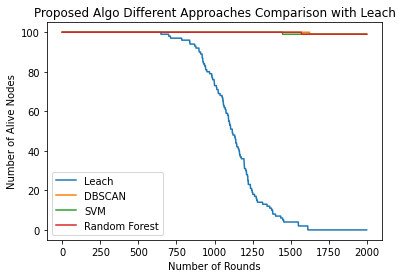

In [11]:
# At 1 J with Leach (AliveNodes)
xr = np.arange(0,2000,1)
AliveNodesLeach1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 95, 95, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 91, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 87, 87, 87, 87, 86, 85, 85, 85, 85, 84, 84, 84, 84, 84, 84, 84, 83, 83, 83, 83, 83, 83, 82, 81, 81, 81, 81, 81, 81, 81, 81, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 78, 77, 77, 77, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 75, 74, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 72, 72, 71, 71, 71, 71, 71, 71, 71, 71, 71, 70, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 67, 67, 67, 67, 66, 66, 65, 65, 64, 63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 60, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 58, 58, 58, 58, 58, 57, 56, 55, 55, 55, 55, 55, 54, 54, 53, 53, 53, 53, 53, 52, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 49, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 46, 46, 46, 46, 44, 44, 44, 44, 44, 43, 43, 42, 42, 42, 42, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 40, 40, 40, 39, 38, 38, 38, 38, 37, 37, 37, 37, 37, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 34, 33, 32, 31, 31, 31, 31, 31, 31, 31, 31, 30, 30, 30, 30, 30, 28, 28, 28, 28, 28, 28, 28, 27, 27, 25, 25, 25, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
AliveNodesDB1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
AliveNodesSVM1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
#AliveNodesRand1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
AliveNodesRand1 = [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
plt.plot(xr,AliveNodesLeach1,label='Leach')
plt.plot(xr,AliveNodesDB1,label='DBSCAN')
plt.plot(xr,AliveNodesSVM1,label='SVM')
plt.plot(xr,AliveNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Alive Nodes')
plt.title('Proposed Algo Different Approaches Comparison with Leach')
plt.legend()
plt.show()

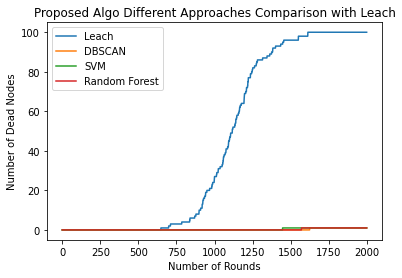

In [12]:
# At 1 J with leach (DeadNodes)
xr = np.arange(0,2000,1)
DeadNodesDB1 = []
DeadNodesSVM1 = []
DeadNodesRand1 = []
DeadNodesLeach1 = []
for i in range(0,len(AliveNodesDB)):
    DeadNodesDB1.append(100-AliveNodesDB1[i])
    DeadNodesSVM1.append(100-AliveNodesSVM1[i])
    DeadNodesRand1.append(100-AliveNodesRand1[i])
    DeadNodesLeach1.append(100-AliveNodesLeach1[i])
plt.plot(xr,DeadNodesLeach1,label='Leach')
plt.plot(xr,DeadNodesDB1,label='DBSCAN')
plt.plot(xr,DeadNodesSVM1,label='SVM')
plt.plot(xr,DeadNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Dead Nodes')
plt.title('Proposed Algo Different Approaches Comparison with Leach')
plt.legend()
plt.show()

In [13]:
EnergyLeach = [49.9100968355801, 49.8340978689863, 49.7562484482061, 49.6734493706352, 49.5892388040904, 49.4882253422882, 49.3960506254908, 49.2578763988438, 49.1646515491872, 49.0945661500306, 49.0122245981114, 49.0122245981114, 48.9271985571389, 48.8135785623838, 48.7299242215637, 48.6415629386247, 48.5386664370695, 48.4489112203676, 48.3537500057414, 48.2708299383712, 48.1605051778818, 48.0644925872002, 47.960085506529, 47.8200926777445, 47.7417493405169, 47.6636914543066, 47.5831675795789, 47.4889927319395, 47.3993896197716, 47.2806394174669, 47.2017056595073, 47.0918221532037, 46.9888067200349, 46.9082499080325, 46.8204113957347, 46.7393665297262, 46.6499026112944, 46.5369309210005, 46.4546550404083, 46.3791417248358, 46.2990352837435, 46.2256043282242, 46.1413389525054, 46.0241119415419, 45.9116995234032, 45.8388213761414, 45.6896500059224, 45.6131953062946, 45.5334422260939, 45.4475831536243, 45.3492731812547, 45.1499959856581, 45.0595411045442, 44.9641534875748, 44.9641534875748, 44.8734144929209, 44.8015661287054, 44.7267117492933, 44.6274404988574, 44.5227913449639, 44.4122562451022, 44.2972306034999, 44.2257011332336, 44.1111769558156, 44.0052013680929, 43.9175591751864, 43.8420940513624, 43.7629190683563, 43.6101251996112, 43.5130066928763, 43.4276357428688, 43.3475016247095, 43.2546557457514, 43.1676978162679, 43.0933144096512, 43.0098121302798, 42.9060380718189, 42.817301551491, 42.7194264821354, 42.6205803325017, 42.535912663819, 42.4625039249957, 42.3594982744598, 42.2703497385112, 42.186050577231, 42.077649155302, 41.9984427300156, 41.9078310101823, 41.8273858859314, 41.7552826908803, 41.6823939561489, 41.6053167879946, 41.5140090737472, 41.4303936283122, 41.3172946642945, 41.2364782474851, 41.131348064881, 41.0500298823353, 40.9474052566697, 40.8236353496464, 40.747245775873, 40.6652945927996, 40.583518468211, 40.5040646753863, 40.4083689510495, 40.2813094979067, 40.0476971322655, 39.9503970361538, 39.8725031373536, 39.6012436527798, 39.5246634430472, 39.4491490599691, 39.3665312356813, 39.2803882890368, 39.1576603639079, 39.0687333876458, 38.9849649558982, 38.9087558111327, 38.7927522215398, 38.6285320941183, 38.5189630725572, 38.4445275826433, 38.3297957622396, 38.252437971456, 38.1602770978527, 38.0797206907668, 37.9895034177537, 37.9080354632926, 37.8154668275661, 37.7210478723321, 37.6408503633383, 37.5562318264309, 37.4568464186737, 37.3362422390377, 37.254252806892, 37.1676972323847, 37.02639174272, 36.9046495186593, 36.8082855920929, 36.7104412752793, 36.5768406614768, 36.4922374519321, 36.3777189676322, 36.2772182303569, 36.1877940728028, 36.1146221896853, 36.0316503659937, 35.9569884081813, 35.8624236278298, 35.7853830114933, 35.7069900244181, 35.6337116002753, 35.5185859268836, 35.4260708651603, 35.3429406774544, 35.2077889750812, 35.1318591881485, 35.056753579581, 34.9568544514052, 34.8671266892358, 34.791106476501, 34.7240239799266, 34.6434014967774, 34.5456660612552, 34.4649838022241, 34.3879125375703, 34.3084175179002, 34.2070536306408, 34.1344950341139, 34.0099710240671, 33.9204086674988, 33.6608020457398, 33.5724256137362, 33.4806633999253, 33.3694147111634, 33.2265231705942, 33.2265231705942, 33.1518762781313, 33.0634856186811, 32.9292837140175, 32.846668448612, 32.7629151479285, 32.5697003552896, 32.4683393876356, 32.3736514659673, 32.2991925569298, 32.2108604543156, 32.1293896097806, 32.0458529827573, 31.9114258179023, 31.8214166373104, 31.7526824439325, 31.6771756801198, 31.5949225994565, 31.4939022695023, 31.4042091379595, 31.3085850777847, 31.2321432510019, 31.141174956741, 31.0389714672519, 30.9594118093737, 30.8768725270089, 30.7985190893814, 30.6774056185369, 30.5820774422423, 30.4700967380937, 30.3909446458943, 30.3084438449903, 30.2199191936155, 30.0359157494633, 29.9499667578313, 29.865750205045, 29.779654650251, 29.6890216624482, 29.5497725014165, 29.4601358550281, 29.3889839061761, 29.3051158011994, 29.217299273231, 29.142217165916, 29.0468069180363, 28.9560678645022, 28.8744904045575, 28.7773628644868, 28.6819604114838, 28.5924789748017, 28.4852911875613, 28.3716900323936, 28.2825108622285, 28.1980516009458, 28.1083955439714, 27.9896793138113, 27.9009133853989, 27.816488371346, 27.70898908693, 27.6042843912702, 27.5084371854091, 27.4260737488459, 27.3479395590727, 27.265776197741, 27.1910470447433, 27.123084290765, 27.0449897017389, 26.8333442518567, 26.7463279156202, 26.6724699601299, 26.570900168283, 26.4923075098394, 26.4026146657119, 26.3233182198911, 26.2535429764125, 26.1471273206549, 26.0454127931242, 25.9360993202821, 25.8118793248744, 25.7199793640273, 25.6200486772341, 25.5329470348143, 25.4516549232888, 25.2253447464602, 25.1355646342263, 25.0446865418043, 24.973139513539, 24.8910281770037, 24.8142457425433, 24.7384711868203, 24.6557243744835, 24.5716715093432, 24.478952911823, 24.3905919283007, 24.2935704142916, 24.2162786101982, 24.1014004927983, 24.0041260894098, 23.8937676966139, 23.8170866334221, 23.7292795500327, 23.5417918407669, 23.3869946604843, 23.2618219021082, 23.1861981793449, 23.102930428103, 23.0295129363378, 22.8038476735499, 22.7086073353499, 22.6238996407761, 22.4691628641398, 22.3856174309735, 22.295913062307, 22.2100433561908, 22.126153648304, 22.0288165856123, 21.9289095500464, 21.8535608788696, 21.7474915589276, 21.6644929014619, 21.524531846885, 21.4353861588274, 21.3568184277771, 21.2789610420177, 21.1809100785045, 21.1040998586728, 21.0165782096856, 20.9257457605623, 20.8315203688849, 20.7118874904896, 20.6142573798545, 20.5408963516232, 20.4214702945709, 20.3390823076019, 20.2332281990474, 20.1572084144964, 20.0698262394593, 19.9129906038972, 19.8213373480429, 19.7392885375834, 19.6577250699066, 19.564558875501, 19.4844565151919, 19.4013965085407, 19.2987100565643, 19.2123767532498, 19.1128189116521, 19.0296743992568, 18.9587908445978, 18.8587350954202, 18.7408585447482, 18.62491531566, 18.532047266493, 18.4363065063873, 18.3559469608775, 18.2681935142728, 18.192347332784, 18.1091810919528, 18.0109417067682, 17.9254353497669, 17.8422840582491, 17.7079104864755, 17.6316566314406, 17.5445366721023, 17.4578450161744, 17.2021743630607, 17.1174857318768, 17.0399064738715, 16.9558279194781, 16.8791462414712, 16.8073706506748, 16.6926388302711, 16.6205017909846, 16.5405593343887, 16.4631858999785, 16.3749827963887, 16.2814155412686, 16.1966660296896, 16.0656346558185, 15.9804971640125, 15.8896940659203, 15.7752096143008, 15.6848122249342, 15.5883621717699, 15.5132373683012, 15.3929224745509, 15.3018687252588, 15.2162422222933, 15.1358142646842, 15.0531728739916, 14.9606346803785, 14.8857542157507, 14.772273679704, 14.6865439757005, 14.5346782906799, 14.4398796089519, 14.3552577311448, 14.240203744906, 14.160261887785, 14.0838485237995, 14.0083053058724, 13.9066552594561, 13.8122526692357, 13.680464455864, 13.6017061949501, 13.5128995616383, 13.4346564683055, 13.3619432261745, 13.2806211844572, 13.1863123520547, 13.1110399351001, 13.0013396630293, 12.9126257280276, 12.7104686951448, 12.6362743283729, 12.5643635760904, 12.4895433092173, 12.4060121159675, 12.3175614936728, 12.2433454445181, 12.1040969366706, 12.0277362898844, 11.9378751377971, 11.8594216026853, 11.7719814676932, 11.6555645104513, 11.5613657441645, 11.4664830968931, 11.3877866173958, 11.2838880397066, 11.2063073024463, 11.1315200223153, 11.0264935506285, 10.9410030419201, 10.8562167366616, 10.7457379779386, 10.6640278580986, 10.5541238931416, 10.4833012020682, 10.4141653218144, 10.3155666127221, 10.2329869237583, 10.1164424052326, 10.0181151890025, 9.94682724906817, 9.8635381691401, 9.73765979871335, 9.64167852287341, 9.57192812853398, 9.49709684583654, 9.41639178356019, 9.3384618759136, 9.26809510497483, 9.19910378227595, 9.10325318687578, 8.96187589229678, 8.89085508135165, 8.82639268858446, 8.63593474094017, 8.54248641256978, 8.46696590060851, 8.40552441864788, 8.32886500512171, 8.249560144744, 8.17459504607976, 8.10281743815042, 7.96030249776962, 7.88550556363738, 7.81818799590829, 7.7477600295371, 7.67543750808062, 7.60502360091622, 7.49195916657497, 7.4252666187991, 7.34671542089937, 7.2680787093548, 7.19565682735518, 7.12500632687076, 7.12500632687076, 7.03169049965201, 6.95607132202369, 6.86798811084748, 6.78732303583618, 6.72331666924483, 6.65998070907717, 6.58620288948097, 6.45687739088033, 6.35556084555516, 6.28382957901906, 6.22037659919286, 6.15633073406453, 6.08053080373555, 5.99024003339981, 5.93109620642994, 5.84789691771455, 5.7658051054704, 5.68205334639311, 5.56135320879441, 5.49772269211538, 5.42997732671756, 5.37369690554979, 5.3084327703223, 5.25074649111142, 5.18889156139821, 5.12340459209245, 5.06450642456921, 4.95627528839413, 4.95627528839413, 4.8884928890867, 4.81952364343991, 4.76001938861253, 4.68871863082002, 4.63636102030076, 4.57645866841597, 4.4781800323482, 4.40825975364795, 4.35302247895172, 4.29019296768962, 4.23726310105112, 4.17890021000781, 4.11743140955817, 4.11743140955817, 4.05950755065718, 3.98647766105361, 3.92385832980588, 3.85724704176726, 3.80796011418043, 3.73626278584854, 3.64469079010956, 3.56878967959256, 3.48349138081193, 3.43674311428818, 3.39056043405491, 3.33930101703534, 3.28314727228441, 3.2300101510254, 3.18139960093156, 3.14047078180865, 3.09537152392313, 3.0345989347948, 2.98235141651912, 2.93134799244086, 2.88667109854431, 2.80151283808367, 2.74371949475137, 2.68850487966573, 2.6066339384721, 2.56540353244958, 2.56540353244958, 2.52466029005365, 2.47542409970993, 2.47542409970993, 2.43353086011385, 2.39000855520823, 2.34031426728657, 2.28396303346095, 2.22730821827094, 2.17604807730496, 2.11881045965964, 2.07282315722561, 2.03193927317211, 1.99532751714319, 1.95856190775004, 1.91773115725593, 1.86569154004493, 1.86569154004493, 1.82597251825365, 1.78781083406383, 1.74450103979007, 1.70846153030951, 1.67176254056106, 1.63472247515013, 1.5913740792853, 1.55472913137959, 1.5120728891876, 1.47771605029474, 1.47771605029474, 1.43678411095246, 1.43678411095246, 1.38956046773867, 1.32026603447349, 1.28366547135678, 1.24717819759606, 1.21940852011058, 1.17971932339968, 1.13319991971113, 1.10379462542179, 1.07392640528108, 1.0337751325416, 1.00340179550763, 0.979509092771507, 0.979509092771507, 0.953544684642229, 0.91172506089285, 0.877697218893863, 0.838342275144871, 0.809568577912867, 0.783157894383269, 0.761430118198863, 0.717514066221844, 0.690825726829439, 0.651260085021017, 0.632541232192601, 0.632541232192601, 0.632541232192601, 0.605864293189172, 0.586109007092242, 0.558347983579794, 0.539059068560168, 0.517141043350965, 0.501842768627996, 0.482576373413088, 0.464025590970853, 0.447501302221076, 0.421088670260007, 0.421088670260007, 0.399161854137159, 0.377518786255387, 0.361073110588329, 0.340465548552634, 0.340465548552634, 0.327173013929494, 0.327173013929494, 0.327173013929494, 0.327173013929494, 0.307829389540624, 0.294573273378781, 0.280244893805995, 0.280244893805995, 0.268920560451796, 0.257390822695945, 0.257390822695945, 0.24153741421298, 0.230792140282209, 0.221575969022228, 0.221575969022228, 0.215221834348003, 0.204078436108085, 0.204078436108085, 0.204078436108085, 0.197419680839295, 0.197419680839295, 0.197419680839295, 0.190861580026114, 0.190861580026114, 0.190861580026114, 0.18202946419987, 0.175781412972674, 0.175781412972674, 0.175781412972674, 0.170282995454935, 0.164108513857511, 0.158113570558125, 0.152309656668687, 0.146723558302828, 0.146723558302828, 0.146723558302828, 0.146723558302828, 0.146723558302828, 0.146723558302828, 0.141107823316269, 0.141107823316269, 0.141107823316269, 0.141107823316269, 0.141107823316269, 0.141107823316269, 0.141107823316269, 0.141107823316269, 0.131391129151146, 0.125587215261708, 0.125587215261708, 0.119971480275149, 0.119971480275149, 0.111800144917779, 0.111800144917779, 0.111800144917779, 0.105552093690583, 0.105552093690583, 0.099557150391198, 0.0935378828800156, 0.088463274617702, 0.088463274617702, 0.088463274617702, 0.088463274617702, 0.082166857171655, 0.082166857171655, 0.0789949722710239, 0.0789949722710239, 0.0789949722710239, 0.0789949722710239, 0.0789949722710239, 0.0789949722710239, 0.0749386865780906, 0.0749386865780906, 0.0749386865780906, 0.0749386865780906, 0.0749386865780906, 0.0707858509409142, 0.0707858509409142, 0.0661039490277127, 0.0661039490277127, 0.0661039490277127, 0.0661039490277127, 0.0602265333355231, 0.0602265333355231, 0.0602265333355231, 0.0602265333355231, 0.0561702476425897, 0.0561702476425897, 0.0561702476425897, 0.0561702476425897, 0.0561702476425897, 0.0514883457293882, 0.0470652493322077, 0.0470652493322077, 0.0470652493322077, 0.0470652493322077, 0.0470652493322077, 0.0470652493322077, 0.0470652493322077, 0.0470652493322077, 0.042251099313618, 0.042251099313618, 0.042251099313618, 0.042251099313618, 0.042251099313618, 0.042251099313618, 0.042251099313618, 0.042251099313618, 0.0375109359912593, 0.0375109359912593, 0.0375109359912593, 0.0375109359912593, 0.0375109359912593, 0.0375109359912593, 0.034109189192788, 0.034109189192788, 0.032780312532414, 0.032780312532414, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.030922167465405, 0.0296490644336438, 0.0296490644336438, 0.0296490644336438, 0.0296490644336438, 0.0296490644336438, 0.0296490644336438, 0.0296490644336438, 0.0296490644336438, 0.0296490644336438, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0283005648947677, 0.0270274618630064, 0.0270274618630064, 0.0270274618630064, 0.0270274618630064, 0.0270274618630064, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0256789623241303, 0.0243304627852542, 0.0243304627852542, 0.0243304627852542, 0.0243304627852542, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0230573597534929, 0.0217088602146168, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0204357571828556, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0191626541510943, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0178141546122182, 0.0164656550733421, 0.0164656550733421, 0.0164656550733421, 0.0164656550733421, 0.0164656550733421, 0.0164656550733421, 0.0151925520415809, 0.0151925520415809, 0.0151925520415809, 0.0151925520415809, 0.0151925520415809, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0139194490098196, 0.0125709494709435, 0.0125709494709435, 0.0125709494709435, 0.0125709494709435, 0.0125709494709435, 0.0125709494709435, 0.0125709494709435, 0.0125709494709435, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.0112224499320674, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00994934690030614, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00860084736143002, 0.00732774432966878, 0.00732774432966878, 0.00732774432966878, 0.00732774432966878, 0.00732774432966878, 0.00732774432966878, 0.00732774432966878, 0.00597924479079266, 0.00597924479079266, 0.00597924479079266, 0.00597924479079266, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00470614175903141, 0.00343303872727017, 0.00343303872727017, 0.00208453918839405, 0.00208453918839405, 0.00208453918839405, 0.00208453918839405, 0.00208453918839405, 0.00208453918839405, 0.00208453918839405, 0.00208453918839405, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.00142985735400816, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0.000509466018195708, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(len(EnergyLeach))

2000


In [14]:
EnergyEAMMH = [64.9183070654371, 64.8378126100407, 64.7486014213434, 64.6672167966945, 64.5826564935396, 64.4989812004478, 64.4183234201466, 64.3254932472562, 64.2422873278203, 64.1557290139217, 64.0620787172732, 63.9790353681329, 63.8904929926115, 63.8110497800656, 63.7253063989426, 63.6409091730145, 63.5553565207663, 63.4731602778403, 63.384110916141, 63.2982849306612, 63.2177945051366, 63.1316967195343, 63.0484887212667, 62.9584594022854, 62.8716573326359, 62.7870614854494, 62.7028875223847, 62.6166906924633, 62.5331374595236, 62.4472189547331, 62.3591610859821, 62.275538815747, 62.1936177385668, 62.1080207426196, 62.0247181963379, 61.9412359355011, 61.8580107316389, 61.7679274757067, 61.6862861829214, 61.5965880589855, 61.5109858490511, 61.4318694219312, 61.3474252362318, 61.2654642124555, 61.1721251803788, 61.0866553177851, 61.0007062857316, 60.9194305973062, 60.8358794368913, 60.753462945388, 60.6693394534243, 60.5845664368198, 60.502568068617, 60.4191342491544, 60.332295773349, 60.2492168106288, 60.1696383279435, 60.0846168289971, 59.9984383694333, 59.9072310485975, 59.8238316457666, 59.7414092799782, 59.6550127756794, 59.5663754086845, 59.4840438400538, 59.4000094304235, 59.3152019928167, 59.2324333228899, 59.1464234063359, 59.0646567263349, 58.9796301175609, 58.8942234974152, 58.8060626983778, 58.7215639318423, 58.6397336256954, 58.5522255203383, 58.4720386356184, 58.3901285457582, 58.3038960027571, 58.2199651276712, 58.1352837956757, 58.0532101228719, 57.9674774794549, 57.881343897269, 57.7975444727293, 57.717197776232, 57.631234879607, 57.5412514262274, 57.4582931784091, 57.3737383767268, 57.2894041837794, 57.2029533486904, 57.1199220315358, 57.0394499152368, 56.9481406092414, 56.8664915533317, 56.7819729549779, 56.7001147825484, 56.6152586290701, 56.5298851357831, 56.4403914289712, 56.3616342194634, 56.2719924397688, 56.1836602300105, 56.1042213525498, 56.0168887318507, 55.937516217148, 55.8521773993697, 55.7603390907378, 55.6797446133426, 55.5954564965655, 55.5053509868125, 55.4210974758886, 55.3370487668635, 55.2550283326803, 55.1677756008443, 55.0834098520169, 55.0003449586472, 54.9168392142141, 54.8329375924061, 54.749008714133, 54.668105493307, 54.5823609829596, 54.4988502291551, 54.4170899455871, 54.3321685896705, 54.2496870129171, 54.163401460492, 54.0829537180349, 53.995602987594, 53.9088321409832, 53.8282564645211, 53.7439956909088, 53.6645520435596, 53.5739297341011, 53.4909364522816, 53.4076686393211, 53.3193364060597, 53.2370758623798, 53.1489056943004, 53.0633859132054, 52.9801737881689, 52.8976398370363, 52.8122969056975, 52.7252599170815, 52.6443501229486, 52.5591650342649, 52.4749590153222, 52.3876251397776, 52.3061472860127, 52.2196359127939, 52.1387132489665, 52.0536945468437, 51.9667767933168, 51.8827043458117, 51.8020363602572, 51.7192739508584, 51.6339276319353, 51.5479820414881, 51.4636374570002, 51.3800895921005, 51.2899044723253, 51.205820738924, 51.1242028167197, 51.0378640111367, 50.9539938167658, 50.8713191756898, 50.7857265413329, 50.6990798869714, 50.6116303904622, 50.5290002180974, 50.4469274990922, 50.361773056244, 50.2776958069443, 50.1928520288154, 50.1062224069309, 50.0224092901848, 49.9393545252652, 49.8507547654391, 49.7653470077006, 49.6792406357857, 49.6001259090485, 49.5147714630559, 49.4323292007561, 49.3467367429704, 49.2633929677235, 49.1809835967365, 49.0982125239694, 49.0083718969085, 48.9226166856354, 48.8339067123571, 48.7524966195638, 48.6669414098133, 48.5802246896925, 48.4963515120087, 48.4087799529122, 48.3254908808271, 48.2425529383572, 48.1576988985858, 48.0701054692463, 47.9841434173344, 47.9012984009757, 47.8169616791325, 47.7265653082876, 47.6425052406214, 47.5604136807064, 47.474592443132, 47.3899738050185, 47.3042872313393, 47.2179282254402, 47.1342184493473, 47.0516396131955, 46.967282598891, 46.8808684722279, 46.7943963796179, 46.7106395120444, 46.6201830968992, 46.5377354116343, 46.458126482018, 46.3724342536847, 46.2884290747775, 46.1995897282974, 46.1142131858177, 46.0305023743225, 45.9479852762562, 45.8638509216773, 45.7794965460517, 45.6944093181629, 45.6116549786838, 45.5259848984527, 45.4414153834486, 45.351419092374, 45.2691220478726, 45.1867531516047, 45.1074838601175, 45.0229544208198, 44.9374508066525, 44.8520689912459, 44.7643572046535, 44.6824729967967, 44.5952830440456, 44.5114929507247, 44.4280530535169, 44.3437858246725, 44.2586495804055, 44.1756062651263, 44.0899639002035, 44.0089411362822, 43.9233607912241, 43.8418714169842, 43.7559803396694, 43.6726199239918, 43.5862693684509, 43.5008455184073, 43.4186425347454, 43.3266271672823, 43.2432666857155, 43.1616099052245, 43.0773099474691, 42.9909990648562, 42.9090491976167, 42.8255998131381, 42.7387953804521, 42.6528307253782, 42.5701886449116, 42.4868280307163, 42.3993874729745, 42.3152302369788, 42.2309552398026, 42.1488757791652, 42.0611747759551, 41.975190419931, 41.8936677635166, 41.8114259159618, 41.7220692905471, 41.6378889505242, 41.5571311360608, 41.4730440405827, 41.3865555708009, 41.3008812387721, 41.2211393188071, 41.1351751365348, 41.0548795383531, 40.9719920325006, 40.8830931874908, 40.7979426893908, 40.714039306138, 40.6312913741322, 40.547839719258, 40.4624391961876, 40.3754514651827, 40.2904172994753, 40.2029240643093, 40.1211525945322, 40.037248132535, 39.9495295398412, 39.863569054417, 39.7760338608393, 39.693655753658, 39.6093389410519, 39.5208897149714, 39.4276090927686, 39.3473191772778, 39.2603416976667, 39.1775165692237, 39.0935354841821, 39.0078870802423, 38.9203415577269, 38.8383716456364, 38.7518059340912, 38.6685938606366, 38.5829928899354, 38.4950892021404, 38.4073518436463, 38.3258126174032, 38.2413664809049, 38.155298047078, 38.0705953868878, 37.99039744982, 37.9058766898443, 37.8223860870708, 37.7384497463195, 37.6542764473875, 37.5724468213101, 37.487667607724, 37.4016433273256, 37.3204453637065, 37.2376193158254, 37.1523370480641, 37.0681301748359, 36.9843372137591, 36.9011063753967, 36.8196049655339, 36.7339290318623, 36.6521889776555, 36.5707104611606, 36.4894927351932, 36.4087535023142, 36.3207600586236, 36.2356577407295, 36.1564765537298, 36.0740365717925, 35.9948005431928, 35.9061742485566, 35.8246320323443, 35.7395940868188, 35.6562523967085, 35.5750870156683, 35.4872695037551, 35.4067158001852, 35.325228846702, 35.2388920755469, 35.1548600049328, 35.0732754028215, 34.9890790694937, 34.9066852179533, 34.8236575804387, 34.7400289198062, 34.659451912468, 34.5777860180628, 34.4939664416751, 34.4100315528213, 34.3293556809749, 34.2454827648092, 34.1598424977568, 34.0817347954111, 34.0053369131347, 33.9234488713462, 33.8400702948794, 33.7543460435812, 33.6761999996043, 33.592515619341, 33.510073904049, 33.4235994555728, 33.3421173936084, 33.2589981697032, 33.1748667665358, 33.097721509529, 33.022810051754, 32.9407197143723, 32.852935980367, 32.7654461906064, 32.6844963679598, 32.6079086536564, 32.5277126601071, 32.4489628004498, 32.3644160895314, 32.285743126018, 32.2061598778431, 32.12291990315, 32.0482725958306, 31.9701677992275, 31.8808010904541, 31.8011263660601, 31.7222253591803, 31.6426061232033, 31.5662049177305, 31.4858012513697, 31.3937226147438, 31.3176057270355, 31.2376950445128, 31.1597558250231, 31.0821152017009, 31.0042743620572, 30.9229972102556, 30.8469830180884, 30.7678732438217, 30.6891402432283, 30.6053059323086, 30.5346977758369, 30.459043451479, 30.3798385453481, 30.3024610939268, 30.2234085694893, 30.1460418389754, 30.0746474143341, 29.9945895207939, 29.9146349919338, 29.8375194791977, 29.7585961245963, 29.6694075810366, 29.5982282453468, 29.5232384192974, 29.4499641466014, 29.3675551159102, 29.2927480627033, 29.2166035508706, 29.1426142661359, 29.0679988131998, 28.9915456420247, 28.9172183288957, 28.8453455719669, 28.7677908392821, 28.6950151783759, 28.6219466378901, 28.5481577556658, 28.4761979709925, 28.3974993706146, 28.3273781347872, 28.25382368212, 28.1790158953942, 28.1065994697392, 28.0366941754686, 27.96037705931, 27.8869946640887, 27.8181518262589, 27.7436901395874, 27.6691172139206, 27.5992278471284, 27.5253176372278, 27.4479610835338, 27.3810756363414, 27.2968639362639, 27.2213813879095, 27.1475002806844, 27.0806763814747, 27.0094092751509, 26.9408942808507, 26.8709238681579, 26.8003702897594, 26.7294086738492, 26.6588297845891, 26.5902287806355, 26.5184040614722, 26.4444290878419, 26.3755313615744, 26.2986443003445, 26.2265646058144, 26.1544546205588, 26.0834514652509, 26.0163251331611, 25.9477179274773, 25.8804473498792, 25.8095372964088, 25.7404004037211, 25.6744250378669, 25.6028163725042, 25.5374183468098, 25.4623556898634, 25.3933615165606, 25.3246620362441, 25.2506791090058, 25.1858802968928, 25.1135523603191, 25.0414733000363, 24.9763190147485, 24.9101040480903, 24.8348958814538, 24.7666319257377, 24.6996268764922, 24.6331522789293, 24.563956370411, 24.4899504471018, 24.4210911960681, 24.3500079656625, 24.2809217870488, 24.2118026194851, 24.1405472343085, 24.0710346130874, 24.0015832202008, 23.9270259174307, 23.8607309208373, 23.7931557456414, 23.7223326125263, 23.6573212324344, 23.5940361845973, 23.5241589496637, 23.4574083095261, 23.3923112115562, 23.3282180817237, 23.2617883232295, 23.1961745239436, 23.1294655253075, 23.0674034705385, 23.0025492151148, 22.9354159787517, 22.8716136278538, 22.806422662884, 22.7460972331821, 22.6822407419993, 22.6200856758979, 22.5570011573076, 22.4946541546341, 22.4307392614375, 22.3660236278571, 22.3017686052582, 22.2361992262651, 22.1722906986117, 22.1092043216397, 22.0468109085179, 21.9809759013161, 21.9134489118782, 21.8519740034551, 21.7931596673869, 21.7311493141842, 21.672960022194, 21.6120111128246, 21.5540578051741, 21.4929232350552, 21.4317047068642, 21.3723873536334, 21.3145183344729, 21.2556377079975, 21.1968260500815, 21.1370724313911, 21.0801933869531, 21.0217610891902, 20.9635026128358, 20.9062572933943, 20.8500506033424, 20.7929866214912, 20.7347806876103, 20.6768793239107, 20.6199525479045, 20.563438800852, 20.5061705305701, 20.4426671878134, 20.3890851813964, 20.331801757051, 20.2774432813035, 20.2178952226738, 20.1578263777265, 20.1023127921113, 20.0480629545024, 19.9946631175509, 19.9378828930047, 19.8810498509502, 19.8233879904124, 19.7672739375284, 19.7105779004995, 19.6535316964953, 19.5968450129533, 19.543124758844, 19.4861064305445, 19.4331434013117, 19.3759451074486, 19.3225741455339, 19.2640081625828, 19.2066967017274, 19.1521875589043, 19.1015623169405, 19.0447595693933, 18.9893846074075, 18.9334106953505, 18.8817297213312, 18.8244547993659, 18.7686026663581, 18.7167793885816, 18.6645375286211, 18.6109231462541, 18.5601215048319, 18.5090503721225, 18.4521521724987, 18.4002854666686, 18.3499228030156, 18.2963255394434, 18.2441917503403, 18.1933962791471, 18.1419427597519, 18.0914534864362, 18.0421375386329, 17.9908531481471, 17.9380720663712, 17.8894865639112, 17.8388268826737, 17.7897877731952, 17.7397022888791, 17.691224934563, 17.6402553589373, 17.5854478242508, 17.5390844309154, 17.4907545633396, 17.4411490001061, 17.3890331415255, 17.3376060826886, 17.2875929677072, 17.2374495878883, 17.1862808796773, 17.1349863384551, 17.0824990200351, 17.0301543572912, 16.9795279454996, 16.9268292338083, 16.8757547598582, 16.8252166767072, 16.7764981593674, 16.7247240819822, 16.6715352488155, 16.6218781109085, 16.5732974614069, 16.5237948863399, 16.4740846460176, 16.4241349195717, 16.3756835400996, 16.3271040995941, 16.2834656656594, 16.2398182873139, 16.1915456684666, 16.1488183381823, 16.1015346560143, 16.0485514040827, 16.0013613065603, 15.9553851510815, 15.908103219004, 15.8569401925538, 15.8086415968559, 15.7656563427509, 15.722499658893, 15.6771084157194, 15.6330752001137, 15.5847210315563, 15.5396675225232, 15.4943327975611, 15.447347483112, 15.4020805631834, 15.3554432872025, 15.3113807800307, 15.2632770825961, 15.21903866398, 15.167137662885, 15.1178890253638, 15.0760736091163, 15.0281426753381, 14.9822647715055, 14.9340624774477, 14.8893376213622, 14.8414078199198, 14.7974509606196, 14.7501197160343, 14.702544544656, 14.6579297313438, 14.616711100024, 14.5729949782582, 14.5285339317928, 14.4828568586316, 14.4345120551277, 14.390869841699, 14.350494020524, 14.3064553688139, 14.2610831500815, 14.213795773881, 14.1715401014328, 14.1238829975657, 14.0794159267773, 14.033437938666, 13.9872070047859, 13.948179923542, 13.9041390705473, 13.8599529811012, 13.8227590966882, 13.7775629485569, 13.7357716331346, 13.6922372676337, 13.6503302380262, 13.6063365437502, 13.5617960829287, 13.5202353436334, 13.4757187753351, 13.4345202940401, 13.3945382683824, 13.3503150169118, 13.3125846007069, 13.2710867585642, 13.23097339324, 13.1897960010375, 13.1431048382007, 13.1037363256229, 13.0638737662829, 13.0247100598634, 12.9847400642859, 12.9463728802321, 12.9027602018781, 12.8565485561104, 12.8156724729602, 12.7738706777377, 12.7305221341848, 12.691526527875, 12.6533416248251, 12.6167319506768, 12.577861410021, 12.5382995378249, 12.5010118312292, 12.4635298286286, 12.4259253238572, 12.3900018775929, 12.3506408294502, 12.3143369093643, 12.2782476541981, 12.2417561813466, 12.2062372651963, 12.1697649803786, 12.1338305285961, 12.0979400013136, 12.0652605485196, 12.0213374815343, 11.9873294996108, 11.9478041484262, 11.9124786560603, 11.8773966781809, 11.8439286948796, 11.8077845541801, 11.7752562113667, 11.7397426789284, 11.7000218539032, 11.6688225544939, 11.6369043963145, 11.6011448876086, 11.5706593531602, 11.5409081328616, 11.507485666055, 11.4768903988873, 11.4300208408402, 11.4001497676149, 11.3680456988172, 11.3386260528796, 11.3062691393034, 11.2763368029512, 11.2427193354403, 11.2118230502579, 11.1800352351365, 11.1480455155038, 11.1170356671099, 11.0862998190371, 11.0554343928648, 11.0197226034812, 10.9888564731787, 10.9561572205902, 10.9252050806435, 10.8966205403588, 10.8666380822588, 10.8339321346497, 10.8021570054029, 10.7739122340665, 10.7447890975032, 10.7162056226042, 10.6900969196787, 10.6617295904294, 10.6319333269126, 10.6049441468719, 10.5771939689346, 10.5510898149662, 10.5222355620161, 10.4936986451194, 10.465884169895, 10.4368351265026, 10.4059973275669, 10.3803650745945, 10.3523401169316, 10.3245688849969, 10.2977038719896, 10.2623970156473, 10.2354000833113, 10.208741787526, 10.1822846075895, 10.1543741272818, 10.1267955155977, 10.0994563781228, 10.0739634043287, 10.0505965278151, 10.0267582767771, 10.0011026374791, 9.97560920145591, 9.95333655215479, 9.92698825623131, 9.90285733477834, 9.8764690703542, 9.85338175018416, 9.82782404162865, 9.80021260366172, 9.77737146981437, 9.74770021102783, 9.72364772346514, 9.70041298163078, 9.67519754828263, 9.64765080195623, 9.62657239060262, 9.60129970183252, 9.57867311983487, 9.55525210749486, 9.52780982477818, 9.5049644014494, 9.480360764174, 9.4584991415909, 9.4351444656066, 9.41140719836436, 9.38827162529381, 9.3622848533678, 9.33820638365458, 9.31636377047481, 9.29587202905517, 9.27050143279142, 9.24827045279004, 9.22389088701342, 9.20173971710886, 9.17828856223394, 9.15445048532937, 9.13347131093201, 9.11009049656948, 9.08758382192807, 9.06463023260864, 9.04261863841427, 9.02156283314013, 8.99867609242238, 8.97577433464387, 8.95346904478725, 8.93177108544315, 8.90955061185383, 8.88809270429759, 8.86673738835685, 8.84331514950829, 8.82206586773628, 8.79991340392087, 8.77622440490416, 8.7535965984868, 8.73214349314284, 8.71055973671839, 8.68632589236555, 8.66607291453014, 8.64533800387682, 8.62298308431378, 8.59922163964972, 8.57768727217528, 8.55597511959086, 8.53346169749195, 8.51011175668347, 8.48844661167898, 8.46779070676055, 8.44291344868852, 8.42057844267475, 8.39861245350294, 8.37613403513082, 8.35410171164263, 8.33243820343909, 8.30979681938072, 8.28870758735366, 8.26541806974116, 8.24387415408206, 8.22088319889329, 8.20104919896159, 8.17882131930864, 8.15644289345824, 8.13680296634881, 8.11418381869328, 8.09333071829738, 8.07303113938516, 8.05023408950584, 8.03010092838913, 8.00926354694593, 7.98883627044234, 7.96691142788739, 7.94606514289188, 7.92179413469233, 7.90223787101328, 7.88033426289778, 7.86071974491502, 7.83825497528222, 7.81992005699973, 7.79936884898718, 7.77897201473728, 7.75930182454317, 7.73892425252974, 7.72051535744567, 7.70173316664776, 7.68372457240829, 7.66318096370679, 7.64473383214043, 7.6264204050922, 7.60777919048454, 7.58514990832573, 7.56632707006472, 7.54835392559925, 7.52587573359584, 7.50647221798686, 7.48574201003695, 7.4681765213573, 7.44726253660719, 7.42768867951257, 7.40975659261967, 7.38566948210739, 7.36671004634937, 7.34798797085627, 7.32930867564684, 7.31026027205804, 7.29040996567869, 7.2709445404406, 7.25223142852834, 7.23287881298662, 7.21465300378191, 7.19588871509281, 7.17644799568858, 7.15911471177425, 7.13341103669149, 7.11602163530203, 7.09638739139612, 7.0811401143238, 7.06183923286101, 7.04026813819338, 7.02350146345734, 7.00583724673582, 6.98673892757327, 6.97018860897147, 6.95342461490073, 6.93513962550696, 6.9182979201269, 6.90135274350698, 6.88244454930202, 6.86587711165319, 6.84807357431659, 6.83186623798656, 6.81389575700843, 6.79418946641415, 6.77763486156253, 6.75926716928201, 6.74129490566666, 6.72180010992969, 6.70327395989689, 6.68742840567622, 6.66478153015566, 6.64850190006923, 6.63113156464997, 6.61169456487565, 6.59367051300664, 6.5771813042833, 6.55860030271038, 6.54166560357014, 6.52487154628534, 6.50478282154245, 6.48671769796704, 6.46984927261623, 6.45212589812271, 6.43476087410324, 6.41533670633705, 6.39535101715027, 6.37872314924799, 6.36139327045429, 6.34254182192594, 6.32752423678486, 6.3098183420709, 6.29377294890936, 6.27619133956559, 6.25971443781926, 6.24280732352861, 6.22717365964814, 6.21170580922243, 6.19318664406848, 6.17684763037123, 6.15975778451861, 6.14499217087111, 6.12227898388473, 6.1075537668347, 6.09148254454692, 6.0754917533077, 6.05899188868381, 6.04209479282683, 6.02654267728343, 6.01195314496809, 5.9940484199983, 5.98083426220223, 5.96457639764724, 5.94973360446505, 5.93158417525579, 5.91351587168406, 5.89872592721261, 5.88368898783759, 5.86824746184699, 5.8523847085385, 5.8384203174199, 5.82283547591722, 5.80683476315573, 5.79259489183251, 5.77716885806055, 5.76113178534097, 5.74485131474157, 5.73019884808862, 5.71417198226185, 5.69751873196797, 5.68180651022795, 5.66628011138022, 5.65093950809891, 5.63569579614048, 5.62079889223074, 5.60447239446214, 5.58980494357981, 5.5720615272792, 5.55538485705648, 5.54164890071825, 5.5231359386726, 5.50872711902102, 5.49436910493386, 5.47920372058854, 5.46091792020113, 5.44655223170061, 5.43059411638091, 5.41437937636561, 5.3994707926162, 5.38401730347284, 5.36636895079377, 5.35249276366913, 5.3372718072098, 5.32213271803436, 5.30612394301712, 5.28787320417176, 5.26964336759596, 5.25807088793814, 5.24279753539423, 5.22813776438647, 5.21531195571435, 5.19994599714471, 5.18468299403032, 5.1703598611703, 5.15538084140956, 5.14064052179625, 5.12807762402097, 5.11463312168206, 5.09879903735708, 5.08633398637545, 5.07420139441039, 5.05792453271425, 5.04561988993219, 5.03489355653336, 5.01951118364625, 5.00638227900899, 4.99317281486925, 4.97851034702235, 4.96661795915597, 4.95205237600233, 4.9391560512529, 4.92505033472692, 4.91355637451994, 4.90041888088424, 4.88747714380524, 4.87494613512086, 4.86217456137146, 4.8487901914535, 4.83388335972617, 4.82070540338991, 4.80956795274024, 4.79402260239651, 4.78285486956915, 4.770211479886, 4.75694254659885, 4.74410448933108, 4.73103850646249, 4.71569582124635, 4.70342483499194, 4.69258862875759, 4.67957355845588, 4.66929368834751, 4.65697348437898, 4.64541551523871, 4.63574647113608, 4.6228423142796, 4.61194638488906, 4.60159453411337, 4.58837410418337, 4.575034910314, 4.56274580738247, 4.55286398201674, 4.54174675206487, 4.53040386998662, 4.51589609420784, 4.50404888055371, 4.49156572330361, 4.47986530753514, 4.46842564340164, 4.45588325802442, 4.44440212102067, 4.43240306277321, 4.4200203215973, 4.4104597513464, 4.39969808736774, 4.38642223762465, 4.37565611377203, 4.36571516152818, 4.35486265405267, 4.34421605515447, 4.33288607201869, 4.32253000101537, 4.31116001470397, 4.30093390373761, 4.28845698310147, 4.27900584636215, 4.26784331527741, 4.25697314139199, 4.24537156765301, 4.23545495570643, 4.2237279906049, 4.21368825302898, 4.20458109894945, 4.19421509362623, 4.1783037789562, 4.16728646988342, 4.15638058892458, 4.14682840683868, 4.13616521575018, 4.125532953462, 4.11410928665966, 4.09877874328269, 4.08842645168112, 4.07829141797515, 4.06660335398472, 4.05616219203696, 4.04572725655007, 4.03407886350339, 4.02318059545231, 4.0136441372174, 4.00386884480396, 3.99220221417424, 3.98118923720776, 3.97034944535097, 3.95976544696828, 3.94947281513807, 3.93989981741532, 3.9300917130405, 3.918479511094, 3.9078987039747, 3.89719585826185, 3.88706029790117, 3.87682070100252, 3.86559492028332, 3.85532663746716, 3.84358021432331, 3.83313138942128, 3.82105137033238, 3.8110257960489, 3.80002803204374, 3.78946557968531, 3.77864822129953, 3.76708017932171, 3.75654247510723, 3.74633061522189, 3.73591645579057, 3.72322299637257, 3.71496980651087, 3.69895739734097, 3.68756244351244, 3.67698802678682, 3.66253277165439, 3.65250416609253, 3.64337411989859, 3.62936187325405, 3.61895147793992, 3.60724719164565, 3.59750122042569, 3.58848267841465, 3.57820190552318, 3.56654681626918, 3.55661818695042, 3.5464105546541, 3.53628025532551, 3.52658147256669, 3.51614844657373, 3.50650986923165, 3.49630302716497, 3.48592277812235, 3.4754361618925, 3.46530380851607, 3.45482159688242, 3.44745015176145, 3.43892872462553, 3.42946471474705, 3.421807915263, 3.41161916551579, 3.40415044634449, 3.3930587920097, 3.38365891659906, 3.37445900822352, 3.36581159957481, 3.35641477137145, 3.34699641801768, 3.33562205316406, 3.32696773833722, 3.31952758755231, 3.30711182554093, 3.29789185363055, 3.2905298315341, 3.27637117109384, 3.26697891024515, 3.25784739956613, 3.24880799467044, 3.23938880481926, 3.22835118909604, 3.21876311098809, 3.21023905455913, 3.20155992060651, 3.19192964902624, 3.18294829290179, 3.1745825986513, 3.16629827783449, 3.15115227835155, 3.14234175021861, 3.13294777654022, 3.1237631885067, 3.11260350492068, 3.10382322603674, 3.09571574835379, 3.08633593152018, 3.07760083366043, 3.06787712299195, 3.05974127015199, 3.05005143855708, 3.04012050595215, 3.02902885161736, 3.02037587559801, 3.01140824130141, 3.00197494007058, 2.99276886643092, 2.98412287462742, 2.97496130710979, 2.9650500764229, 2.95556640730301, 2.94485738929161, 2.9349262709273, 2.92604836519552, 2.91611251435177, 2.90673835874758, 2.89874323154138, 2.88995828095768, 2.88174668117845, 2.87012786037541, 2.85861033100474, 2.84924235671283, 2.83902322621223, 2.83129289600301, 2.82107107145092, 2.8109114725128, 2.80299127659897, 2.79207546517651, 2.78272738031251, 2.77167188143945, 2.76276796109553, 2.75376329961824, 2.7368560940461, 2.72810871162612, 2.719703102304, 2.71090075591292, 2.70080498958215, 2.69144046285045, 2.68258578588415, 2.67299274681703, 2.66413232798268, 2.65300350009669, 2.64316379728678, 2.63388225534273, 2.62333711480555, 2.61460981046496, 2.60721040572688, 2.59716824806763, 2.58859480944001, 2.58093210784408, 2.57287555014462, 2.5638372292762, 2.55531195165745, 2.54672155850196, 2.53754198676357, 2.5296631532918, 2.52186830978367, 2.51377314810903, 2.50157646002653, 2.49328500814313, 2.4841845444369, 2.476732389693, 2.46937864842785, 2.46099888519759, 2.45210931397655, 2.44503493040464, 2.43654002699536, 2.42649967913617, 2.41770781467394, 2.40975466319194, 2.4015830723873, 2.39326358374152, 2.38412486894665, 2.37555230969318, 2.36598469753191, 2.35740270706984, 2.34926516790288, 2.33741483489486, 2.33022195041632, 2.31959120482174, 2.31099695628408, 2.30246272977347, 2.29477272896839, 2.2847323811092, 2.27755593423491, 2.26866636301388, 2.26029740567513, 2.25178562185929, 2.24366792808001, 2.23506600890736, 2.22651630845189, 2.21846785440949, 2.20927747183071, 2.20165069360059, 2.19445045262359, 2.18689713684222, 2.17973449602732, 2.17140931205045, 2.16459229674865, 2.15972131860287, 2.15378210460711, 2.14840737212783, 2.14246439808835, 2.1353717819139, 2.12949547965209, 2.12089309944966, 2.11439544437648, 2.10790501849168, 2.10103624124958, 2.09482558914471, 2.08852069450626, 2.08273249214535, 2.07638497360276, 2.07001476501396, 2.06210238207716, 2.05706287353004, 2.05064319137788, 2.04520190680441, 2.03977141306236, 2.03483004473399, 2.03032910062509, 2.03032910062509, 2.02460662297296, 2.0189151400675, 2.01404172201606, 2.00850175078962, 2.00353494511102, 2.00353494511102, 1.99851083353173, 1.99492138514886, 1.98955739738801, 1.98507262118368, 1.97740956295519, 1.97222704839735, 1.9670257470831, 1.9602247015142, 1.95581750496633, 1.95082487771233, 1.94598251261886, 1.9411644171015, 1.93551257538214, 1.9308135529662, 1.9264427195484, 1.92146777527273, 1.9169829990684, 1.91181870990937, 1.90703485326753, 1.90292079227434, 1.90292079227434, 1.89792816502033, 1.8929543425609, 1.88545564018245, 1.88101521760016, 1.87531281246194, 1.87070844521835, 1.86505660349898, 1.86131759870247, 1.85637585097467, 1.85119333641683, 1.84668221674912, 1.84168958949511, 1.84168958949511, 1.83677720548323, 1.83173890626665, 1.8258838116606, 1.81838510928215, 1.8150681178254, 1.80952219593095, 1.80569834035155, 1.80024946396503, 1.79490191140754, 1.79150165261184, 1.78584981089247, 1.77818675266398, 1.77334438757052, 1.76871984590333, 1.76411547865974, 1.75869320897574, 1.75362775849422, 1.74946178854979, 1.74496366091729, 1.74496366091729, 1.7409054839649, 1.73554149620405, 1.7280427938256, 1.72249687193115, 1.71713288417029, 1.71259205821195, 1.70694021649259, 1.70239554024525, 1.69777195978185, 1.69291569627427, 1.68829979993172, 1.68313551077269, 1.67743310563447, 1.67239480641789, 1.66821591744767, 1.66335965394008, 1.65830086906463, 1.65275494717018, 1.64675288421868, 1.64269320864802, 1.63756852436065, 1.6300698219822, 1.62503851320849, 1.62084121332296, 1.61674893645887, 1.6119065713654, 1.6051055257965, 1.60092663682628, 1.59326357859779, 1.58872275263945, 1.58327387625293, 1.57853226642322, 1.57386436498612, 1.56832193851548, 1.56483316442081, 1.56109686446355, 1.55623525839844, 1.55191916517369, 1.54843039107901, 1.54843039107901, 1.54444554328002, 1.53978181722484, 1.53580500080073, 1.53166740334438, 1.52515481239222, 1.52078244125663, 1.51550258429695, 1.51122483230624, 1.50676858017716, 1.50201278313657, 1.49776004485273, 1.49358760784746, 1.48895831844478, 1.48482072098843, 1.48083587318944, 1.47648888024506, 1.47182515418989, 1.46813863660142, 1.46148206332805, 1.45720431133734, 1.45410532227222, 1.44909336195187, 1.44909336195187, 1.44461426662944, 1.44035683473097, 1.43649598498594, 1.42983941171257, 1.4264427320798, 1.42318854698915, 1.42050608268018, 1.41637556286651, 1.41637556286651, 1.41260676465513, 1.40909364391102, 1.40590261001517, 1.40213381180379, 1.39698295670828, 1.39392912039159, 1.39057372049833, 1.38682545361299, 1.38155262885586, 1.37836949745447, 1.3741255480602, 1.37229797604513, 1.36933123174924, 1.36686056131682, 1.3639920671248, 1.36112357293277, 1.35884492104982, 1.35884492104982, 1.35587677735916, 1.35291003306327, 1.34981800738779, 1.3468512630919, 1.34454682049195, 1.34454682049195, 1.34454682049195, 1.34215962338695, 1.33919287909106, 1.33728255257094, 1.33728255257094, 1.33419052689545, 1.33419052689545, 1.32994657750118, 1.32764213490123, 1.32444342365358, 1.32178068796645, 1.31906991462529, 1.31587120337763, 1.31324318454152, 1.31046061441228, 1.30736858873679, 1.30497010241171, 1.30497010241171, 1.30497010241171, 1.30238744191999, 1.29937599717888, 1.29671326149176, 1.29246931209749, 1.28927060084983, 1.28681846967468, 1.2837264439992, 1.28075830030854, 1.27828762987612, 1.27828762987612, 1.27541913568409, 1.27283647519237, 1.27283647519237, 1.2685925257981, 1.26572403160608, 1.26572403160608, 1.263325545281, 1.26061477193983, 1.25781285608165, 1.25484611178576, 1.25484611178576, 1.25237544135334, 1.24992331017819, 1.24672459893053, 1.24439310866917, 1.24439310866917, 1.24119439742151, 1.23841182729227, 1.23578380845616, 1.23269178278067, 1.23023965160553, 1.22727150791487, 1.22472658995901, 1.22048264056473, 1.21781990487761, 1.21462119362996, 1.21232442021961, 1.20935767592372, 1.20626565024823, 1.20626565024823, 1.20202170085396, 1.1988229896063, 1.1988229896063, 1.19694257921282, 1.19537543271077, 1.19339166797959, 1.19158416335654, 1.18910292536712, 1.18682905081864, 1.18502154619558, 1.1830377814644, 1.18074211703639, 1.17851824939647, 1.17712474470423, 1.17712474470423, 1.17464350671481, 1.17464350671481, 1.1728336390057, 1.17092205838186, 1.16911455375881, 1.16663331576939, 1.16663331576939, 1.16663331576939, 1.16464955103821, 1.16284204641515, 1.16284204641515, 1.1610345417921, 1.15905077706092, 1.15905077706092, 1.15675511263291, 1.15477134790173, 1.1525474802618, 1.15070289570168, 1.14822165771226, 1.14822165771226, 1.1463213663085, 1.1440257018805, 1.1440257018805, 1.14260228106161, 1.14032840651313, 1.13805453196464, 1.13557329397523, 1.13327762954722, 1.13098196511922, 1.1285007271298, 1.12669085942069, 1.12669085942069, 1.1244169848722, 1.12299356405332, 1.12160005936108, 1.11911882137166, 1.11911882137166, 1.11911882137166, 1.11911882137166, 1.11720724074782, 1.11539973612477, 1.11291849813535, 1.11064462358686, 1.10837074903838, 1.10656324441533, 1.10656324441533, 1.10408200642591, 1.10180813187743, 1.10000062725437, 1.09772675270589, 1.09591924808284, 1.09343801009342, 1.09343801009342, 1.09116413554493, 1.08974071472605, 1.08974071472605, 1.08782913410221, 1.0860192663931, 1.08420939868399, 1.08172816069457, 1.07943249626656, 1.07943249626656, 1.07797199551061, 1.07797199551061, 1.07797199551061, 1.07616449088755, 1.07368325289813, 1.07187574827508, 1.0696018737266, 1.06712063573718, 1.06489676809725, 1.06489676809725, 1.0634362673413, 1.06121239970137, 1.05891673527337, 1.05664286072488, 1.05664286072488, 1.055219439906, 1.05294556535751, 1.05046432736809, 1.04819045281961, 1.04638294819656, 1.04453836363644, 1.04205712564702, 1.03983325800709, 1.03983325800709, 1.0384098371882, 1.03613596263972, 1.03386208809124, 1.03386208809124, 1.03205458346818, 1.0297807089197, 1.02729947093028, 1.02549196630723, 1.02549196630723, 1.02368446168417, 1.02141058713569, 1.01892934914627, 1.01708476458615, 1.01708476458615, 1.01510099985497, 1.01510099985497, 1.01329349523191, 1.01081225724249, 1.00858838960257, 1.00631451505408, 1.0048910942352, 1.00261721968671, 1.00261721968671, 1.00077263512659, 0.998872343722833, 0.998872343722833, 0.998872343722833, 0.996598469174349, 0.994698177770588, 0.992853593210467, 0.990372355221048, 0.988148487581122, 0.985874613032638, 0.983974321628877, 0.983974321628877, 0.983974321628877, 0.982129737068756, 0.982129737068756, 0.982129737068756, 0.980145972337574, 0.980145972337574, 0.980145972337574, 0.978162207606391, 0.976354702983338, 0.974080828434854, 0.97178516400685, 0.969303926017431, 0.967817634544485, 0.967817634544485, 0.96552197011648, 0.963538205385298, 0.963538205385298, 0.961314337745372, 0.961314337745372, 0.959469753185251, 0.957245885545324, 0.955022017905398, 0.952748143356915, 0.950836562733077, 0.948562688184594, 0.946081450195174, 0.944273945572121, 0.944273945572121, 0.942362364948283, 0.940552497239172, 0.938640916615334, 0.938640916615334, 0.936831048906224, 0.935021181197113, 0.932539943207694, 0.930244278779689, 0.928020411139763, 0.926559910383808, 0.926559910383808, 0.924576145652626, 0.924576145652626, 0.922768641029572, 0.920868349625811, 0.91902376506569, 0.91902376506569, 0.916749890517207, 0.914849599113446, 0.912553934685441, 0.910280060136958, 0.908472555513904, 0.908472555513904, 0.905991317524485, 0.904146732964364, 0.901922865324438, 0.900078280764316, 0.897597042774897, 0.897597042774897, 0.895301378346892, 0.893401086943131, 0.891127212394648, 0.889226920990887, 0.886953046442404, 0.886953046442404, 0.886953046442404, 0.885052755038643, 0.882757090610638, 0.880483216062155, 0.878571635438317, 0.876347767798391, 0.874073893249908, 0.874073893249908, 0.872173601846147, 0.870780097153909, 0.868298859164489, 0.868298859164489, 0.868298859164489, 0.866398567760728, 0.864553983200607, 0.863067691727662, 0.860772027299657, 0.860772027299657, 0.859311526543702, 0.859311526543702, 0.859311526543702, 0.859311526543702, 0.858302105655631, 0.858302105655631, 0.856078238015705, 0.856078238015705, 0.853597000026285, 0.851685419402447, 0.851685419402447, 0.849875551693337, 0.847891786962154, 0.845667919322228, 0.845667919322228, 0.843444051682302, 0.841148387254297, 0.839164622523115, 0.836868958095111, 0.835059090386, 0.83257785239658, 0.830282187968576, 0.82879589649563, 0.82879589649563, 0.826500232067626, 0.8242763644277, 0.822002489879216, 0.820579069060329, 0.820579069060329, 0.818305194511846, 0.815823956522427, 0.814016451899373, 0.81174257735089, 0.81174257735089, 0.809758812619708, 0.809758812619708, 0.809758812619708, 0.807858521215947, 0.805562856787942, 0.80357909205676, 0.801283427628755, 0.799059559988829, 0.797573268515883, 0.797573268515883, 0.795277604087879, 0.793854183268992, 0.791580308720509, 0.791580308720509, 0.790156887901622, 0.787883013353138, 0.787883013353138, 0.785587348925134, 0.783106110935715, 0.780832236387231, 0.780832236387231, 0.779022368678121, 0.779022368678121, 0.777598947859234, 0.775325073310751, 0.775325073310751, 0.773101205670824, 0.770619967681405, 0.768775383121284, 0.767765962233212, 0.767765962233212, 0.767765962233212, 0.765470297805208, 0.765470297805208, 0.763984006332262, 0.761502768342843, 0.761502768342843, 0.760109263650605, 0.757835389102121, 0.75593509769836, 0.75593509769836, 0.753453859708941, 0.751229992069015, 0.74893432764101, 0.747540822948772, 0.745059584959353, 0.745059584959353, 0.745059584959353, 0.743148004335515, 0.740924136695589, 0.738940371964406, 0.737132867341353, 0.737132867341353, 0.73485899279287, 0.73237775480345, 0.730082090375446, 0.727786425947441, 0.725305187958022, 0.723081320318096, 0.720785655890091, 0.718561788250165, 0.716080550260745, 0.714273045637692, 0.711999171089209, 0.709517933099789, 0.709517933099789, 0.708124428407551, 0.708124428407551, 0.706730923715313, 0.704249685725894, 0.704249685725894, 0.704249685725894, 0.704249685725894, 0.703240264837822, 0.701816844018935, 0.701816844018935, 0.701816844018935, 0.701816844018935, 0.701816844018935, 0.700423339326697, 0.698613471617587, 0.696132233628167, 0.693836569200163, 0.693836569200163, 0.691540904772158, 0.689317037132232, 0.687093169492306, 0.685181588868468, 0.682907714319985, 0.680426476330565, 0.680426476330565, 0.679032971638327, 0.677049206907145, 0.674825339267219, 0.672529674839214, 0.672529674839214, 0.671106254020327, 0.668832379471844, 0.668832379471844, 0.666608511831918, 0.664624747100735, 0.662143509111316, 0.660298924551195, 0.658075056911268, 0.656588765438323, 0.654293101010318, 0.654293101010318, 0.652448516450197, 0.652448516450197, 0.650548225046436, 0.648647933642675, 0.648647933642675, 0.64635226921467, 0.645342848326599, 0.645342848326599, 0.645342848326599, 0.645342848326599, 0.643535343703545, 0.641261469155062, 0.641261469155062, 0.641261469155062, 0.640252048266991, 0.640252048266991, 0.637956383838986, 0.635972619107804, 0.63369874455932, 0.631798453155559, 0.629502788727555, 0.629502788727555, 0.627021550738135, 0.624725886310131, 0.62282559490637, 0.620551720357887, 0.618256055929882, 0.615982181381399, 0.613686516953394, 0.611786225549633, 0.60951235100115, 0.607704846378096, 0.605223608388677, 0.603323316984916, 0.601049442436433, 0.598753778008428, 0.4, 0.36, 0.32, 0.31, 0.25, 0.2, 0.18, 0.16, 0.1, 0.08, 0.05, 0.03, 0.02, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [15]:
EnergySEP = [49.9497683888893,49.8981543073889,49.8462399806525,49.7858524867452,49.7348661409582,49.6830307943052,49.632625470024,49.5825098337854,49.5317130274231,49.4800438564858,49.4283778292558,49.3774687172142,49.3261368086971,49.2731022443106,49.2231767866018,49.1734621804827,49.1231495877408,49.0719706540515,49.0219882398429,48.9711263348207,48.9181162970037,48.8662503524556,48.8164935732192,48.764437212167,48.7127394802184,48.661075301233,48.6109950663905,48.5612805693993,48.5096664573566,48.455180029103,48.405309923629,48.3534662277498,48.3000848127218,48.2485866362156,48.1969308504806,48.146051098554,48.0952846816876,48.0456103880358,47.995845815935,47.9463925390822,47.894302613051,47.8425821466706,47.7919062288105,47.7415393349412,47.6893942677041,47.6377538239182,47.5847906516792,47.5351900645451,47.4850022210321,47.4336140110007,47.3806879093676,47.3277097731307,47.2779461822139,47.2279707262532,47.1767895628158,47.1231531262273,47.0728379841942,47.0221977888779,46.9729093353645,46.9208944690174,46.8710790888892,46.8199472120293,46.7707989945682,46.7154836880518,46.6662202144378,46.6151343441295,46.5638383143579,46.5098619078794,46.4586737104963,46.4082183169791,46.3569410779263,46.3039055460868,46.2514536737158,46.1959053340168,46.1459395124396,46.0952565525523,46.0448762536498,45.9923366631744,45.9420781316659,45.8926610769425,45.8404599491016,45.7877045267431,45.7380351734518,45.6856952715877,45.6354257890864,45.5854312474721,45.5854312474721,45.534754020578,45.4839058962578,45.4326490332765,45.3806298878578,45.3287584263709,45.2779993762293,45.2284601656398,45.174372765278,45.1241460652826,45.0738381174466,45.0233381307726,44.9731752395399,44.9220448684356,44.872306661276,44.8212474161474,44.7686409151327,44.7173120670653,44.6650964732312,44.6129751567549,44.5611416786495,44.5092538764984,44.4331956784138,44.384228847985,44.3325456834701,44.2817493673076,44.2300389537961,44.1762205589432,44.1248253504076,44.0743722113564,44.0242527410644,43.9739000924934,43.9219865086018,43.8693391752764,43.8130371832576,43.7559835733301,43.7011297890451,43.6507606401934,43.6005932539171,43.5509593492534,43.4964725043947,43.4466110843574,43.3973124610599,43.3275325005636,43.276958304559,43.2269891496722,43.175344673905,43.1242643538812,43.0725482416058,43.0218428699143,42.9719724888135,42.9213031927212,42.8712486411239,42.8213995578689,42.7714566690595,42.7211323675208,42.6692643613589,42.6181720548363,42.5671878143061,42.517471490121,42.4633317448697,42.4126034396491,42.3624476391776,42.3080208505229,42.2579759465064,42.2073203705677,42.1558012406932,42.1054502591379,42.0550370126061,42.0021452104809,41.9529920039824,41.9021838144923,41.851060523424,41.8011747595845,41.750359779308,41.6993793316813,41.6305880869125,41.5769185587729,41.5276176963042,41.4772760293662,41.4260899929066,41.3740728637065,41.3181180483542,41.2656467528445,41.2160685685916,41.1656837693813,41.1149851849132,41.0644544522397,41.0149573131895,40.9646626174725,40.9145179216762,40.8633172245799,40.811520915409,40.7582116298124,40.6989523032993,40.6477729509621,40.5966316600293,40.5474454878142,40.4962037088711,40.4468088972154,40.3957905115116,40.3464874153903,40.2958605973949,40.2443243576772,40.1899476257109,40.1397595360277,40.0890577137371,40.0385607625799,39.9890514174594,39.9366810454794,39.8848115708302,39.8350959620972,39.7848900942141,39.7320205576504,39.6819561141723,39.6296662486571,39.5797566165284,39.5288513250002,39.4782878078938,39.4284961770126,39.3779067451205,39.3260225066318,39.2765232793189,39.2264323375571,39.176604161763,39.1139175852878,39.0519464479203,39.0019942154485,38.9509663345028,38.8969032792631,38.8419616387878,38.7916583622479,38.734124145584,38.6847904606795,38.6326507092418,38.5829233044825,38.5300917482689,38.4782524348668,38.4284052002903,38.3770999154402,38.3255296408255,38.2748167115048,38.2219396928394,38.172079858429,38.1201303835373,38.0693695382957,38.0197346277725,37.9690691214429,37.9176842332688,37.8674787986263,37.8168078842505,37.763702556596,37.7098314647398,37.6558727035412,37.6044110423228,37.5532457652721,37.5024031944691,37.4483094547465,37.3963099606574,37.3429412438764,37.2904970623719,37.24037868778,37.190081874387,37.1405151362275,37.0871986066532,37.038543333185,36.9886873239745,36.9372882969856,36.8853499163693,36.8290152818897,36.7786075492504,36.72961172088,36.6797241114324,36.6293679921093,36.5756717425737,36.5250594808969,36.4750237036347,36.4261037775947,36.3770737351687,36.3255291669736,36.2745876112052,36.2225215973141,36.1723409382051,36.1221478140373,36.071012083529,36.0187109623214,35.9667104457655,35.915005494473,35.8632623261082,35.8105919680547,35.7585190862134,35.7085226021962,35.6588237237516,35.6085680295761,35.557799946865,35.5068423425567,35.4523657798528,35.4021832390474,35.3512226276999,35.2946799755648,35.2447658410031,35.1938225163831,35.1422172440427,35.0919542099604,35.0398373609948,34.9887665828771,34.938865092976,34.8872502454949,34.8380185939623,34.7873557304155,34.7366390494955,34.680593880831,34.6305939027688,34.5799651648377,34.5287339972735,34.4785679682466,34.4272374696034,34.3767319294465,34.3254982899351,34.2734239820537,34.2212390121564,34.1704456462731,34.1206820382413,34.068582103086,34.0186048447499,33.9645404473132,33.9151009887982,33.8623724887748,33.8120185311368,33.7619554947496,33.7121566095621,33.6632655421284,33.6131546628196,33.5629311830153,33.512289677733,33.4579742274344,33.3998712148973,33.3502966338953,33.2976736331621,33.2453262035475,33.194996149716,33.1448384547634,33.0952165897696,33.0450079080845,32.993367272504,32.9390274012112,32.8883573832802,32.8387507714259,32.7884668277783,32.7376246268363,32.6880935434626,32.6379070332552,32.5870137301537,32.5344267406701,32.4831651202933,32.4288873542337,32.377153101091,32.3263613549089,32.2715288051143,32.2210941164044,32.1699998529948,32.1202565092142,32.068506516569,32.0171813637219,31.9669568033582,31.9153978805327,31.8660501129158,31.8154075344179,31.7655698828945,31.7153079170192,31.6630504136674,31.6127839456946,31.5621323048677,31.5104759526891,31.459723371073,31.4111854287652,31.3566068053841,31.3038352209039,31.2536915057324,31.1963782146293,31.1441626816556,31.0944410919251,31.0430623818347,30.9914944639891,30.9395297951709,30.8896858408367,30.8388173841822,30.7873737595939,30.7349380210648,30.6800001216425,30.6298199715097,30.5799663118052,30.5306584097028,30.4791246034222,30.4273435048148,30.3766597852328,30.3234286663084,30.2574495088978,30.206093251062,30.1548001957526,30.103564230923,30.0531550769534,30.0013715222046,29.9520723618191,29.9023741038628,29.8514215377346,29.8013629814405,29.751847841749,29.7002080731876,29.6465077915811,29.5968012696749,29.5449281766326,29.4916725016261,29.4416456904653,29.3925900089102,29.3398050216257,29.2904163532562,29.2385463558855,29.1878461476446,29.1343305810152,29.0837686474174,29.0331673864385,28.9799726068308,28.9293463112324,28.8791062850761,28.8299610721141,28.7799418329513,28.7275460730649,28.6746326894954,28.624976879584,28.5750943747855,28.5250835953864,28.4753109636059,28.4254184742223,28.3743817531275,28.3250192070196,28.2759238594566,28.225804556745,28.1743941916374,28.1226406911883,28.070597369098,28.0194825196603,27.9658424644298,27.9162651120993,27.8638607730286,27.8140972837587,27.7613102638289,27.7102409134491,27.6590488908427,27.6091180943775,27.5579874669322,27.5079292251763,27.4541099389693,27.4039104608405,27.3513517475669,27.3021050569274,27.2459581013513,27.1939821189622,27.1439239473925,27.0941602646671,27.0457692946749,26.992556864088,26.9409870441484,26.8905697652201,26.8412957387468,26.7913619638813,26.740113713764,26.6895695755914,26.6398877104623,26.5870802778098,26.5360584056418,26.4863313282074,26.4356680180742,26.3833085789014,26.3316386324586,26.2792137578293,26.2286363974831,26.1764317353635,26.1264861124854,26.0736694840361,26.0226164376492,25.9715331758733,25.9195978299538,25.8687095809143,25.8186180586139,25.7686445291241,25.7173563773827,25.6632346739932,25.610199386151,25.5611937527292,25.5092949640418,25.4586218237783,25.4018890130677,25.3515050166599,25.3007139897885,25.2508771799884,25.2002806123415,25.1497403833876,25.0971815570362,25.0475833889285,24.9950494671715,24.9383921172899,24.888391176196,24.8364929398897,24.785057913239,24.7331326241004,24.6834665744269,24.6319458560611,24.5768746139626,24.5268772842384,24.4695756589052,24.4177692207462,24.368427580217,24.3187249297375,24.2692915513814,24.2152954132293,24.1653835223761,24.1166552507046,24.0629642680606,24.0121589941291,23.9624079685041,23.9082340477016,23.8567368883217,23.8076277154458,23.7510864472601,23.6956104329331,23.6455491029396,23.5950365676394,23.5458813429042,23.4952878756833,23.4444108389132,23.3923504166739,23.3416964575897,23.2898990146442,23.23740593385,23.18545825685,23.1346026191691,23.0830956695019,23.0336711753227,22.9829421749162,22.930719262578,22.879493209443,22.8287829987991,22.7782197701067,22.7279926844635,22.6758154415886,22.6246440504345,22.5726885298625,22.5726885298625,22.523737330537,22.473290510663,22.4205443523928,22.3701549569576,22.3195637922972,22.2703574156464,22.2142596231708,22.1638142259537,22.1118931006137,22.0619403621461,22.0120695878362,21.9606727936478,21.9084650495726,21.8574523142519,21.8044856062792,21.7537784085296,21.6984570682912,21.6485297088791,21.5980485640196,21.5485260353474,21.4970683938689,21.4463268757972,21.3958440487772,21.3455632641893,21.2936624617527,21.242319463527,21.1767709204399,21.1274998432715,21.0748902237139,21.0237537374258,20.9737960281489,20.9197752543289,20.8683588530466,20.8188374394328,20.7637923406524,20.7130462116906,20.6635533867895,20.613158347367,20.5615343950766,20.5099504342007,20.4559029838672,20.4056651105443,20.352226526845,20.2997712933796,20.2479508334116,20.1952212671318,20.1453620584886,20.0921158987265,20.0405234254214,19.9891903472514,19.9385510727939,19.8884066506829,19.8374297195157,19.7773685449771,19.7271740541723,19.6766497283513,19.6274589552245,19.576904741071,19.5212829086392,19.4710507968319,19.4208531821308,19.3697340600065,19.3187403457367,19.2660082045813,19.2173761454832,19.1676900959852,19.1167725639166,19.0657281865587,19.0159729773314,18.9646546219673,18.9143530915313,18.8615215353177,18.8064105139124,18.7558591672544,18.7062392455393,18.6555228491921,18.6020907212208,18.5524803073492,18.5009495218324,18.4519493950931,18.4006918352177,18.3506593635602,18.2972189418365,18.2298258275122,18.1787902819532,18.1279415806142,18.0778465092525,18.026324094039,17.9701336630057,17.9172114543068,17.867507516214,17.8180417930559,17.7602429849215,17.7068276515479,17.6567438918093,17.602542108166,17.5524673708415,17.5007218634535,17.4319306186847,17.3804938244622,17.3309557580973,17.2791573577637,17.2296219281347,17.1755012952256,17.1233832369815,17.0724937525567,17.0219210293193,16.970918140397,16.9177320105203,16.8661458313847,16.7900876333001,16.7411819387234,16.6905018174167,16.6392438974872,16.586834685302,16.5348788035475,16.4848160154442,16.4303014489936,16.3810770695419,16.3310211810559,16.3310211810559,16.2782207351479,16.2277956948923,16.1753704185634,16.1256955876627,16.0755369894845,16.0254278485422,15.9754567437599,15.9247584787211,15.8749715701859,15.8162751897821,15.7649461694284,15.7131303812439,15.652908603644,15.6014540540639,15.5514490597635,15.4998567702465,15.4491971439563,15.3986250607832,15.3481756741457,15.2985311346361,15.2456084752401,15.1956781159255,15.1430979236981,15.0928637264616,15.0431029374743,14.98973171608,14.937989604062,14.8862716079579,14.8350510338122,14.7839478468342,14.7337918491271,14.6807687048806,14.6287127572799,14.5773695225865,14.5262839080789,14.474888442599,14.4235433237515,14.3727015631675,14.3212642208498,14.2716197453978,14.221844520274,14.1700462787337,14.1181501253058,14.0575817339477,14.0073776475591,14.0073776475591,13.9559244734288,13.9052139509333,13.854100089958,13.8006983878023,13.7495862764861,13.6984517524419,13.6472254924583,13.5941132647664,13.5392609026391,13.4853484066309,13.4353258998589,13.384875887273,13.329772011596,13.2786265034524,13.2284973615578,13.1779836620174,13.1286044844248,13.0799202330454,13.0289330593052,12.9773239311113,12.9226950262511,12.871628273934,12.8209341927917,12.7701518504244,12.7204583249384,12.6706891861631,12.6202998640986,12.5709218612321,12.5211801258228,12.4692877387096,12.4181721416783,12.3666596404357,12.3161230168213,12.2659101186361,12.2132121389373,12.1617907886975,12.1121918703542,12.0641426809383,12.0142318952195,11.9624272125901,11.9127915792677,11.8600688436477,11.8108980303132,11.7620875577981,11.7107460524684,11.6539261558793,11.6044124392537,11.5507457868556,11.4997454966555,11.4489299603193,11.3982271606173,11.3472291860786,11.2961235155132,11.2449083098797,11.1951967646933,11.1430537187409,11.0944251588694,11.044464671244,10.9929508500833,10.9427725911838,10.8937516971464,10.8545748110461,10.803291685788,10.7535771639065,10.7042691440393,10.6535299618337,10.5948027971428,10.5453648824246,10.4965583557984,10.4386535199098,10.3898688109687,10.3407595652798,10.2908444156752,10.2411809582356,10.1908642539424,10.1380644936033,10.0887775614968,10.017957299801,9.96809606376294,9.91538995774544,9.85212502180744,9.80305676393704,9.75514543440999,9.70550753791951,9.65418663699171,9.60420328048803,9.55593995804503,9.50650699134096,9.45745056917866,9.40839316639972,9.3582076755561,9.30911607147652,9.26039604260386,9.21312975567233,9.16300028502816,9.11330491743597,9.06153062502885,9.01051908094653,8.96045479525489,8.91273697141621,8.86188124110344,8.81227918611985,8.77993557799472,8.73200815315278,8.68238731613749,8.6345943320231,8.57770245995724,8.5286442724132,8.47905165597184,8.4278027486249,8.38027800872035,8.33142200092359,8.28428504650929,8.2341287881554,8.18560679728311,8.13760681716387,8.08878295071128,8.04121272088716,7.991710264712,7.94154062322468,7.8932527231275,7.83589412550237,7.78584918509307,7.7377453214961,7.689386193659,7.64241278932104,7.59267982932645,7.5414629629075,7.49364560703683,7.44536665845675,7.39644862238551,7.34682760011614,7.29906201985838,7.25124202154523,7.20522273898606,7.15903683732895,7.1118117533165,7.05981027150658,7.00885400049429,6.96112139777266,6.90950199815297,6.85797699588504,6.80935244894726,6.76259809860448,6.71533841247463,6.66569501130103,6.61434333361308,6.56602043860601,6.5185871239478,6.47181112505359,6.4162683143728,6.37408525585647,6.32771473606872,6.28159875142294,6.22975387633451,6.18321993897563,6.13703883431168,6.09214398652741,6.03575587766758,5.98556947830909,5.93716576084448,5.88911204717248,5.84425533366647,5.79910738750267,5.75466361490969,5.70908774499415,5.66153960771839,5.61577576659622,5.569885892393,5.52757356961876,5.48253082638599,5.43702918661245,5.38898201681703,5.34575226179917,5.30043140987809,5.25586151723437,5.21346597358154,5.16994367825991,5.12725989575993,5.08299878609219,5.03950902834344,4.99587517971811,4.95138506821624,4.90862135120184,4.86463871149256,4.81643339281307,4.77495156611888,4.7322560306254,4.68561276081997,4.64011527781548,4.59861009489508,4.55792235958589,4.51304159051302,4.47023871041305,4.4288338683344,4.38403698808962,4.33825098185595,4.29675194362013,4.25436888115407,4.21044219841793,4.16858123379612,4.12024726015544,4.08067722988027,4.04055068387108,4.00061401521788,3.96019719177079,3.91933433847277,3.87203709708319,3.82769931325551,3.78884684060393,3.74490829329511,3.70699594849235,3.66514362351942,3.62827347243732,3.59138140897,3.55032817384334,3.50756162616768,3.46838462507053,3.42868363185698,3.39174720204235,3.35201884416325,3.31570146702526,3.28196745824621,3.25019979836026,3.21164199980608,3.17330438270624,3.14091930703779,3.11057728159513,3.06634653005261,3.06634653005261,3.03393723018677,3.00150272696823,2.96860532000274,2.93585247095072,2.89627704301844,2.86217846275329,2.82748037459371,2.79087144416389,2.75649799853593,2.7297114150316,2.69707488614316,2.66313711852873,2.63318939569482,2.60005671735334,2.56376871283101,2.5371143864204,2.49819466487753,2.46350019141091,2.46350019141091,2.4336318776482,2.4336318776482,2.4336318776482,2.39798499458088,2.36589653343788,2.33440562620003,2.3044540477796,2.27573796500182,2.24272009119743,2.21328535311063,2.18177755389614,2.14893682587688,2.11138068735659,2.08238598099491,2.05258031564857,2.02322476623524,1.99439419425551,1.96457705334964,1.93748319653064,1.9039134525666,1.87904774555818,1.85205219313329,1.82617805419139,1.79954044433082,1.77199120644853,1.74506124966586,1.7152953994704,1.68410006252174,1.68410006252174,1.6580912682023,1.63408304047079,1.63408304047079,1.61065038905282,1.57977443197233,1.55539852903182,1.55539852903182,1.53832926022235,1.50769523315598,1.47897196494562,1.45318847879206,1.43041651168739,1.40732251823133,1.40732251823133,1.38685991947387,1.35929445183318,1.33059444478452,1.30800108620943,1.27825234990762,1.25783083956743,1.22326726298658,1.22326726298658,1.20082005411519,1.17061179197666,1.15099043990222,1.1275276795997,1.10675451965061,1.08361118293098,1.06278329435211,1.04074017171947,1.02054552220046,1.00138332790146,1.00138332790146,0.982132690517984,0.958370994407956,0.958370994407956,0.933587916240963,0.914482256160509,0.888391297974237,0.888391297974237,0.86982023841212,0.850469686147072,0.835218439857907,0.835218439857907,0.811403600442582,0.790810699982503,0.774552394812517,0.761050003982349,0.746046673130034,0.746046673130034,0.746046673130034,0.723418967691018,0.709088829413444,0.695130597399802,0.675216143505088,0.675216143505088,0.661208008334532,0.645700656111422,0.626571742813575,0.613626114256901,0.591609332711979,0.575992555387245,0.562698877947631,0.562698877947631,0.540304375813812,0.52275691592413,0.52275691592413,0.508149859208596,0.492414142477002,0.492414142477002,0.477564557449079,0.463960741461949,0.449481063377426,0.440848346962605,0.430402803835072,0.421261382697954,0.421261382697954,0.411745025774282,0.402694616823548,0.393265505783925,0.393265505783925,0.384489832773887,0.384489832773887,0.370610615543946,0.370610615543946,0.370610615543946,0.360974609706025,0.360974609706025,0.351347032470915,0.341577902068262,0.328174188937674,0.316547583232884,0.316547583232884,0.316547583232884,0.316547583232884,0.316547583232884,0.308065329154955,0.300044158646023,0.289805173071753,0.282261366735705,0.273685998943332,0.26454488093577,0.26454488093577,0.26454488093577,0.257726607406903,0.257726607406903,0.257726607406903,0.25056506706618,0.243515867060603,0.2363632393123,0.229308246327647,0.221650016040107,0.216487240558805,0.216487240558805,0.207024072956077,0.207024072956077,0.207024072956077,0.201199591808045,0.192836261293452,0.192836261293452,0.192836261293452,0.192836261293452,0.192836261293452,0.192836261293452,0.187568469129162,0.181797870072626,0.181797870072626,0.181797870072626,0.181797870072626,0.176258688683516,0.176258688683516,0.176258688683516,0.170483369580505,0.165183520770357,0.165183520770357,0.165183520770357,0.160105404681686,0.160105404681686,0.154657314361309,0.154657314361309,0.149579198272637,0.143865285684884,0.143865285684884,0.143865285684884,0.138565436874735,0.130539076325648,0.1249887113718,0.1249887113718,0.120354375847416,0.120354375847416,0.115957957958231,0.115957957958231,0.115957957958231,0.115957957958231,0.109722829440983,0.109722829440983,0.10541413105925,0.100460953587608,0.100460953587608,0.100460953587608,0.100460953587608,0.0952929989820885,0.0952929989820885,0.0952929989820885,0.0952929989820885,0.0952929989820885,0.0917038383919235,0.0917038383919235,0.0878312599966877,0.0878312599966877,0.0878312599966877,0.0878312599966877,0.0846871526572904,0.0846871526572904,0.0846871526572904,0.0846871526572904,0.0846871526572904,0.0819260216487087,0.0819260216487087,0.0819260216487087,0.0819260216487087,0.0819260216487087,0.0791648906401271,0.0791648906401271,0.0791648906401271,0.0791648906401271,0.0763066413871428,0.0731239461255064,0.0731239461255064,0.0705284670633927,0.0705284670633927,0.0705284670633927,0.0705284670633927,0.0705284670633927,0.0705284670633927,0.0705284670633927,0.0705284670633927,0.0688028639969866,0.0670187965926148,0.0670187965926148,0.0670187965926148,0.0670187965926148,0.0652947023586719,0.0652947023586719,0.0652947023586719,0.0652947023586719,0.0652947023586719,0.0635106349543,0.0617850318878939,0.0617850318878939,0.0617850318878939,0.0617850318878939,0.0617850318878939,0.0617850318878939,0.0617850318878939,0.0617850318878939,0.0617850318878939,0.0598063672750054,0.0598063672750054,0.0598063672750054,0.0598063672750054,0.0598063672750054,0.0598063672750054,0.0598063672750054,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0581459691283083,0.0569501849871679,0.0557232633094777,0.0544867883004759,0.0544867883004759,0.0544867883004759,0.0544867883004759,0.0544867883004759,0.0544867883004759,0.0544867883004759,0.0544867883004759,0.0544867883004759,0.0532910041593354,0.0532910041593354,0.0532910041593354,0.0532910041593354,0.0532910041593354,0.0532910041593354,0.0520640824816452,0.0520640824816452,0.0520640824816452,0.0520640824816452,0.0520640824816452,0.0520640824816452,0.0520640824816452,0.0520640824816452,0.0508276074726434,0.0508276074726434,0.0508276074726434,0.0508276074726434,0.0508276074726434,0.0495911324636417,0.0495911324636417,0.0495911324636417,0.0495911324636417,0.0495911324636417,0.0495911324636417,0.0495911324636417,0.0495911324636417,0.0483953483225012,0.047168426644811,0.047168426644811,0.047168426644811,0.047168426644811,0.047168426644811,0.047168426644811,0.047168426644811,0.047168426644811,0.0459319516358092,0.0459319516358092,0.0459319516358092,0.0459319516358092,0.0459319516358092,0.0459319516358092,0.0459319516358092,0.0459319516358092,0.0459319516358092,0.0447361674946688,0.0435092458169786,0.0435092458169786,0.0435092458169786,0.0435092458169786,0.0435092458169786,0.0435092458169786,0.0435092458169786,0.0435092458169786,0.0435092458169786,0.0422727708079768,0.0422727708079768,0.0422727708079768,0.0422727708079768,0.0422727708079768,0.0422727708079768,0.0422727708079768,0.0422727708079768,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.041231960875162,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0401761847483323,0.0389492630706422,0.0389492630706422,0.0377534789295017,0.0377534789295017,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0365170039204999,0.0352900822428097,0.0352900822428097,0.0352900822428097,0.0352900822428097,0.0352900822428097,0.0352900822428097,0.0340942981016692,0.0340942981016692,0.0340942981016692,0.0340942981016692,0.0340942981016692,0.0340942981016692,0.0340942981016692,0.0328578230926675,0.0328578230926675,0.0328578230926675,0.0328578230926675,0.0328578230926675,0.0328578230926675,0.0328578230926675,0.0316309014149773,0.0316309014149773,0.0316309014149773,0.0316309014149773,0.0316309014149773,0.0316309014149773,0.0303944264059755,0.0291675047282853,0.0291675047282853,0.0291675047282853,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.0279717205871448,0.026735245578143,0.026735245578143,0.0255394614370026,0.0255394614370026,0.0255394614370026,0.0255394614370026,0.0255394614370026,0.0255394614370026,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.024378361346878,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0236281228812056,0.0228847386457125,0.0228847386457125,0.0228847386457125,0.0228847386457125,0.0228847386457125,0.0221413544102194,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.0213911159445471,0.020647731709054,0.020647731709054,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0198974932433816,0.0191541090078885,0.0191541090078885,0.0191541090078885,0.0191541090078885,0.0184038705422161,0.0184038705422161,0.0184038705422161,0.0184038705422161,0.0184038705422161,0.0184038705422161,0.0184038705422161,0.0184038705422161,0.0184038705422161,0.017660486306723,0.017660486306723,0.017660486306723,0.017660486306723,0.017660486306723,0.017660486306723,0.017660486306723,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0169102478410507,0.0161668636055576,0.0161668636055576,0.0161668636055576,0.0161668636055576,0.0154166251398852,0.0154166251398852,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0146732409043921,0.0139230024387198,0.0139230024387198,0.0139230024387198,0.0139230024387198,0.0139230024387198,0.0139230024387198,0.0139230024387198,0.0139230024387198,0.0131727639730474,0.0131727639730474,0.0131727639730474,0.0131727639730474,0.0131727639730474,0.0131727639730474,0.0131727639730474,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0128758668400111,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0125807347113378,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0122856025826645,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0119904704539912,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0116953383253179,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0114002061966445,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0111050740679712,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0108099419392979,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0105148098106246,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.0102196776819513,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00992454555327795,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00962941342460464,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.00933428129593132,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.009039149167258,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00874401703858469,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00844888490991137,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00815375278123805,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00785862065256474,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.00756348852389142,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.0072683563952181,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00697322426654478,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00667809213787147,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00638296000919815,0.00038296000919815
]
print(len(EnergySEP))
print(len(EnergyEAMMH))

2000
2000


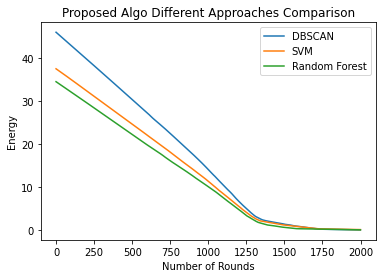

In [16]:
# Energy Graph at 0.5 J
xr = np.arange(0,2000,1)
EnergyDB = [45.93849442432001, 45.90753908864, 45.87644995295999, 45.84549461728002, 45.8144054816, 45.78345014592003, 45.75238033024001, 45.72132191455998, 45.69022693888001, 45.65928316320001, 45.62818818752, 45.59712977184001, 45.56605995616, 45.53510462048002, 45.5040462048, 45.472976389120014, 45.44202105344002, 45.41099383776001, 45.38003850208001, 45.34896868640001, 45.31791027071997, 45.28688305504002, 45.255927719360024, 45.22484146368, 45.193897688000014, 45.16287047232001, 45.13181205664003, 45.10071708096001, 45.069711785280006, 45.03864196960001, 45.00753783392001, 44.97706520524002, 44.94670547968282, 44.91579213100282, 44.8853316854456, 44.85445640435242, 44.8236631958224, 44.79256371026523, 44.7618241017352, 44.73078216605521, 44.70030953737523, 44.66900536884523, 44.63823748775202, 44.60752559922204, 44.57673239069201, 44.54562825501203, 44.515140526482035, 44.48473593780203, 44.45394272927205, 44.422584400742025, 44.391579105062036, 44.36109137653202, 44.330297231109235, 44.29978182555205, 44.26842349702202, 44.23801890834203, 44.20730486278484, 44.17645238169163, 44.145094053161635, 44.11424198773884, 44.083754259208845, 44.052676603528845, 44.02203781484882, 43.99132592631884, 43.96026756076162, 43.92884949533883, 43.89809104680882, 43.86759637812884, 43.83654724959885, 43.805833204041654, 43.775039058618844, 43.74372593008883, 43.71272063440883, 43.68180728572886, 43.65095522030605, 43.619971051776055, 43.58918148621884, 43.557690780599636, 43.526890795176854, 43.49654380649684, 43.46544992093966, 43.434691472409625, 43.40348796679044, 43.37299885811043, 43.341607992687635, 43.311242347130474, 43.280448201707664, 43.24967200061444, 43.21831367208445, 43.18779600340445, 43.157006437847265, 43.125973332424465, 43.09521488389446, 43.06413811833724, 43.03372552965725, 43.00252202403806, 42.97148891861526, 42.94038943305805, 42.90959312437804, 42.87820000092806, 42.84732769550526, 42.81644414988608, 42.78607850432885, 42.75469882087884, 42.72360283545607, 42.691075544324846, 42.66017643564486, 42.629685830087666, 42.59870996446843, 42.567909979045666, 42.53682551603246, 42.506035950475265, 42.47465626702528, 42.44385995834527, 42.412399252922484, 42.38102597123247, 42.350236405675275, 42.319524517145275, 42.28739722601407, 42.25633868039486, 42.225261914837674, 42.194796206157655, 42.16289092065367, 42.131451877203666, 42.100418771780866, 42.06908818498086, 42.03801141942366, 42.006618295973674, 41.97574599055088, 41.943840705046874, 41.912637199427664, 41.880509908296474, 41.84940699961647, 41.818348634059284, 41.78750599296607, 41.75611286951608, 41.72505935327128, 41.69418704784848, 41.66218071671727, 41.631329739037284, 41.60015736614247, 41.56925140058527, 41.53776069496606, 41.507266026286075, 41.475805320863294, 41.44406402973209, 41.4129336568373, 41.38214409128009, 41.35080185310008, 41.319748336855305, 41.28804417340532, 41.256861067982484, 41.226318702425296, 41.1953587168061, 41.164049833356096, 41.132144547852086, 41.10160295917209, 41.06947566804089, 41.03808480261808, 41.0068853049381, 40.975970419380886, 40.94422912824969, 40.91326110046968, 40.8822852348505, 40.85149566929329, 40.8204625638705, 40.79004281519048, 40.75851628229568, 40.72598899116451, 40.69508302560731, 40.664240384514095, 40.63295217161932, 40.6017734134393, 40.56956644230809, 40.5385333368853, 40.507663159205315, 40.47672370631051, 40.4452330006913, 40.41460407513411, 40.3837049664541, 40.3524386430041, 40.320960917500116, 40.2903976520773, 40.258958608627296, 40.228235123070114, 40.19690453627012, 40.16541383065092, 40.13419408287091, 40.10245279173972, 40.07153790618252, 40.0406656007597, 40.009187875255705, 39.9786103665757, 39.94775938889572, 39.916008585445724, 39.88493181988851, 39.853694221708515, 39.82267679628573, 39.79130784583572, 39.759581560331696, 39.72860569471253, 39.69647840358132, 39.66568883802412, 39.63528424934411, 39.60389338392131, 39.5716834668841, 39.54086080920413, 39.51021732364692, 39.47900597586692, 39.446799004735695, 39.415321279231705, 39.384130213808916, 39.35341832527891, 39.322341559721735, 39.29096827803174, 39.26045060935172, 39.22940774373254, 39.19844924338933, 39.16706955993934, 39.13597357451653, 39.10531792338173, 39.07279063225051, 39.04188466669334, 39.01035813379854, 38.97955814837573, 38.94832055019573, 38.916752826745714, 38.88620678118852, 38.85475077568452, 38.823945558004546, 38.79250651455452, 38.76111564913173, 38.73069446045176, 38.699531794832545, 38.668888309275346, 38.63755772247534, 38.60617803902534, 38.57508205360253, 38.543988168045345, 38.51146087691414, 38.479734591410136, 38.44864960363014, 38.41759105801093, 38.386442250157735, 38.355813324600526, 38.32360635346933, 38.293117244789336, 38.26242617936653, 38.23135536168653, 38.19904367700135, 38.16855787144414, 38.13694111331292, 38.10575728789013, 38.07431696238613, 38.04305215277294, 38.01164927459296, 37.97948498191775, 37.94695769078655, 37.916497245229344, 37.88498941961014, 37.85406531093015, 37.82319300550734, 37.792183003330955, 37.76080331988094, 37.73001375432376, 37.698573428819735, 37.665821336144546, 37.63408004501335, 37.60269619540016, 37.57189620997737, 37.54073354435817, 37.50978127657816, 37.47868739102097, 37.44656009988976, 37.41570912220976, 37.38528937352976, 37.354437308106945, 37.32285249849376, 37.29248685293657, 37.260202601805354, 37.22874659630136, 37.19727847812136, 37.165323913436175, 37.13422792801335, 37.103344382394155, 37.07271545683696, 37.04050553979977, 37.008920730186574, 36.97754744849656, 36.94567071497656, 36.91518160629654, 36.884045300873765, 36.85313041531655, 36.82179982851657, 36.79066945562175, 36.75814216449055, 36.72662675890657, 36.69575658122657, 36.66358357757336, 36.63286009201618, 36.60181096348615, 36.57033323798217, 36.53780594685097, 36.50689020142818, 36.47540869364819, 36.444493808090975, 36.41260228516579, 36.381271698365794, 36.35013427274656, 36.31768474007138, 36.28733775139137, 36.25572099326018, 36.22430500783738, 36.19352880674419, 36.16239843384937, 36.13101239287657, 36.100368846856576, 36.06955528129939, 36.03742799016818, 36.00552270466419, 35.97419309505099, 35.942802229628185, 35.91204701194819, 35.88030572081698, 35.849512635259785, 35.818469769640586, 35.786612221605395, 35.75540087382539, 35.72485928514541, 35.69339857972259, 35.661352454138594, 35.62978473068858, 35.59790799716858, 35.56727907161139, 35.53590578992139, 35.50473341702659, 35.47363743160379, 35.441896140472586, 35.41003859243739, 35.3789618268802, 35.34800955910019, 35.3161042735962, 35.2842275400762, 35.25318467445699, 35.221804991007, 35.191015425449784, 35.15872426179661, 35.12644001066541, 35.09609302198541, 35.06432914101259, 35.032597496327405, 35.0008354181474, 34.96991967272461, 34.9391961871674, 34.90782723671738, 34.876068311133395, 34.844210763098204, 34.8123225975942, 34.780581306462985, 34.749800248783004, 34.71914486316383, 34.6884308176066, 34.6573348321838, 34.62540618749861, 34.593789429367405, 34.56106765669221, 34.530152771135, 34.499274462455, 34.467917016951006, 34.43681583393781, 34.406021688515025, 34.37488426289581, 34.3434452194458, 34.311173686770616, 34.2800248789174, 34.24911891336021, 34.217431075180215, 34.18603795173022, 34.15457724630742, 34.12229299517622, 34.090836314203415, 34.060054588646224, 34.02916169575143, 33.998378078071426, 33.966987212648625, 33.93511047912861, 33.90384415567861, 33.872151310094615, 33.84160972141462, 33.81051583585743, 33.779122712407414, 33.74768238690342, 33.716798841284245, 33.68540797586142, 33.65421773241143, 33.621632799736226, 33.59001604160502, 33.55782227795182, 33.526610930171834, 33.495514944749026, 33.46488601919184, 33.43299785368783, 33.40027608101261, 33.36888295756263, 33.338470368882625, 33.30702201555104, 33.27540525741984, 33.24414044780662, 33.21293694218743, 33.181949444507424, 33.15103369908465, 33.120673973527424, 33.088910092554634, 33.057219167869434, 33.02588858106943, 32.99412650288942, 32.96341245733223, 32.93120548620103, 32.90014547330623, 32.86912804788345, 32.83716417908663, 32.80441208641144, 32.77345996423504, 32.742401433100234, 32.710274141969045, 32.67912107634984, 32.648331510792644, 32.61714840536984, 32.585621872475045, 32.55510420379504, 32.522576912663844, 32.49097862707985, 32.46008573418504, 32.428898376005044, 32.39786527058224, 32.36707570502506, 32.335706754575035, 32.30398046907105, 32.27208894614584, 32.239561655014654, 32.20805382939546, 32.17718365171547, 32.14662390303546, 32.115590797612654, 32.08357623292745, 32.05309042737026, 32.02076128179705, 31.989171417414255, 31.956757308617462, 31.925909959927456, 31.89471889450465, 31.864075408947443, 31.831698996272255, 31.800259952822255, 31.76835466731826, 31.73721679435506, 31.705600036223867, 31.674541670666642, 31.643669365243863, 31.61280057962465, 31.581613221444663, 31.55048284854986, 31.518355557418666, 31.48659663183467, 31.454011699159455, 31.422908790479458, 31.391492805056664, 31.360036799552663, 31.329550993995465, 31.298242110545466, 31.26743689286547, 31.235927731892662, 31.20417692844267, 31.173304623019863, 31.142528421926674, 31.11011431312987, 31.078546589679874, 31.046669856159873, 31.016026370602678, 30.984993265179867, 30.95278629404867, 30.922095508429468, 30.891041992184668, 30.85994250662747, 30.829146197947463, 30.79813317252468, 30.76600588139346, 30.734279595889483, 30.702949986276284, 30.67161278809627, 30.64098386253908, 30.609092339613888, 30.576763194040687, 30.545347208617873, 30.51469182299868, 30.483522299548685, 30.452065618575887, 30.419616085900685, 30.38851660034348, 30.357038874839493, 30.32572999138948, 30.294538925966677, 30.26249280038269, 30.230751509251487, 30.200079371571494, 30.168010862774697, 30.13722913721749, 30.106126228537498, 30.075253923114683, 30.044361030219896, 30.0123546990887, 29.979632926413487, 29.948142220794296, 29.916805022614287, 29.885516809719498, 29.853389518588287, 29.82259995303109, 29.791416847608293, 29.760465636473494, 29.729327763510298, 29.698768014830314, 29.666240723699087, 29.63537783080431, 29.604201893124294, 29.573478407567098, 29.54227490194789, 29.510479257262702, 29.4792961518399, 29.448194968826694, 29.415965140029893, 29.384380330416693, 29.352373999285497, 29.320839113781496, 29.2883895811063, 29.257290095549102, 29.2264901101263, 29.19540512234631, 29.163919881373495, 29.131392590242317, 29.100971401562308, 29.069587551949105, 29.03728402393111, 29.006368278508305, 28.975654232951094, 28.94445072733191, 28.913603378641902, 28.882372076167503, 28.850466790663514, 28.81929726721351, 28.787609429033523, 28.755732695513508, 28.725018649956304, 28.693012318825115, 28.66191633340231, 28.630826123789106, 28.600070906109117, 28.568344620605114, 28.53581732947391, 28.50434981438231, 28.47345070570232, 28.442417600279512, 28.411511634722316, 28.380362409103117, 28.34876412351913, 28.317390841829102, 28.28513419714391, 28.254467631586717, 28.223276566163918, 28.191638235032727, 28.15926182235752, 28.128210357974716, 28.096807479794727, 28.065329754290723, 28.03470082873352, 28.00295002528352, 27.971559159860735, 27.94026922556273, 27.908141934431526, 27.876938428812327, 27.84541750328233, 27.814899834602322, 27.78354785212793, 27.75300548657072, 27.722112593675927, 27.68990267663873, 27.658511811215913, 27.625926878540728, 27.59379958740952, 27.562948609729528, 27.531893225346728, 27.49953502061034, 27.467571151813523, 27.434433295782732, 27.401943291239927, 27.369346589141923, 27.336955028963924, 27.303817172933133, 27.270592115802735, 27.238214432149537, 27.204994615019135, 27.172669251365946, 27.139439834235528, 27.10706599058233, 27.075057811547932, 27.044017965990736, 27.010792908860346, 26.97975306330315, 26.94776400426874, 26.916724158711546, 26.883540541581144, 26.85252949602394, 26.81400566589354, 26.776769622240334, 26.73880116510995, 26.702739996579922, 26.665294258601946, 26.629566069921943, 26.59154506723354, 26.555580521810754, 26.524824536191552, 26.49327702119434, 26.46229246301435, 26.430983380089142, 26.399907475562348, 26.36833900676555, 26.337466113870754, 26.300920654836347, 26.26546232927916, 26.22639154004315, 26.18941242800875, 26.153666342451555, 26.11937329833716, 26.08763261617997, 26.05611992350476, 26.02411473557596, 25.994227466895957, 25.960865449085553, 25.929298524331553, 25.89922038665156, 25.869261001032363, 25.836712918727564, 25.805435798504753, 25.776117809824758, 25.743102562817555, 25.71177462512596, 25.681339379621964, 25.651767139621956, 25.618886091364363, 25.588052626691567, 25.55875235801155, 25.529611598011577, 25.498611782158775, 25.468645196539565, 25.438492751732365, 25.406552122048375, 25.37497298937317, 25.34461085140318, 25.314610263473167, 25.28552026347317, 25.25230239795557, 25.222574812336365, 25.192565646752378, 25.16229712932238, 25.13223180158957, 25.103548521589584, 25.073747316085566, 25.04522083052836, 25.01399099177078, 24.982773579095564, 24.953076042165577, 24.92271848119278, 24.893763215573568, 24.86325156998958, 24.83280411885837, 24.801818560100784, 24.773444360100783, 24.744203794543573, 24.714862876363576, 24.68554045868358, 24.65522557846077, 24.624261796120777, 24.593044383445577, 24.563045594766784, 24.53328270926278, 24.504012149262778, 24.474161383705574, 24.444698075025578, 24.41467632940638, 24.384202303983567, 24.35286294241197, 24.32130759361516, 24.289418548114384, 24.25848790993438, 24.227852069457178, 24.197542778322386, 24.169256672642383, 24.14126623136679, 24.11208488959239, 24.08344457353319, 24.05162137980319, 24.02075685872, 23.989680518405986, 23.959093798405988, 23.927158702464787, 23.895984098099987, 23.864181385841597, 23.8330468445148, 23.8024212445148, 23.771515240149995, 23.74040222187279, 23.707984804848397, 23.677168004848397, 23.64544932783679, 23.614815367836794, 23.583739027522796, 23.55251583834, 23.52071312608161, 23.48596324771759, 23.452133705797603, 23.420157033150794, 23.388702948785983, 23.357457839603203, 23.326079672645992, 23.293908727110008, 23.262647680469595, 23.231320760469593, 23.200383276104798, 23.168292057152406, 23.137303708472405, 23.105453299158004, 23.073666058074796, 23.040254602213217, 23.008028580555617, 22.977707453785612, 22.945047818948815, 22.912158118913208, 22.87886130305161, 22.848519517628816, 22.815592591262817, 22.78487477358281, 22.752744729218005, 22.721761980538012, 22.690693239128017, 22.660670272358015, 22.62795979235801, 22.596243912358016, 22.564258392358013, 22.531735272358013, 22.498632156796013, 22.46587287679601, 22.434687556796, 22.402753771373213, 22.37056277137321, 22.33838745137322, 22.305317251373197, 22.272086142190435, 22.24062615031042, 22.208716070310413, 22.17596303031042, 22.143966630310413, 22.11235706354042, 22.079896303540416, 22.048239217983216, 22.01390428108041, 21.979752128055225, 21.94670910707041, 21.91463590707042, 21.882479921451228, 21.850136209571218, 21.81629715286483, 21.781464795162815, 21.749081555162817, 21.71751854839281, 21.685151426275628, 21.652825266275613, 21.619527788222026, 21.585881122947622, 21.552252741962807, 21.518287565952026, 21.486044084858822, 21.454587939436024, 21.421075339436015, 21.38657242701322, 21.354845381456027, 21.320929392273218, 21.287773219458025, 21.253964081806426, 21.22168476180643, 21.19079386599202, 21.161076520372827, 21.13082192559283, 21.099525084509626, 21.067307647722032, 21.03787388095203, 21.008147600952032, 20.97878407242203, 20.946521815583626, 20.915958831671226, 20.88547104045002, 20.853963811267214, 20.82327955233722, 20.794127952337224, 20.76160274345042, 20.73255319802762, 20.703176963247625, 20.672739403247622, 20.641224267306416, 20.61002805136522, 20.57813911190402, 20.54607645487963, 20.51448031978322, 20.48272710468682, 20.451375889590434, 20.41946245439923, 20.388234574399227, 20.356866639302826, 20.324305227713626, 20.29242560382203, 20.25877360890202, 20.225681527902033, 20.192906188949625, 20.160287104584818, 20.128110504584825, 20.094165855810026, 20.06195873581002, 20.029984775810018, 19.998431735810012, 19.966596391918422, 19.933593932668433, 19.901936932668423, 19.86977462317522, 19.837465138810426, 19.805042618810415, 19.772756938810424, 19.739439947328428, 19.707223667328424, 19.67454739240842, 19.64248331240842, 19.609945838550427, 19.57792863855043, 19.545500878550417, 19.51378119855041, 19.48148587855043, 19.447939096418818, 19.416109877168825, 19.384618517168818, 19.350753388669222, 19.31904814866923, 19.286428594811223, 19.25440080613122, 19.22124440341562, 19.188517449681626, 19.15398843994522, 19.119682719945224, 19.086127642091622, 19.050498045768826, 19.016832849008427, 18.98286129224802, 18.94692816042681, 18.91200806400482, 18.87673985435282, 18.841661955895624, 18.806711682127617, 18.769919435028815, 18.73528444488401, 18.70149940812362, 18.669407206683218, 18.636140849922814, 18.603424453162418, 18.5703817319952, 18.538309135234822, 18.50494832386762, 18.471581434215615, 18.43803430456361, 18.40438401480322, 18.371700605151226, 18.33955080515122, 18.308660165151213, 18.27619703014122, 18.243755590141216, 18.210031031878415, 18.176889261791224, 18.143720691704008, 18.11120141045401, 18.077346685723622, 18.04379682679921, 18.010234628536413, 17.977168910273623, 17.943122272010815, 17.90997282192361, 17.87767254067362, 17.844551473699216, 17.810856035436416, 17.777675105349218, 17.745759664099214, 17.712760250840425, 17.678753044287614, 17.645637637798817, 17.612312610721215, 17.57682092091522, 17.542653828414817, 17.50876432414561, 17.475385936736014, 17.44283990348601, 17.411218473786008, 17.37882412720601, 17.34502669714802, 17.31194072093841, 17.27661173319202, 17.24127035106922, 17.20893820448921, 17.172611638434006, 17.139626428144403, 17.104283234840803, 17.071134602340813, 17.036408222285203, 17.002983248466013, 16.968285219573207, 16.93567669874361, 16.89935013268842, 16.866386891314818, 16.83228217131481, 16.79579022860841, 16.7600802251712, 16.725119344078013, 16.689913704078005, 16.657422704078012, 16.62495534407801, 16.591938664078004, 16.55808634861361, 16.525959748613605, 16.493343707363607, 16.461037707363605, 16.429322667363603, 16.39603897618841, 16.364157608162007, 16.33203210665641, 16.30051905863001, 16.267965974549604, 16.235497210469205, 16.202972594149617, 16.171009350069205, 16.13840965963441, 16.106896611608008, 16.0680293145388, 16.0316266245688, 15.992640870748398, 15.956797420778406, 15.919869770808402, 15.881680498165604, 15.844638973665603, 15.808639243695607, 15.772336873725601, 15.737678480577609, 15.70362792057761, 15.668745287429608, 15.634799167429602, 15.600250893966805, 15.566108735034005, 15.53160949610121, 15.496417857168403, 15.461884594716398, 15.4270648357836, 15.391721995600804, 15.357046876668008, 15.322062203205201, 15.287920044272404, 15.253420805339605, 15.2183997553696, 15.1847975507724, 15.149318875783198, 15.115861768089998, 15.080322474522003, 15.045527240125205, 15.009703423616005, 14.973224927106804, 14.9363741167408, 14.901547773302003, 14.865768275024791, 14.831861235024807, 14.791377955126396, 14.753737695473196, 14.715000130793191, 14.6787267707932, 14.641214114200002, 14.601361359889594, 14.5650220809568, 14.528560200956797, 14.492390428840002, 14.456298928251199, 14.419759410598399, 14.383119644084795, 14.347453500281587, 14.311606985129599, 14.274944611257595, 14.23915166781879, 14.202927512666792, 14.164784433497994, 14.125785899229994, 14.088993524067991, 14.053105404067987, 14.016555964067994, 13.978935259577595, 13.940153954558387, 13.900150318062392, 13.858507025415191, 13.819919027915985, 13.780652345160394, 13.744922170910389, 13.70828904635159, 13.672221064071582, 13.636366881791586, 13.60029889951159, 13.563665774952788, 13.527811592672785, 13.492251809997583, 13.455451507738386, 13.41703659020199, 13.377943035825991, 13.338024573682782, 13.301119991423588, 13.264659249164385, 13.225782226905185, 13.187568000048785, 13.148546700789582, 13.10836975440878, 13.069306020379582, 13.028610818461589, 12.988243068219587, 12.948739852583982, 12.912059390324785, 12.874573418670783, 12.844288778670778, 12.813810498670785, 12.783874178670782, 12.753765538670777, 12.723241818670783, 12.692695058670783, 12.661025114683177, 12.631307634683179, 12.600034157475974, 12.564764637475978, 12.526020789775174, 12.490120353850378, 12.45194132935558, 12.413274324497172, 12.376617579357175, 12.339650558712373, 12.303867554115174, 12.269837794115174, 12.231841700413973, 12.193353713729577, 12.154295253651176, 12.112245569356778, 12.073037009950779, 12.033591927235177, 11.993148084973175, 11.956000172958376, 11.919135860943578, 11.882147436871175, 11.844007027563574, 11.805724474805974, 11.76923551480597, 11.729218518121174, 11.691765417936375, 11.654859653256375, 11.61521901884237, 11.577180106827566, 11.536654285834777, 11.497272613831576, 11.459436934425575, 11.421390857291977, 11.38767221330357, 11.356901703373572, 11.32708627168476, 11.290383959797957, 11.25338897851116, 11.216981042046356, 11.181726852116363, 11.147573943436354, 11.111645113506357, 11.075563053861961, 11.040779503931956, 11.00509583400196, 10.96919588407196, 10.935054244071955, 10.898606852185157, 10.862982647505156, 10.827572738825156, 10.790733746218356, 10.756317396288356, 10.720952196288357, 10.685097127608351, 10.647894556801155, 10.61172847976475, 10.575183039764754, 10.541228525913551, 10.506398564843156, 10.472054804843156, 10.43648916484315, 10.39886012691275, 10.363088766912755, 10.32254374421075, 10.285731383589551, 10.249232678016348, 10.211134638016349, 10.171464873114349, 10.133239673114351, 10.09192787328475, 10.052972708007552, 10.01460765989755, 9.976987075468346, 9.936338297941148, 9.899238937941151, 9.861485499653947, 9.824738825519152, 9.78511871062995, 9.745868468507547, 9.71047115403675, 9.678701354036741, 9.64457024465274, 9.606504030703144, 9.570565578483944, 9.534990798811142, 9.502383878811147, 9.470664158811141, 9.437744159878344, 9.405044343803938, 9.369661660341142, 9.333853192759543, 9.300958461176341, 9.263735720855545, 9.229810200855542, 9.192833145235143, 9.159738881796343, 9.12835852179634, 9.09387246064234, 9.060334489059137, 9.02373303306594, 8.989002954985938, 8.954176526949938, 8.92024867613954, 8.88480832166874, 8.849616293705537, 8.816074762122343, 8.78472628212234, 8.749890663391541, 8.715587901890745, 8.68154392296074, 8.64594030455274, 8.610894873775543, 8.57789723377554, 8.542127367724735, 8.510589887724734, 8.468546068761935, 8.43032378653714, 8.385969714997536, 8.34065461362394, 8.299561769945136, 8.259678080213135, 8.221606761446736, 8.180145301789938, 8.139866703059935, 8.096667762974338, 8.056229730367537, 8.015696796952735, 7.975187592462335, 7.935826259825135, 7.8917547630951335, 7.8509789088935324, 7.807218337423934, 7.767295181376334, 7.727600749639932, 7.686421047647536, 7.6471832468103305, 7.604931450804744, 7.567968700799148, 7.532266372158351, 7.494420543750349, 7.456725726167148, 7.41934943541115, 7.379667732203548, 7.345059075593547, 7.307519637464747, 7.27303964956195, 7.234521771529946, 7.195629910272745, 7.159200709219544, 7.119633675626347, 7.084310695449945, 7.0471031814467455, 7.011682994481547, 6.976055413082348, 6.93988814452995, 6.902353536319562, 6.868575749354361, 6.83352462358676, 6.797405603410361, 6.760735343817158, 6.72518760221436, 6.690955671810359, 6.652246665471959, 6.616063776736759, 6.57958896415116, 6.541674240642362, 6.504385920595557, 6.470020102572357, 6.431899436949958, 6.3974687376739565, 6.36084614672836, 6.328223407376757, 6.292299669358359, 6.2605901294471575, 6.224257435839559, 6.188898960184758, 6.153259684701157, 6.11880095721836, 6.085742820288359, 6.052520200111956, 6.016948726448757, 5.98155947901756, 5.947998103058749, 5.912656385563547, 5.878054644025544, 5.8452096840255425, 5.817040866880737, 5.784158375179139, 5.751103961917541, 5.719088315497136, 5.686706080043937, 5.653902650401538, 5.619370460589537, 5.587282516343537, 5.553908840859937, 5.519901400567939, 5.486381022366738, 5.454242727506723, 5.422358080514325, 5.388442036150724, 5.355107194740723, 5.31973593660392, 5.2866234207667215, 5.250595331990723, 5.215357281643126, 5.180431188925123, 5.148266873031522, 5.1149210772583205, 5.081257619724321, 5.049575871044321, 5.018977591044323, 4.988158558572713, 4.958185599079526, 4.919932500137926, 4.887704545469914, 4.853759132742713, 4.815002746959122, 4.774461374176723, 4.734571440896323, 4.700169189036331, 4.664247556124332, 4.627552944725923, 4.5962670456359245, 4.563694882296726, 4.5332590986111105, 4.4988830177527115, 4.465387646119911, 4.4328958109171115, 4.398510073283112, 4.36495856981071, 4.330945946701515, 4.294681724794707, 4.267454749591906, 4.240987229911907, 4.214323229689106, 4.185366817897506, 4.159066023892706, 4.130807758947106, 4.103731268403505, 4.075902278316306, 4.046337188535506, 4.019113888786306, 3.9918661190479052, 3.965666999047906, 3.9384369978923055, 3.910582208024284, 3.8845847780943012, 3.8580111552563014, 3.8340995652714995, 3.8023222950035005, 3.7689238075311007, 3.736657912082301, 3.7063409333431014, 3.6731418782523173, 3.6403435783531055, 3.609543748312293, 3.5833038306170835, 3.552898212240282, 3.5230086333590833, 3.4942451247518838, 3.4711157656910494, 3.4435608906310495, 3.414236516525049, 3.3873943168450547, 3.3541414987830547, 3.3212786172702544, 3.2909571947762455, 3.260938664916246, 3.234212537850633, 3.205719890495415, 3.1826872234254027, 3.1611687218393874, 3.137712539646988, 3.1158961715237874, 3.093871608038187, 3.077067054186988, 3.060534472753768, 3.0437975968665487, 3.027651038923747, 3.0120609989237477, 2.9954591488689473, 2.9789223888481478, 2.9632139888481475, 2.9462503263521373, 2.9219199765933386, 2.898889005023348, 2.877734236950148, 2.8621459903821562, 2.8470325436989556, 2.833079076198955, 2.8195762761989553, 2.8057570382561554, 2.7933891936461492, 2.773823371117349, 2.7534704589965497, 2.7390349375301493, 2.7265545307817534, 2.7059022615269535, 2.6867796926065437, 2.6663327101065453, 2.6449409300353435, 2.624634673886954, 2.6121908964641363, 2.588011374399737, 2.5655425460281487, 2.5479886237777247, 2.531295286679725, 2.5136915167369245, 2.495397411694924, 2.4794549931429213, 2.462526637250521, 2.4473921568057233, 2.432469733240109, 2.419897705841308, 2.4073784566632965, 2.389448433856497, 2.3740618173176813, 2.360905761413674, 2.352411663241645, 2.3419658232416456, 2.3314964232416453, 2.321050583241645, 2.310461103241644, 2.299797223241644, 2.2892251832416446, 2.278779343241644, 2.2681904632416447, 2.2575265832416442, 2.2478847832416444, 2.238456105081655, 2.2275857450816554, 2.2166382650816683, 2.2096329450816676, 2.2026276250816683, 2.1955924650816683, 2.188587145081668, 2.1815818250816683, 2.174546665081668, 2.167541345081668, 2.1605360250816674, 2.1535693450816673, 2.146564025081667, 2.139742745081667, 2.132941465081667, 2.125936145081668, 2.1190533450816673, 2.112308545081667, 2.1052438650816674, 2.0984225850816665, 2.091357905081667, 2.0846131050816665, 2.077598825081667, 2.0705935050816673, 2.0637107050816663, 2.056785865081666, 2.0499645850816663, 2.0428999050816663, 2.0361551050816655, 2.029356945638479, 2.0223368656384793, 2.0155782656384793, 2.008748145638479, 2.001703305638479, 1.994947825638479, 1.9880823056384784, 1.9811980256384787, 1.9743325056384786, 1.9675770256384788, 1.9605321856384788, 1.953666665638479, 1.9469205856384786, 1.9400363056384786, 1.9331707856384786, 1.926415305638478, 1.9195497856384778, 1.912543185638478, 1.905787705638478, 1.8989221856384775, 1.8919155856384773, 1.8850500656384774, 1.8782945856384776, 1.8716184656384798, 1.8652023056384799, 1.8588471856384794, 1.8524203456384796, 1.846135222573275, 1.840160702573275, 1.8342700625732746, 1.8283119825732745, 1.8223374625732747, 1.8164468225732744, 1.8104728625732749, 1.8046446625732742, 1.7988405425732743, 1.7930528225732747, 1.7872487025732744, 1.7814609825732746, 1.7756568625732738, 1.769869142573274, 1.7640650225732741, 1.7582773025732739, 1.7524731825732738, 1.7466854625732737, 1.7408813425732736, 1.7350936225732738, 1.7292895025732733, 1.7235017825732737, 1.7176976625732734, 1.7119099425732731, 1.706105822573273, 1.7003181025732734, 1.6945139825732733, 1.688726262573273, 1.6829221425732726, 1.6771344225732732, 1.671330302573273, 1.665733742573273, 1.6601339825732728, 1.6544753825732725, 1.648875622573273, 1.6432170225732725, 1.6375243025732726, 1.6319245425732725, 1.6262659425732724, 1.6205732225732723, 1.6149146225732727, 1.609314862573272, 1.6036221425732717, 1.5979635425732714, 1.5923637825732715, 1.5866710625732718, 1.5810124625732713, 1.5754127025732712, 1.5697199825732715, 1.5640613825732712, 1.5584616225732715, 1.5527689025732712, 1.5471103025732713, 1.5415105425732711, 1.535870502573271, 1.530267982573271, 1.524668222573271, 1.5190281825732708, 1.5133695825732707, 1.5077984625732708, 1.4981132225732705, 1.4884279825732702, 1.47874274257327, 1.4690575025732702, 1.45937226257327, 1.4496870225732699, 1.4400017825732696, 1.43031654257327, 1.4206313025732693, 1.4109460625732693, 1.401260822573269, 1.3915755825732692, 1.3818903425732691, 1.3722051025732687, 1.362836982573269, 1.3531517425732684, 1.3437318225732686, 1.3346757862852574, 1.3307009062852575, 1.3267260262852576, 1.3227511462852577, 1.3187369462852576, 1.3146504662852574, 1.3104938662852574, 1.3064796662852574, 1.3023711462852572, 1.2982443062852573, 1.2943050262852576, 1.2900271462852577, 1.2860262262852578, 1.2819412262852576, 1.2778322662852577, 1.2738929862852577, 1.2695635462852575, 1.2655886662852578, 1.2615036662852577, 1.2573947062852577, 1.2534554262852575, 1.2494545062852576, 1.2452143462852574, 1.2411293462852575, 1.2369727462852573, 1.2330396262852572, 1.2289249862852574, 1.2249240662852572, 1.2206050262852575, 1.2165395862852573, 1.2123829862852573, 1.2084251462852573, 1.2043047462852572, 1.2002957062852575, 1.197595666285272, 1.1893952262852718, 1.181122946285272, 1.172412586285272, 1.1639731062852718, 1.1555535462852717, 1.1473549862852714, 1.1386391862852714, 1.1301357062852713, 1.121863426285271, 1.1133655462852712, 1.105097986285271, 1.0968850662852707, 1.0881747062852707, 1.0799632662852705, 1.0715256662852706, 1.0632581062852706, 1.0547628262852704, 1.0460524662852702, 1.03784686628527, 1.0296354262852698, 1.0211997462852695, 1.0129938662852696, 1.0042835062852695, 0.9959001462852575, 0.9917859462852575, 0.9878048262852576, 0.9836844262852574, 0.9797416662852575, 0.9756450662852574, 0.9714884662852574, 0.9673969062852574, 0.9632433462852575, 0.9592299462852575, 0.9551095462852576, 0.9511667862852576, 0.9470582662852576, 0.9429439462852576, 0.9388523862852576, 0.9346988262852575, 0.9306854262852574, 0.9265650262852576, 0.9226222662852573, 0.9185137462852572, 0.9143669862852573, 0.9102928662852574, 0.9061786662852571, 0.9021777462852572, 0.8982619462852571, 0.8942123462852573, 0.8900961862852572, 0.8859395862852574, 0.8819139862852573, 0.8778637462852573, 0.8739094662852571, 0.8697944262852573, 0.8656802262852573, 0.8616793062852572, 0.8577461862852572, 0.8536315462852572, 0.849523026285257, 0.8453583862852571, 0.841353866285257, 0.837172506285257, 0.8330809462852569, 0.8291266662852571, 0.8250124662852569, 0.8209383462852571, 0.816919786285257, 0.812986666285257, 0.808866266285257, 0.8049513014084547, 0.8008349014084547, 0.7974382614084367, 0.7932878614084364, 0.7892053814084365, 0.7849904214084364, 0.7815332214084264, 0.7760577014084264, 0.7707673414084263, 0.7655196214084263, 0.7599664614084263, 0.7546685814084264, 0.7494372614084263, 0.7441895414084263, 0.7387449814084261, 0.7331918214084262, 0.7278638214084263, 0.7225602214084262, 0.7173121814084261, 0.7120218214084261, 0.706698701408426, 0.7013707014084261, 0.6958175414084259, 0.6906447414084094, 0.6848596614084094, 0.6790017414084095, 0.6733603814084094, 0.6676113814084093, 0.6616460214084094, 0.6559715814084095, 0.6502565014084095, 0.6446151414084095, 0.6386488214084094, 0.6329490614084095, 0.6271652614084096, 0.6212060614084095, 0.6155030614084096, 0.6098921414084095, 0.6042638214084095, 0.5982984614084095, 0.5925494614084096, 0.5869081014084095, 0.5811230214084095, 0.5753310314084247, 0.5703040314084247, 0.5654627114084246, 0.5606073514084247, 0.5557782314084246, 0.5508773114084246, 0.5459610314084244, 0.5411197114084245, 0.5360927114084244, 0.5312373514084243, 0.5263364314084245, 0.5214951114084244, 0.5166659914084244, 0.5118827514084242, 0.5068557514084242, 0.5020477582480425, 0.49764835824804254, 0.49313191824804253, 0.48854259824804247, 0.48409727824804244, 0.47962019824804236, 0.47510751824804237, 0.4706249582480424, 0.46610851824804234, 0.46153319824804234, 0.4570205182480423, 0.45254439824804227, 0.44795507824804226, 0.4433764782480422, 0.43880115824804233, 0.43428847824804223, 0.4298123582480423, 0.42543631824804234, 0.4209909982480423, 0.4163357182480423, 0.4118192782480422, 0.4072439582480422, 0.4027312782480422, 0.39825515824804236, 0.3939066382480423, 0.3893939582480424, 0.38521948161726083, 0.3816354816172608, 0.37812112161726086, 0.37461740161726087, 0.37107716161726084, 0.3674931616172608, 0.3640018416172609, 0.3604952416172609, 0.3570154416172609, 0.35342872161726085, 0.3499300816172609, 0.3464376816172609, 0.34285368161726093, 0.33935298612963777, 0.33579022612963777, 0.33223058612964024, 0.32868892209803896, 0.325095762098039, 0.32144992209803896, 0.31782508209803895, 0.3142519220980389, 0.31063896209803904, 0.30704296209803894, 0.30342032209803893, 0.3001027498532436, 0.2965227098532437, 0.2929523098532437, 0.2896958035628349, 0.28501660356283487, 0.2803108835628349, 0.2756432435628349, 0.27101224356283493, 0.26638776356283494, 0.26175676356283495, 0.257248843562835, 0.252581203562835, 0.24795020356283495, 0.24349532356283501, 0.238827683562835, 0.23419668356283502, 0.229712723562835, 0.22507188356283497, 0.220404243562835, 0.21576340356283502, 0.211298363562835, 0.206676243562835, 0.20203540356283503, 0.1991727934508343, 0.19720835345083432, 0.19525191345083429, 0.1933220334508343, 0.19136791345083431, 0.18944315345083432, 0.18748671345083434, 0.18575946884202377, 0.1851275888420238, 0.18447346884202376, 0.18384998884202378, 0.18324682884202378, 0.18263582884202376, 0.18200394884202378, 0.18134982884202377, 0.1807263488420238, 0.1801231888420238, 0.17951218884202377, 0.1788803088420238, 0.17825682884202376, 0.17760270884202378, 0.1769995488420238, 0.17638854884202376, 0.1757566688420238, 0.17513318884202378, 0.1745300288420238, 0.1738759088420238, 0.17326490884202378, 0.1726330288420238, 0.1720298688420238, 0.1714063888420238, 0.1707953888420238, 0.1701412688420238, 0.16950938884202382, 0.1688803888420238, 0.16827722884202378, 0.1676537488420238, 0.16704274884202377, 0.1663886288420238, 0.1657567488420238, 0.16512774884202377, 0.16452458884202378, 0.1639011088420238, 0.1632901088420238, 0.16263598884202382, 0.1620041088420238, 0.1614009488420238, 0.1607719488420238, 0.1601609488420238, 0.1595374688420238, 0.15888334884202382, 0.1582514688420238, 0.1576483088420238, 0.1570193088420238, 0.15640830884202378, 0.1557848288420238, 0.1551307088420238, 0.15449882884202382, 0.15389566884202383, 0.1532666688420238, 0.1526556688420238, 0.1520321888420238, 0.15140030884202382, 0.15074618884202381, 0.15014302884202382, 0.1495140288420238, 0.14890302884202383, 0.1482795488420238, 0.14764766884202382, 0.14699354884202379, 0.1463903888420238, 0.14577938884202382, 0.14515038884202383, 0.14452690884202382, 0.14389502884202382, 0.1432409088420238, 0.14263774884202382, 0.14202674884202382, 0.1413977488420238, 0.14077426884202382, 0.14014238884202382, 0.1394882688420238, 0.13888510884202382, 0.13827410884202382, 0.13764510884202383, 0.13702162884202382, 0.13638974884202382, 0.1357356288420238, 0.13513246884202382, 0.13452146884202382, 0.13389246884202383, 0.13326898884202382, 0.13263710884202382, 0.13203394884202382, 0.13137982884202382, 0.13076882884202382, 0.13013982884202382, 0.12951634884202382, 0.1288844688420238, 0.12828130884202382, 0.12762718884202381, 0.12701618884202384, 0.12638718884202382, 0.1257637088420238, 0.1251318288420238, 0.12452866884202383, 0.12424038750361999, 0.12362938750362, 0.12300038750362, 0.12237690750362, 0.12177374750362, 0.12114186750362001, 0.12053086750362, 0.11990186750362, 0.11927838750361999, 0.11867522750362, 0.11804334750362, 0.11743234750362, 0.11680334750362001, 0.11617986750362, 0.11557670750362001, 0.11494482750361999, 0.11433382750362, 0.11370482750362, 0.11308134750362, 0.11247818750362, 0.11184630750362001, 0.11123530750362001, 0.11060630750362001, 0.10998282750362001, 0.10937966750362, 0.10874778750362, 0.10813678750362, 0.10751330750362001, 0.10688430750362, 0.10628114750362, 0.10564926750362, 0.10503826750362, 0.10441478750362, 0.10378578750362001, 0.10318262750362, 0.10255074750362002, 0.10193974750362002, 0.10131626750362002, 0.10068726750362, 0.10008410750362001, 0.09945222750362001, 0.09884122750362001, 0.09821774750362001, 0.09758874750362001, 0.09698558750362, 0.09637458750362, 0.09574270750362002, 0.09511922750362001, 0.09451606750362002, 0.09388706750362003, 0.09327606750362002, 0.09264418750362002, 0.09204102750362002, 0.09141754750362001, 0.09078854750362002, 0.09017754750362002, 0.08954566750362002, 0.08894250750362002, 0.08831902750362003, 0.08769002750362001, 0.08707902750362001, 0.08644714750362002, 0.08584398750362002, 0.08522050750362002, 0.08459150750362003, 0.08398050750362003, 0.08321550750362001, 0.08258362750362001, 0.08198046750362002, 0.08156386673644249, 0.0809403867364425, 0.08031138673644249, 0.07970038673644249, 0.07906850673644249, 0.07830350673644249, 0.0777003467364425, 0.07707686673644248, 0.07644786673644248, 0.07583686673644248, 0.07520498673644248, 0.07460182673644249, 0.0738368267364425, 0.07321334673644249, 0.0725843467364425, 0.0719733467364425, 0.0713414667364425, 0.0707383067364425, 0.0701148267364425, 0.0693498267364425, 0.06872082673644249, 0.0681098267364425, 0.0674779467364425, 0.0668747867364425, 0.0662513067364425, 0.0656223067364425, 0.0649035467364526, 0.0642870667364526, 0.06367346673645259, 0.0632724360164315, 0.06265283601643148, 0.062036356016431496, 0.06128827601643149, 0.060787816666811996, 0.06015973666681199, 0.059546216666812, 0.058764696666812, 0.05813661666681201, 0.05752309666681201, 0.05674157666681201, 0.056113496666812014, 0.055499976666812015, 0.05487189666681202, 0.05424064000001283, 0.05363864000001283, 0.05303664000001283, 0.052434640000012835, 0.051832640000012836, 0.05123064000001284, 0.05062864000001284, 0.05002664000001284, 0.04942464000001284, 0.048822640000012844, 0.048220640000012846, 0.04761864000001285, 0.04701664000001285, 0.04641464000001285, 0.04581264000001285, 0.045210640000012854, 0.044608640000012856, 0.04400664000001286, 0.04340464000001286, 0.04280264000001286, 0.04220064000001286, 0.04159864000001286, 0.040970560000012854, 0.04034248000001285, 0.03971440000001286, 0.03910088000001286, 0.03847280000001286, 0.03785928000001287, 0.037231200000012864, 0.036617680000012864, 0.036004160000012865, 0.03537608000001286, 0.03476256000001287, 0.034134480000012866, 0.03352096000001287, 0.03289288000001288, 0.03227936000001288, 0.031868560000028474, 0.031255040000028475, 0.030653040000028477, 0.030039520000028477, 0.029426000000028478, 0.028812480000028482, 0.02821048000002848, 0.02759696000002848]
EnergySVM = [37.45117017132001, 37.42649010264, 37.40181003396, 37.377129965280005, 37.3524498966, 37.32748551117721, 37.302805442497196, 37.277833696878005, 37.253153628198, 37.228189242775194, 37.203217497156004, 37.178537428476005, 37.15357304305321, 37.12860129743401, 37.10392122875401, 37.0789568433312, 37.05398509771202, 37.02930502903201, 37.00434064360922, 36.979368897990014, 36.95468882931001, 36.92945887113, 36.90448165345001, 36.879517268027215, 36.85454552240802, 36.82986545372802, 36.804635495548006, 36.779658277868016, 36.754686532248805, 36.729722146826006, 36.70504207814601, 36.679812119966016, 36.65483490228602, 36.6298631566668, 36.60518308798681, 36.58021870256401, 36.554988744384, 36.530016998764815, 36.5053369300848, 36.480359712404805, 36.45391333972962, 36.428948954306826, 36.40371899612682, 36.37874725050762, 36.3540671818276, 36.32859193624362, 36.302145563568416, 36.27716834588841, 36.25220396046564, 36.22697400228563, 36.202293933605624, 36.17732218798643, 36.150875815311224, 36.12540056972722, 36.100720501047235, 36.075743283367224, 36.05051332518723, 36.02554157956803, 35.999095206892825, 35.974130821470034, 35.94830381033884, 35.92282856475483, 35.89814849607484, 35.872918537894826, 35.84688328156443, 35.820436908889235, 35.79546516327003, 35.77048794559003, 35.745523560167236, 35.72084349148723, 35.69497222468722, 35.66933330371443, 35.642357835679235, 35.61688259009522, 35.59148973896523, 35.56545448263483, 35.54035293075483, 35.515672862074844, 35.488697394039626, 35.46268264524283, 35.43646898763324, 35.41126768161322, 35.385944676733246, 35.36018327328323, 35.33414801695283, 35.30904646507284, 35.28403325830285, 35.25861154533963, 35.23371883665964, 35.20684435373443, 35.181643047714445, 35.155444573454844, 35.129530562850434, 35.10442901097044, 35.07834637587884, 35.05300895751964, 35.02603348948445, 35.00132694080444, 34.97612563478443, 34.95081378517124, 34.92494251837124, 34.899904671601256, 34.87370619734165, 34.84835565898244, 34.82138019094725, 34.796088531177254, 34.771288702497245, 34.74629701396725, 34.72090416283724, 34.69506160950566, 34.66974975989246, 34.64431135642323, 34.61743687349805, 34.59181981087524, 34.566466463095246, 34.54037016465366, 34.51537847612365, 34.490555207443656, 34.46478492575365, 34.43927278327925, 34.413834379810055, 34.38721941688486, 34.36100575927525, 34.335976790745256, 34.31061456472524, 34.28535687687205, 34.260557048192055, 34.235565359662054, 34.20946906122045, 34.18414052110126, 34.15726603817605, 34.13164897555325, 34.106325970673254, 34.08097262289326, 34.055202341203255, 34.03040251252325, 34.00507397240406, 33.97809850436885, 33.95284081651567, 33.92682606771887, 33.90179192209966, 33.876653090219676, 33.85044573772006, 33.82496819737686, 33.79963965725767, 33.77266418922246, 33.747957640542474, 33.72244549806807, 33.69713364845486, 33.67203209657486, 33.64683079055487, 33.620623438055254, 33.59534065652528, 33.56990225305608, 33.54378346540127, 33.51680799736607, 33.49115547567607, 33.46633220699607, 33.44130323846608, 33.415941012446076, 33.39083946056607, 33.36521268788367, 33.33823721984846, 33.31262015722567, 33.28730830761246, 33.261216794280884, 33.23641696560086, 33.211024114470874, 33.185695574351676, 33.16018343187728, 33.133292234628875, 33.108190682748884, 33.08257362012607, 33.05681221667607, 33.030720703344485, 33.00529899038127, 32.98027196495848, 32.95556541627847, 32.930236876159285, 32.904844025029284, 32.87796954210409, 32.852747568010884, 32.827770041240875, 32.801350790391275, 32.77444507698649, 32.7490066735173, 32.72369482390408, 32.69707986097888, 32.67168700984888, 32.646844581168885, 32.62024457940569, 32.59403722690608, 32.56893567502609, 32.54330890234369, 32.51795555456369, 32.490889981888486, 32.46587677511848, 32.4410769464385, 32.41417123303369, 32.38874952007049, 32.362728069466094, 32.33743640969609, 32.311998006226894, 32.286479408046894, 32.25945817547409, 32.2344240298549, 32.20744856181969, 32.18272313313969, 32.15707061144969, 32.13164889848649, 32.10555738515489, 32.079468926722484, 32.05444190129969, 32.02755070405129, 32.00215785292131, 31.975959378661692, 31.951116949981703, 31.926015398101693, 31.89992693966929, 31.874669251816094, 31.84857773848449, 31.82160227044929, 31.7961062322693, 31.770110821664904, 31.744702723984904, 31.719853815304898, 31.692832582732102, 31.6669613159321, 31.64060986507369, 31.615075942897306, 31.58810047486209, 31.5622579215305, 31.537121615911307, 31.512058470488505, 31.48653987230851, 31.461690963628506, 31.4346697310557, 31.4092313275865, 31.3835686420025, 31.3565407493273, 31.330449235995697, 31.3043395048645, 31.278843466684506, 31.25340506321531, 31.226383830642497, 31.2015349219625, 31.176408216343305, 31.151345070920506, 31.125923357957312, 31.098895465282112, 31.07288517467771, 31.046483745880913, 31.02039528744851, 30.994014436598906, 30.968518398418915, 30.943718569738916, 30.91833279205892, 30.892911079095708, 30.86601988184731, 30.839668430988905, 30.81453212536971, 30.78946129994691, 30.764618871266915, 30.73941756524691, 30.71239633267412, 30.686974619710902, 30.660573190914118, 30.633698707988913, 30.607347257130517, 30.581475990330524, 30.55595739215051, 30.529947101546117, 30.505221672866124, 30.479008015256515, 30.451942442581323, 30.42627975699732, 30.400191298564916, 30.375064592945726, 30.34866316414893, 30.32360001872612, 30.29867315895613, 30.272292308106525, 30.24689945697653, 30.22205702829653, 30.195705577438126, 30.16864000476293, 30.142040002999725, 30.116719275146533, 30.091465514053333, 30.06607266292333, 30.039671234126526, 30.013582775694132, 29.98873386701412, 29.96235301616454, 29.93537754812932, 29.91031440270653, 29.885056714853338, 29.859061304248932, 29.833542706068926, 29.80719125521053, 29.781319988410523, 29.75647755973053, 29.72960307680532, 29.703457948878928, 29.67733916122413, 29.652237609344127, 29.62585675849453, 29.600489060814542, 29.574137609956125, 29.548619011776143, 29.521684959100945, 29.496842530420935, 29.471792584998145, 29.445647457071747, 29.419551158630142, 29.39446709301095, 29.36808624216134, 29.342009958783336, 29.31590022765214, 29.290404189472138, 29.26333861679693, 29.23848970811693, 29.21257569751253, 29.186430569586125, 29.160079118727737, 29.133982820286136, 29.108969613516138, 29.08396904674614, 29.056947814173355, 29.031469935993332, 29.00667010731334, 28.979642214638147, 28.953290763779737, 28.927194465338143, 28.901911683808144, 28.876657922714948, 28.85051279478855, 28.823546777270145, 28.798407945390146, 28.77355903671015, 28.748357730690145, 28.721329838014945, 28.695241379582548, 28.669131648451344, 28.644131081681355, 28.61772965288455, 28.591515995274953, 28.565853309690958, 28.54035727151095, 28.514268813078555, 28.48941990439854, 28.462485851723347, 28.437422706300556, 28.41144489569615, 28.385064044846555, 28.359962492966552, 28.33388620958855, 28.30839017140856, 28.281484458003753, 28.256635549323757, 28.229607656648565, 28.20418594368536, 28.17880016600536, 28.15375022058256, 28.12739876972416, 28.100377537151363, 28.07382191044256, 28.04909648176256, 28.023703630632575, 27.99844986953936, 27.971421976864157, 27.94451626345937, 27.918853577875357, 27.89350303951616, 27.867589028911766, 27.84120817806217, 27.815815326932167, 27.790966418252165, 27.763254990308155, 27.738128284688965, 27.713057459266157, 27.68590003343537, 27.65981157500297, 27.634490847149767, 27.608619580349767, 27.58314170216976, 27.556120469596973, 27.53127156091696, 27.503560132972975, 27.477208682114572, 27.451112383672964, 27.42585469581977, 27.400446598139776, 27.37530776625976, 27.349789168079777, 27.322761275404574, 27.297624969785367, 27.27141761728576, 27.24656870860577, 27.22048025017338, 27.19481756458938, 27.167967386238974, 27.141971975634576, 27.116100708834576, 27.08971985798498, 27.064223819804972, 27.038597047122582, 27.01076072412417, 26.98591181544418, 26.960772983564173, 26.935646277944986, 26.90848885211418, 26.882393419242174, 26.856304960809783, 26.829329492774573, 26.804128186754582, 26.779279278074586, 26.753065620464973, 26.72646561870178, 26.701402473278993, 26.676034775598982, 26.648877349768185, 26.62280106639017, 26.59748033853699, 26.57058914128859, 26.545070543108583, 26.520270714428587, 26.493249481855788, 26.468147929975782, 26.442152519371383, 26.416076235993394, 26.38904834331819, 26.363385657734195, 26.33647994432939, 26.31108709319939, 26.284706242349795, 26.259857333669785, 26.234730628050592, 26.2095917961706, 26.183240345312196, 26.156640343548997, 26.1300253806238, 26.10454750244379, 26.077697324093407, 26.05237659624019, 26.027576767560202, 26.000555534987402, 25.975117131518196, 25.948089238842993, 25.92296253322379, 25.89789938780099, 25.87251361012099, 25.847036069777797, 25.820130356372992, 25.79470864340979, 25.769868214729794, 25.7435167638714, 25.71655074635299, 25.69063673574861, 25.66403673398541, 25.6374217710602, 25.612028919930204, 25.58567746907179, 25.560676902301797, 25.535834473621804, 25.508868456103404, 25.483446743140206, 25.4565410297354, 25.4295131370602, 25.4044999302902, 25.379003892110205, 25.353565488641, 25.328716579961014, 25.301695347388208, 25.27559991451621, 25.248442488685413, 25.222571221885403, 25.19731746079221, 25.170442977867, 25.144965099686996, 25.118876641254612, 25.092881230650203, 25.067558225770206, 25.04271779709022, 25.017654651667407, 24.990688634149013, 24.965025948565017, 24.937998055889818, 24.911092342485016, 24.884740891626606, 24.859639339746614, 24.834206381566613, 24.80831038059381, 24.783467951913813, 24.757596685113818, 24.73077163243862, 24.704695349060618, 24.677789635655813, 24.652126950071814, 24.627063804649023, 24.60193709902982, 24.57644106084982, 24.551641232169814, 24.52436804717102, 24.498279588738626, 24.471304120703426, 24.445791978229018, 24.420676200549032, 24.39455741289422, 24.36891388731022, 24.343042620510225, 24.31696633713222, 24.291447738952222, 24.26659883027221, 24.239577597699423, 24.212549705024223, 24.187422999405022, 24.162314333982224, 24.136218035540622, 24.109866584682226, 24.083659232182633, 24.058816803502623, 24.033383845322636, 24.007238717396234, 23.980263249361023, 23.955179183741823, 23.92829998955263, 23.902949451193425, 23.87784078577063, 23.850874768252226, 23.823764753639423, 23.798964924959428, 23.771128601961035, 23.745735750831034, 23.719740340226632, 23.693330539874225, 23.66724208144184, 23.642140529561832, 23.615933177062235, 23.591006317292234, 23.564140712607028, 23.53802192495224, 23.51317301627224, 23.487780165142226, 23.461691706709832, 23.435281906357417, 23.410231960934627, 23.38511985531543, 23.358153837797026, 23.331258494825832, 23.30428302679063, 23.278764428610632, 23.253915519930636, 23.227827061498243, 23.20066963566744, 23.174574202795437, 23.148360545185835, 23.121494940500636, 23.095484649896232, 23.06996605171624, 23.045166223036237, 23.018814772177834, 22.99367846655863, 22.966772753153837, 22.94163392127384, 22.914667903755436, 22.887793420830242, 22.862535732977037, 22.837149955297036, 22.81127868849704, 22.784927237638637, 22.76008480895864, 22.734651850778636, 22.70774613737383, 22.680034709429837, 22.65382105182025, 22.62735446268584, 22.602100701592647, 22.57574925073425, 22.550678425311446, 22.52583599663144, 22.500443145501443, 22.47260682250304, 22.44564080498465, 22.419619354380245, 22.392740160191046, 22.36730175672185, 22.341210243390236, 22.315952555537045, 22.29081624991785, 22.26529765173785, 22.24049782305785, 22.213818338372647, 22.187996089842645, 22.161928987219852, 22.135157742534652, 22.109269801004654, 22.082607599911444, 22.055986602198658, 22.02959487542865, 22.002887426898653, 21.976305698368645, 21.949864731598645, 21.92337588306865, 21.89664831453865, 21.869855586008654, 21.84314087412865, 21.816516625598656, 21.78989317706866, 21.763027648538664, 21.736079370825863, 21.710100994365856, 21.68423495267585, 21.658663824145854, 21.63290073561585, 21.606951308815862, 21.58099161920266, 21.55571081243266, 21.52989387705586, 21.503736795962663, 21.477473347432664, 21.45111841890266, 21.424854970372653, 21.39866025849267, 21.372554771722662, 21.34620384319267, 21.32000880589587, 21.29430731736588, 21.268581948835863, 21.24274633922266, 21.217305067342668, 21.191524124329465, 21.16558062786948, 21.14017586109947, 21.11359778600787, 21.08820331732787, 21.062174827714667, 21.036840799024674, 21.010993983647875, 20.98490991586788, 20.95949010909788, 20.93384645141788, 20.907750201804685, 20.88223728992467, 20.855814412627872, 20.829589358329883, 20.80344981054988, 20.777802762019896, 20.751566392406687, 20.726535425636676, 20.701444938866686, 20.675934906986694, 20.649736722603887, 20.623313845307074, 20.596730170215483, 20.570493800602282, 20.545071993832284, 20.51893244605228, 20.493091110675476, 20.467518012995487, 20.44244288622548, 20.416574703751074, 20.39093759832829, 20.364659428715083, 20.338100145265088, 20.311244676683486, 20.28450523375829, 20.25900388187829, 20.23342190153509, 20.20714373192189, 20.18150662649909, 20.15447651526949, 20.129424388499498, 20.103141298886296, 20.0765750554363, 20.050262596994695, 20.02486187022469, 19.998883637955092, 19.972912690175093, 19.946629600561895, 19.921083902881897, 19.89565875420189, 19.869880694227092, 19.843257096930305, 19.819642010160294, 19.7947493421251, 19.770690397742296, 19.7475529977423, 19.723480508129096, 19.700422428129094, 19.676247445654695, 19.653025205654703, 19.62799264096949, 19.603531265116693, 19.579078471785103, 19.553371879905097, 19.5270661406551, 19.5011604314723, 19.475318933792295, 19.448503698872297, 19.42205332630069, 19.396479879530695, 19.371066231677503, 19.345596711677498, 19.318644916585896, 19.291205960430702, 19.263579752156303, 19.237909800276295, 19.2119250599331, 19.185903372079906, 19.158773831337093, 19.132465565717904, 19.10621642867311, 19.079227442111506, 19.052534032498308, 19.02721502572831, 19.000899870755507, 18.978066143985508, 18.954421079458708, 18.926672083303504, 18.899621539411903, 18.872924516398697, 18.846506996398702, 18.818836173924307, 18.79171514059271, 18.764602162216708, 18.73903133353671, 18.712431653536715, 18.683877392645115, 18.658278665875116, 18.63169880819511, 18.604382148945117, 18.576997976732322, 18.550564103769116, 18.52334689710111, 18.494858377356714, 18.468997650586715, 18.44227801058672, 18.415165032210716, 18.38894608353072, 18.360696356794318, 18.33311879365272, 18.30691464496272, 18.279309285195524, 18.25110473863392, 18.22451393863392, 18.198517426753927, 18.172541969073926, 18.145529687990724, 18.11803368989752, 18.090166964085917, 18.06254721094033, 18.035827570940327, 18.008880951690323, 17.98330454492032, 17.956948151430332, 17.930621305457525, 17.90264883889592, 17.874910733921126, 17.846927345885923, 17.819978920266724, 17.793193814843928, 17.765917232369524, 17.73714026015673, 17.709544489545134, 17.68273404169193, 17.65597170401193, 17.629322292881934, 17.60136782507033, 17.57206707326753, 17.54534326563513, 17.51772351248954, 17.490067884957927, 17.462641035447128, 17.43645206759393, 17.410181386500735, 17.382303311580742, 17.355160004860725, 17.325957370046737, 17.29848483457394, 17.27046802848513, 17.24432407660513, 17.216546891630337, 17.190412113950334, 17.16280675418313, 17.135888568563928, 17.108733741843924, 17.08213569421154, 17.053764589768335, 17.024231174419935, 16.995074440835136, 16.965561410291937, 16.93622254779513, 16.906699655483532, 16.878156930644735, 16.849707464014735, 16.820606946701538, 16.79096440658154, 16.76361533613153, 16.73559082698993, 16.70758063349993, 16.67913116686994, 16.650180671734336, 16.62279948872114, 16.59385551972993, 16.568127039729934, 16.541582199729937, 16.515656479729937, 16.489460359729932, 16.463531759729925, 16.436864879729935, 16.410087540202735, 16.384255780202736, 16.35721038755593, 16.33054380248953, 16.303876922489536, 16.278125882489533, 16.251882602489527, 16.22554728248953, 16.198912682489535, 16.17329608248954, 16.146999042489533, 16.121450722489538, 16.095324161396334, 16.068689561396333, 16.04235424139633, 16.01603112139633, 15.990280081396337, 15.964019041396332, 15.938402441396331, 15.91290308139633, 15.886606041396332, 15.859989921396329, 15.833654601396333, 15.807288601396335, 15.78153756139634, 15.755377161396334, 15.729080121396333, 15.702719401396333, 15.677102801396334, 15.650365321396333, 15.62481700139633, 15.598420881396343, 15.572123841396335, 15.546474081396333, 15.520723041396334, 15.490281617019136, 15.461367769639134, 15.435791569639129, 15.40834814421633, 15.378714774219931, 15.351161534219937, 15.324732447449934, 15.29838380744994, 15.273446960679935, 15.247605221727538, 15.220223589974333, 15.196251829974338, 15.170982549974337, 15.14529540608274, 15.117613745411138, 15.091788094581535, 15.066823637288735, 15.042156018336339, 15.017398853656335, 14.992878813656336, 14.966935789764735, 14.942242629764737, 14.917464309764734, 14.891557490812332, 14.867136290812333, 14.84167617081233, 14.81632201081233, 14.790378986920738, 14.765083146920738, 14.740389986920738, 14.71448316796834, 14.68902304796833, 14.66308002407673, 14.637688462983533, 14.611261101609935, 14.585092051399135, 14.558962721188333, 14.532940104207533, 14.506460902833934, 14.479305922886732, 14.45269052589913, 14.426623355688339, 14.398405003609934, 14.371192187629534, 14.341894533754337, 14.315286692380733, 14.28740237541953, 14.26002620359233, 14.232509029507932, 14.204481913415536, 14.176653760323134, 14.146895415777932, 14.117125285472731, 14.089100409380332, 14.059835828046733, 14.033274356729127, 14.007265019211529, 13.980428624573934, 13.954483744256335, 13.927989806738731, 13.900817971536329, 13.873137182117931, 13.844832990538332, 13.817769773100732, 13.789722920929126, 13.76293167830553, 13.736922340787928, 13.709424697127528, 13.68197265893993, 13.653948877916328, 13.626214365880328, 13.599696403256727, 13.573189133002334, 13.54565651645553, 13.518297048341932, 13.49238605448513, 13.466314917192326, 13.441304637192324, 13.412994213328329, 13.386455376340727, 13.360446416340725, 13.330743634779928, 13.30486615108472, 13.279439683224725, 13.253486243224724, 13.228260803224725, 13.202758118544729, 13.177825038544723, 13.152686518544728, 13.126892271477127, 13.099446166330727, 13.073153079263124, 13.047334552195524, 13.021573505127922, 12.994433978060329, 12.967476250992727, 12.939857069167923, 12.913368142100325, 12.887296132130322, 12.860439722160327, 12.834367712190323, 12.807511302220323, 12.781439292250324, 12.75458288228032, 12.727808072310324, 12.700951662340328, 12.673296840642324, 12.644139160642323, 12.614530744761122, 12.585346384761124, 12.555414522283124, 12.528698271315925, 12.502048671315924, 12.475310591315926, 12.449308511315921, 12.42223722034873, 12.39558762034872, 12.368849540348727, 12.34271522034873, 12.315953140978724, 12.290064610011523, 12.264041114511523, 12.237224617218716, 12.210292323289124, 12.182992848978726, 12.155936955049116, 12.129676179549124, 12.10116736985112, 12.076084889851119, 12.049971713981924, 12.02471914485672, 11.999491144856723, 11.97478706485672, 11.94962261573152, 11.91773530874072, 11.886516139570716, 11.854930830111517, 11.824608483088726, 11.793520226043922, 11.762652517398722, 11.732244450375918, 11.702212729282719, 11.669881364187919, 11.63749892503071, 11.606748147985922, 11.575729398812719, 11.543878513717917, 11.51279030502472, 11.481446278033918, 11.450573231364718, 11.418663731413915, 11.387644982240714, 11.35584899980832, 11.325954359575512, 11.293078425301113, 11.260591316238314, 11.229195563101516, 11.203617323101513, 11.177877523101516, 11.152178722686715, 11.126543359931109, 11.101822599931113, 11.07620454263831, 11.050247262638313, 11.02438760227271, 10.998262605065513, 10.972642045065514, 10.946912045065512, 10.920832680706313, 10.89521462341351, 10.862799747749913, 10.831078082712311, 10.799929766083107, 10.767918343823911, 10.73872277705391, 10.706417603024711, 10.674241106111907, 10.640196805902708, 10.610437125902708, 10.578850755477113, 10.546933679058307, 10.513548596116308, 10.48144175948711, 10.447892156683906, 10.417379676683906, 10.382422405705508, 10.355955628516305, 10.329816524436705, 10.304448947247508, 10.277478490058309, 10.250645592454308, 10.225316677524306, 10.198717940335104, 10.172578836255502, 10.147211259066305, 10.117318299066303, 10.088378259066303, 10.057139324864302, 10.025104861430705, 9.9947254214307, 9.965586461430707, 9.935887141430708, 9.905506781430706, 9.873311636645902, 9.840168410431097, 9.809648405751103, 9.7798272057511, 9.750835365751103, 9.7208204846579, 9.689583146380704, 9.6600995463807, 9.627745938444301, 9.596667975237503, 9.5669247284675, 9.536417488467498, 9.507664768467498, 9.4777718084675, 9.4457092038035, 9.416013483803496, 9.3836965560679, 9.3535583822627, 9.322119203985496, 9.289858956049098, 9.258250403513498, 9.229152683513497, 9.198809003513496, 9.173376923513496, 9.144598432160697, 9.117349568646294, 9.089797339966294, 9.062083636791092, 9.034835481568294, 9.005541838795892, 8.979071010115893, 8.95132910102109, 8.92239200958509, 8.895610394085097, 8.868045834085091, 8.840486078514694, 8.813237047459493, 8.785516443279493, 8.758389940716695, 8.730654352036693, 8.702777940600692, 8.675085751920696, 8.646270654752692, 8.618234137235493, 8.58942220078749, 8.56109932734549, 8.533141247345492, 8.505971747610294, 8.478700132110298, 8.452925298525484, 8.423293272760285, 8.394632205728282, 8.363556781370683, 8.337646221370683, 8.309097255523483, 8.279743234591882, 8.24839592692068, 8.220922202561479, 8.19431700256148, 8.16609359476868, 8.13486109298948, 8.107865012989478, 8.076288997089879, 8.044848435132277, 8.01707766164788, 7.98692962567148, 7.96094342567148, 7.931904645720676, 7.903678561753478, 7.8746663864762745, 7.8454849570666765, 7.817938686011478, 7.790648376434277, 7.760259879917077, 7.732080676402678, 7.705497676402676, 7.676227423140278, 7.645113333113875, 7.6175473007438725, 7.588534063743873, 7.556981958534277, 7.528252361327076, 7.5012724813270735, 7.471372086837873, 7.441949706887073, 7.416282266887074, 7.389086580344274, 7.361961300344273, 7.3318575449206715, 7.302327761365872, 7.275701201365871, 7.24521075302627, 7.216915353026272, 7.186885107749071, 7.159224214264671, 7.13252813426467, 7.1038425983470725, 7.073186689641872, 7.04308293421827, 7.013534753758271, 6.986609793758271, 6.95889291375827, 6.93122482742827, 6.902191512939073, 6.874973912939068, 6.8472599466890705, 6.819955871354269, 6.788999156254667, 6.758842339072668, 6.731301766742669, 6.701281872242666, 6.672748675990667, 6.6456289790606675, 6.61720187635867, 6.588495230085068, 6.561196213155067, 6.532918990453071, 6.504170014191067, 6.477348938353869, 6.447246044868669, 6.419851249031469, 6.391101639156267, 6.363033240309046, 6.331459025031848, 6.299215309567446, 6.271628679274257, 6.239400762855454, 6.207728921482254, 6.175756715232258, 6.144997879395056, 6.112918366165056, 6.079559565890256, 6.048419226227455, 6.016315628335455, 5.985560337160255, 5.959354616350245, 5.931865903008245, 5.9048965899482475, 5.877931324167859, 5.845956123972661, 5.816928711892661, 5.791086592583462, 5.764496873274261, 5.73692339288866, 5.70798851228146, 5.680147579322661, 5.651838013407059, 5.6241248560886605, 5.598257503998657, 5.571448552060259, 5.544972485329859, 5.517579899326262, 5.488829933605058, 5.46069865351066, 5.430732340131059, 5.402890582875858, 5.376137548145857, 5.350792371965859, 5.32378647391746, 5.296806477973457, 5.26964465950066, 5.241262050904663, 5.207604758510262, 5.175112495442259, 5.141996984586258, 5.112668017901061, 5.08349621790106, 5.051835665064661, 5.019456164193859, 4.987684163326261, 4.957458996921858, 4.925451896426259, 4.894556154793459, 4.863669010336672, 4.835710690336671, 4.804539883396659, 4.777674669830259, 4.75010472008546, 4.72421613463986, 4.698956069920659, 4.67182679492146, 4.647787514921461, 4.623603773634258, 4.596475932369458, 4.566510701675859, 4.539637226209461, 4.513544901959058, 4.488695421335859, 4.462509556331857, 4.435318904979059, 4.410156188094659, 4.385073696962641, 4.358342741185443, 4.3297089371986415, 4.300347892756242, 4.275815545695042, 4.244924469054632, 4.221319450132227, 4.193180878215827, 4.165627658445826, 4.136761853737826, 4.109898773737828, 4.0824674131810275, 4.0543412377658266, 4.027325654540627, 4.000426981147025, 3.9761389006182264, 3.949524912703825, 3.9230735302942255, 3.897376328672226, 3.8729765841262265, 3.848209773398219, 3.819481488265418, 3.792427629445419, 3.7628412436110197, 3.734636426013019, 3.706333784913418, 3.6777809640450196, 3.6490082139930196, 3.621045209032219, 3.593906256810222, 3.560932731057423, 3.5280814435858225, 3.4967964722878078, 3.4731077972422155, 3.4494799323630145, 3.4261830900054155, 3.4027686354226145, 3.378804072745016, 3.354621658482215, 3.3312353838794144, 3.308758304226216, 3.284379569643415, 3.2615780259034155, 3.239841345903415, 3.2164471691406304, 3.19314869036782, 3.1703561743778206, 3.1478995782870083, 3.1305194126314073, 3.1063447467798078, 3.083012167906608, 3.057864619421407, 3.034695620487007, 3.010372094534188, 2.985540131805781, 2.961264403183379, 2.935353778621381, 2.910636704093378, 2.889207595413378, 2.8685450092425775, 2.846606080401778, 2.8253521645645767, 2.804061206592577, 2.7818309474273764, 2.7610407312973773, 2.741098503279365, 2.7174924936185647, 2.6934060822885657, 2.6706538979425507, 2.651974386418119, 2.6343327607757185, 2.617186356178519, 2.5997300624793187, 2.5816030370045184, 2.5643285873065196, 2.54444978270932, 2.523409760113718, 2.505840187240532, 2.494369118560532, 2.4824436975341317, 2.469881683354131, 2.4575870586817308, 2.445994000404531, 2.4338675235621308, 2.420885139242132, 2.408801505537327, 2.3881987589941267, 2.368337070455727, 2.3473312726581264, 2.3275407155137366, 2.307998877978941, 2.2908085570125407, 2.2738667048541283, 2.2567472779549176, 2.2367986437793177, 2.2193174965549267, 2.2024268453041254, 2.186286734860926, 2.1734037992817163, 2.1566058758033058, 2.1400834573096903, 2.1354047923796906, 2.1307261274496905, 2.1107984325941023, 2.106637072555702, 2.102475712517302, 2.097789646307302, 2.0931035800973015, 2.0889422200589016, 2.0842561538489015, 2.0798143305616903, 2.07553866747049, 2.071750206351281, 2.062434406351281, 2.053261486351281, 2.0441332153788734, 2.0388734553788734, 2.033613695378874, 2.0282986953788735, 2.023038935378873, 2.0179111346180565, 2.0109789346180564, 2.0039165284996385, 1.9970274884996386, 1.990026728499638, 1.9831376884996386, 1.9762521684996384, 1.969804848499638, 1.9635238484996378, 1.9572428484996378, 1.9507955284996374, 1.9445145284996372, 1.938233528499637, 1.9319525284996368, 1.9255052084996374, 1.9192242084996367, 1.912830408499637, 1.9066479684996371, 1.9002006484996368, 1.8941025684996362, 1.8876586084996363, 1.8812112884996364, 1.875113208499636, 1.8687146084996362, 1.8622936484996364, 1.8561112084996358, 1.8498367284996358, 1.8434157684996355, 1.8372333284996356, 1.830958848499636, 1.8245378884996357, 1.8183554484996356, 1.8120809684996353, 1.8056600084996353, 1.7994775684996351, 1.7930302484996352, 1.7868478084996349, 1.7805096484996352, 1.7740623284996349, 1.7678798884996347, 1.7616054084996349, 1.7551844484996344, 1.7490020084996343, 1.7427275284996344, 1.7362835684996343, 1.7300025684996343, 1.723904488499634, 1.7175058884996341, 1.711084928499634, 1.7049024884996338, 1.6985643284996341, 1.6921170084996338, 1.6859345684996336, 1.6794872484996337, 1.6733891684996336, 1.6669452084996337, 1.6604978884996335, 1.6543998084996332, 1.6480012084996327, 1.6419241145288466, 1.6352757145288466, 1.6285724345288466, 1.6219671545288463, 1.6152638745288461, 1.608615474528846, 1.602010194528846, 1.5953069145288459, 1.588658514528846, 1.5820532345288456, 1.5753499545288459, 1.5687446745288458, 1.5620962745288456, 1.5553929945288454, 1.5487877145288456, 1.5421393145288451, 1.5354360345288451, 1.528830754528845, 1.5221823545288449, 1.5154790745288451, 1.5088737945288448, 1.5022253945288446, 1.4955066345288446, 1.4888033545288444, 1.4820845945288448, 1.4753813145288444, 1.4688439545288445, 1.4622386745288447, 1.4555723945288448, 1.449035034528844, 1.4424297545288438, 1.4357634745288441, 1.4291150745288437, 1.4223963145288439, 1.4157300345288437, 1.4090816345288437, 1.4025101945288436, 1.3958169945288434, 1.3892455545288431, 1.3825523545288432, 1.3759809145288433, 1.3692877145288427, 1.3627162745288428, 1.3560230745288429, 1.3494261145288429, 1.342854674528843, 1.3361614745288426, 1.3295900345288423, 1.3228968345288423, 1.3164546721860528, 1.3104265521860528, 1.3044789121860523, 1.2984507921860524, 1.2925031521860526, 1.2865638321860524, 1.2806533121860526, 1.2746251921860527, 1.2686858721860528, 1.2627382321860525, 1.2568277121860523, 1.2509949921860521, 1.2450556721860522, 1.239108032186052, 1.2331162721860522, 1.2270881521860524, 1.2233419121860523, 1.2196323921860521, 1.2158861521860522, 1.2121766321860523, 1.2084303921860522, 1.2047208721860523, 1.2009746321860524, 1.197265112186052, 1.1935188721860521, 1.1898093521860522, 1.186063112186052, 1.1823535921860522, 1.1786073521860523, 1.1748978321860524, 1.1711515921860522, 1.167442072186052, 1.163695832186052, 1.160067712186052, 1.156358192186052, 1.152611952186052, 1.148983832186052, 1.145274312186052, 1.1415280721860521, 1.137899952186052, 1.1341904321860519, 1.130444192186052, 1.1268160721860518, 1.123142072186052, 1.119432552186052, 1.115686312186052, 1.112058192186052, 1.108384192186052, 1.1046746721860519, 1.1008143121860519, 1.097068072186052, 1.093467152186052, 1.0897330321860519, 1.0861049121860518, 1.082395392186052, 1.0787213921860521, 1.0750302721860518, 1.071284032186052, 1.0675867921860518, 1.063985872186052, 1.060251752186052, 1.056623632186052, 1.052763272186052, 1.0490537521860521, 1.045379752186052, 1.041688632186052, 1.0379423921860518, 1.0343414721860518, 1.0306442321860518, 1.026910112186052, 1.0232819921860519, 1.0195724721860517, 1.0157121121860517, 1.0120381121860518, 1.0083469921860515, 1.0046866321860652, 1.0011408321860789, 0.9937429521860788, 0.9863174721860788, 0.9789199921860788, 0.9715183121860785, 0.9640431921860786, 0.9566453121860783, 0.9493338673476677, 0.9456322273476674, 0.9420459873476674, 0.9384329473476676, 0.9347461073476677, 0.9310540273476677, 0.9273281473476676, 0.9235967473476676, 0.9200105073476676, 0.9163974673476676, 0.9127106273476675, 0.9089847473476675, 0.9052926673476676, 0.9015612673476673, 0.8979750273476675, 0.8943619873476675, 0.8906751473476674, 0.8869492673476674, 0.8832571873476674, 0.8795555473476674, 0.8758241473476674, 0.8722379073476675, 0.8686248673476674, 0.8649989073476675, 0.8612730273476675, 0.8575809473476675, 0.8538495473476675, 0.8503483473476674, 0.8467353073476673, 0.8430484673476675, 0.8395031073476673, 0.8357772273476674, 0.8320458273476673, 0.8284595873476673, 0.8249266273476673, 0.8212397873476672, 0.8175477073476672, 0.8138857473476672, 0.8101841073476671, 0.8065978673476669, 0.803022947347667, 0.7994099073476671, 0.7957230673476671, 0.7920309873476673, 0.7883690273476672, 0.784654227347667, 0.7810679873476672, 0.7773141073476673, 0.7737811473476672, 0.7700943073476673, 0.7664212273476673, 0.7627393073476673, 0.7590134273476672, 0.7553593073476672, 0.7517730673476672, 0.7480191873476673, 0.7444862273476671, 0.7407993873476671, 0.7371263073476673, 0.7334683073476671, 0.729753507347667, 0.7260715873476669, 0.722369947347667, 0.7188235073476672, 0.7150921073476671, 0.711531107347667, 0.7079051473476671, 0.7044163473476494, 0.6982729473476493, 0.6918215873476491, 0.685643867347649, 0.6795023873476489, 0.6729757073476489, 0.666773907347649, 0.6606484673476488, 0.6544195473476486, 0.6480649473476385, 0.6449794673476386, 0.6418939873476386, 0.6387717073476387, 0.6356445473476386, 0.6325222673476385, 0.6293743873476385, 0.6262472273476385, 0.6230993473476385, 0.6199721873476385, 0.6168867073476385, 0.6137644273476385, 0.6106372673476385, 0.6074893873476386, 0.6043622273476386, 0.6012399473476386, 0.5980920673476386, 0.5949649073476386, 0.5918287073476386, 0.5885710673476385, 0.5853385473476386, 0.5821795473476385, 0.5789105473476385, 0.5757882673476384, 0.5726520673476385, 0.5694512273476385, 0.5662187073476386, 0.5629965073476386, 0.5597275073476385, 0.5566052273476385, 0.5534690273476386, 0.5503124673476536, 0.5454046273476536, 0.5404256273476535, 0.5352643073476535, 0.5305671073476376, 0.5265755873476375, 0.5223231473476375, 0.5183249873476375, 0.5142345873476375, 0.5101018273476376, 0.5061191073476377, 0.5019664673476376, 0.49796830734763753, 0.4939009073476377, 0.48987058734763766, 0.4857179473476376, 0.48171978734763776, 0.4776432673476376, 0.47351050734763767, 0.46951898734763775, 0.46526354734763764, 0.4612653873476376, 0.45717498734763756, 0.4529225473476376, 0.4488922273476376, 0.4448248273476376, 0.4408266673476376, 0.4367362673476376, 0.43269962734763767, 0.4288995976204559, 0.42481167762045585, 0.42074419762045584, 0.41644135762045587, 0.41237039762045574, 0.4082824776204558, 0.4042334776204558, 0.3999306376204557, 0.39585703762045577, 0.3917895576204557, 0.38773599762045563, 0.3834280776204556, 0.37934015762045564, 0.3752911576204556, 0.37122019762045566, 0.36714659762045565, 0.3630975976204556, 0.35880799762045573, 0.35472007762045565, 0.35065259762045564, 0.3465990376204555, 0.34229111762045555, 0.3382398873184599, 0.33489150572646026, 0.33173374572646025, 0.32852050572646024, 0.3254327057264602, 0.3223609057264602, 0.3192031457264602, 0.31615643602565546, 0.3126344760256554, 0.30911251602565537, 0.3055980760256555, 0.3020761160256555, 0.2985616760256555, 0.2950749560256555, 0.2914011960256555, 0.2878792360256555, 0.28436479602565545, 0.2807069960256555, 0.2771476360256555, 0.2737246377596319, 0.27310115775963195, 0.2724979977596319, 0.2718745177596319, 0.27124263775963187, 0.27063947775963193, 0.2700159977596319, 0.26938411775963195, 0.2687809577596319, 0.26815747775963195, 0.2675255977596319, 0.2669224377596319, 0.2662989577596319, 0.26566707775963194, 0.26506391775963195, 0.2644404377596319, 0.2638085577596319, 0.2632053977596319, 0.2625819177596319, 0.2619787577596319, 0.26134687775963195, 0.26072339775963194, 0.26012023775963194, 0.2594883577596319, 0.25886487775963196, 0.25826171775963197, 0.25762983775963194, 0.25700635775963193, 0.25640319775963194, 0.25577131775963197, 0.2551423177596319, 0.25451883775963197, 0.2539156777596319, 0.25320739775963197, 0.25257551775963194, 0.25194651775963195, 0.25134335775963196, 0.25071987775963195, 0.25001159775963194, 0.24937971775963197, 0.24875071775963198, 0.24814755775963196, 0.24752407775963195, 0.24689219775963198, 0.24626319775963193, 0.24555491775963198, 0.24495175775963196, 0.24432827775963198, 0.24369639775963195, 0.24306739775963196, 0.24235911775963195, 0.241755957759632, 0.24113247775963195, 0.24050059775963195, 0.23987159775963196, 0.23921515571925034, 0.23861199571925032, 0.23798851571925034, 0.23735663571925034, 0.23672763571925035, 0.23612447571925033, 0.23550099571925034, 0.2348719957192503, 0.23424011571925032, 0.23363695571925033, 0.23301347571925032, 0.23238447571925033, 0.23175259571925036, 0.23114943571925037, 0.23052595571925033, 0.22989695571925034, 0.2292650757192503, 0.22866191571925032, 0.22803843571925034, 0.22740943571925035, 0.22677755571925035, 0.22617439571925035, 0.22555091571925034, 0.22492191571925033, 0.22429003571925035, 0.22368687571925033, 0.22306339571925035, 0.22243439571925036, 0.2218025157192504, 0.22119935571925037, 0.22057587571925036, 0.21994687571925034, 0.21931499571925034, 0.21871183571925035, 0.21808835571925037, 0.21745935571925037, 0.21682747571925037, 0.21622431571925038, 0.21560083571925034, 0.21499767571925035, 0.21436867571925036, 0.21373679571925033, 0.21311331571925038, 0.21251015571925036, 0.21188115571925037, 0.21124927571925037, 0.21062579571925039, 0.21002263571925037, 0.20939363571925038, 0.20876175571925035, 0.20813827571925037, 0.20753511571925037, 0.20690611571925038, 0.20627423571925038, 0.2056507557192504, 0.2050475957192504, 0.20441859571925042, 0.2037867157192504, 0.20316323571925038, 0.20256007571925036, 0.20193107571925037, 0.2012991957192504, 0.2006757157192504, 0.2000725557192504, 0.1994435557192504, 0.1988116757192504, 0.1981881957192504, 0.1975850357192504, 0.1969560357192504, 0.19632415571925038, 0.1957006757192504, 0.1950975157192504, 0.1944685157192504, 0.19383663571925042, 0.1932131557192504, 0.19260999571925042, 0.19198099571925042, 0.19134911571925045, 0.19074595571925043, 0.19012247571925042, 0.18949347571925043, 0.1888615957192504, 0.1882584357192504, 0.18763495571925043, 0.1870059557192504, 0.18637407571925044, 0.18577091571925045, 0.18514743571925044, 0.18451843571925045, 0.18388655571925044, 0.18328339571925045, 0.18265991571925044, 0.18203091571925045, 0.18139903571925042, 0.18079587571925043, 0.18017239571925045, 0.17954339571925046, 0.17891151571925046, 0.17830835571925047, 0.17768487571925046, 0.17705587571925047, 0.17642399571925044, 0.17582083571925045, 0.17519735571925046, 0.17456835571925047, 0.17393647571925044, 0.17333331571925048, 0.17270983571925047, 0.17208083571925048, 0.17147767571925046, 0.1708457957192505, 0.17013231571925047, 0.16950883571925046, 0.16887983571925047, 0.16827667571925045, 0.16764479571925045, 0.16693131571925046, 0.16630783571925048, 0.16561915571925048, 0.1650159957192505, 0.1643869957192505, 0.16375511571925047, 0.1631316357192505, 0.1624181557192505, 0.1617640357192505, 0.1610753557192505, 0.1604721957192505, 0.15984319571925049, 0.15921131571925048, 0.15858783571925048, 0.1578743557192505, 0.15722023571925048, 0.1566170757192505, 0.1559283957192505, 0.1552993957192505, 0.15466751571925047, 0.1540440357192505, 0.1533305557192505, 0.1527273957192505, 0.1520732757192505, 0.1513845957192505, 0.1507555957192505, 0.1501237157192505, 0.14950023571925047, 0.14889707571925048, 0.1481835957192505, 0.1475294757192505, 0.14690047571925052, 0.14621179571925047, 0.1455799157192505, 0.1449564357192505, 0.1443532757192505, 0.1436991557192505, 0.1429856757192505, 0.1423566757192505, 0.1417247957192505, 0.14103611571925048, 0.1404126357192505, 0.1398094757192505, 0.1391553557192505, 0.1385263557192505, 0.1378128757192505, 0.1371809957192505, 0.1364923157192505, 0.13586883571925049, 0.1352656757192505, 0.13461155571925051, 0.13398255571925052, 0.13335067571925052, 0.1326371957192505, 0.1319485157192505, 0.13132503571925053, 0.13072187571925054, 0.13009287571925052, 0.1294387557192505, 0.12880687571925054, 0.12809339571925052, 0.12746991571925054, 0.1270274553588398, 0.1264242953588398, 0.1257952953588398, 0.1251411753588398, 0.1245092953588398, 0.1238858153588398, 0.12317233535883979, 0.1225691753588398, 0.1219401753588398, 0.1212860553588398, 0.1206541753588398, 0.1200306953588398, 0.11942753535883979, 0.11871405535883982, 0.1180850553588398, 0.11743093535883979, 0.11679905535883979, 0.1161755753588398, 0.1155724153588398, 0.1148589353588398, 0.1142299353588398, 0.1135980553588398, 0.1129439353588398, 0.11232045535883979, 0.1117172953588398, 0.1110038153588398, 0.11037481535883979, 0.10974293535883979, 0.10908881535883978, 0.10848565535883979, 0.1078621753588398, 0.10714869535883978, 0.10651969535883979, 0.10588781535883979, 0.1052846553588398, 0.10463053535883979, 0.1040070553588398, 0.1033780553588398, 0.10266457535883981]
EnergyRand = [34.4531472943808, 34.429373068761606, 34.4055988431424, 34.3818246175232, 34.3578529393432, 34.33407871372401, 34.31010703554401, 34.28633280992481, 34.26236113174481, 34.2385869061256, 34.214615227945615, 34.19040526236161, 34.166433584181604, 34.14265935856241, 34.1184493929784, 34.0933654194584, 34.06939374127842, 34.0456195156592, 34.02109435752802, 33.99601038400801, 33.972038705828005, 33.947828740244006, 33.92405451462482, 33.899466793652, 33.87494163552082, 33.849857662000815, 33.82588598382081, 33.80167601823681, 33.777901792617605, 33.75281781909762, 33.72884614091761, 33.70423120547761, 33.679643484504815, 33.65511832637361, 33.63090836078962, 33.60645865831522, 33.581374684795215, 33.55668954846483, 33.53271787028482, 33.508943644665614, 33.484355923692824, 33.459740988252825, 33.43465701473282, 33.41043292413282, 33.38622295854881, 33.36232751827962, 33.33835584009962, 33.31385761762521, 33.28875603194522, 33.26486059167602, 33.24108636605681, 33.21686227545682, 33.19265230987281, 33.16884466194282, 33.14422972650281, 33.119128140822816, 33.09474973629003, 33.07006459995963, 33.04556637748523, 33.02046479180523, 32.996657143875225, 32.97213198574403, 32.94826415598082, 32.924623527300824, 32.89993839097041, 32.87555998643762, 32.85047601291763, 32.82666836498762, 32.80235260310282, 32.77814263751883, 32.75450200883883, 32.73053033065882, 32.70663489038963, 32.68153330470962, 32.65700814657843, 32.632509924104035, 32.60819416221923, 32.58381575768644, 32.55913062135604, 32.53526279159282, 32.51017881807284, 32.486371170142824, 32.46273054146284, 32.438115606022826, 32.41361175222283, 32.38851016654284, 32.36438337357964, 32.34048793331043, 32.31651625513044, 32.29175540739764, 32.267257184923245, 32.24361655624324, 32.21819776736324, 32.19430232709404, 32.17017553413083, 32.14585977224605, 32.121791081116044, 32.09726592298484, 32.07216433730484, 32.04802449383564, 32.02364608930283, 31.999519296339646, 31.975547618159634, 31.951906989479635, 31.92730110439485, 31.90280288192044, 31.877384093040444, 31.853488652771247, 31.82927868718724, 31.80477483338725, 31.780967185457243, 31.755548396577247, 31.731232634692443, 31.70709279122324, 31.683452162543244, 31.65886444157045, 31.633445652690437, 31.609638004760438, 31.585498161291245, 31.561048458816845, 31.53673269693205, 31.51260590396885, 31.48838181336885, 31.462963024488854, 31.438277888158453, 31.414470240228454, 31.39059976834845, 31.366731938585257, 31.342126053500454, 31.31679208797045, 31.292337265347662, 31.268298959327645, 31.243795105527646, 31.21989966525846, 31.19523052278405, 31.17136005090406, 31.147044289019266, 31.12171032348925, 31.097684275636055, 31.07381108961605, 31.04967124614685, 31.025447155546853, 31.000829893812053, 30.975411104932054, 30.951385057078852, 30.92757740914885, 30.902806704766054, 30.87866686129686, 30.85493037452685, 30.82982878884686, 30.805295006372464, 30.78122631524246, 30.75660905350767, 30.732713613238463, 30.708687565385276, 30.684183711585266, 30.659082125905254, 30.63520893988526, 30.61133846800527, 30.587283447886062, 30.562682107911268, 30.538814278148063, 30.513395489268063, 30.48894066664526, 30.464886438865257, 30.440382585065265, 30.416487144796065, 30.391845922321664, 30.367244582346874, 30.343117789383676, 30.318016203703674, 30.29394751257368, 30.27016186404366, 30.246195125684476, 30.221971035084472, 30.19665299131447, 30.172526198351278, 30.148210436466467, 30.124156208686475, 30.100016365217275, 30.07526158259446, 30.05162095391447, 30.026202165034466, 30.001733582560064, 29.977387882585273, 29.953332862466077, 29.929264171336072, 29.905396341572875, 29.880993232882876, 29.855659267352873, 29.831343505468073, 29.807203661998887, 29.78333047597888, 29.759288506365674, 29.735518779595676, 29.71114037506287, 29.685721586182883, 29.661666566063683, 29.636208546015673, 29.612139854885672, 29.587915764285686, 29.563447181811274, 29.539405212198083, 29.513986423318084, 29.48994732495888, 29.466063499339676, 29.441827301159677, 29.417481601184885, 29.391273037341687, 29.367405207578482, 29.34290135377848, 29.318862255419276, 29.294483850886476, 29.269877965801687, 29.245823738021688, 29.219615174178486, 29.195146591704095, 29.171104622090887, 29.146964778621694, 29.123080953002496, 29.097622932954494, 29.07335354426449, 29.049545896334486, 29.024127107454486, 29.000088009095293, 28.97622017933209, 28.950592716636084, 28.92652402550609, 28.901190059976088, 28.875496407502098, 28.851600967232883, 28.827474174269692, 28.803590348650502, 28.779320959960494, 28.75467973748609, 28.730443539306094, 28.705024750426087, 28.680207851993693, 28.654514199519696, 28.63064636975649, 28.605328325986495, 28.581259634856497, 28.556442736424096, 28.530749083950113, 28.506524993350098, 28.482398200386907, 28.458628473616898, 28.4341736509941, 28.407965087150906, 28.382901276292507, 28.358847048512498, 28.334313266038105, 28.309997504153305, 28.2858707111901, 28.261986885570906, 28.2357783217277, 28.210714510869305, 28.1866762048493, 28.162172351049303, 28.137856589164496, 28.113814619551295, 28.0886947757813, 28.063877877348894, 28.039680319168905, 28.014919471436105, 27.989225818962094, 27.964727596487716, 27.940503505887712, 27.916633034007695, 27.8904244701645, 27.866369450045305, 27.8412794896929, 27.817241183672913, 27.7929254217881, 27.76750663290811, 27.742689734475718, 27.718757886622516, 27.694899741003315, 27.669423519814114, 27.645354828684116, 27.621039066799312, 27.595411604103308, 27.570077638573313, 27.54603854021412, 27.52191174725092, 27.49727352477652, 27.473465876846536, 27.44800785679851, 27.42294404594012, 27.39752525706011, 27.373788770290112, 27.349564679690122, 27.324723311763716, 27.30052575358372, 27.27638591011451, 27.251001856594517, 27.22640051661972, 27.200537181497715, 27.17666935173452, 27.15279887985452, 27.12814577738011, 27.10327319128692, 27.079133347817724, 27.054909257217723, 27.029525203697727, 27.003831551223723, 26.97989970337052, 26.955027117277336, 26.930887273808118, 26.907117547038126, 26.88201596135813, 26.85741007627332, 26.832320115920925, 26.80710700715773, 26.78305277937773, 26.759157339108533, 26.73439649137573, 26.70975526890133, 26.683546705058127, 26.659688559438933, 26.63537279755413, 26.610308986695728, 26.58643580067573, 26.56230900771252, 26.536100443869326, 26.511697335179335, 26.48708007344453, 26.462016262586133, 26.438208614656137, 26.414081821692925, 26.390197996073745, 26.36398943223054, 26.339234649607732, 26.31533920933853, 26.29114165115854, 26.26653576607374, 26.241897543599343, 26.216807583246933, 26.191594474483736, 26.166474630713736, 26.14233478724453, 26.11852713931454, 26.093909877579737, 26.070039405699738, 26.045198037773343, 26.018752881504135, 25.994857441234945, 25.97045433254495, 25.946385641414935, 25.922039941440143, 25.896412478744136, 25.87131089306414, 25.846220932711745, 25.821551790237333, 25.797681318357334, 25.773785878088145, 25.74891329199494, 25.723494503114942, 25.697800850640945, 25.673774802787747, 25.649879362518547, 25.624666253755343, 25.600597562625342, 25.576811914095348, 25.551692070325334, 25.525998417851348, 25.50185857438214, 25.477017206455752, 25.45251898398135, 25.428711336051343, 25.403940631668544, 25.378521842788558, 25.35304562159934, 25.329006523240146, 25.30512269762095, 25.279664677572946, 25.255796847809748, 25.231728156679754, 25.20528300041056, 25.18131626205136, 25.15647489412495, 25.131873554150157, 25.10780486302016, 25.083580772420156, 25.05713561615095, 25.032466473676546, 25.008596001796548, 24.983779103364146, 24.95940069883135, 24.935346471051346, 24.91074058596655, 24.88429542969735, 24.860269381844155, 24.83545248341175, 24.811715996641762, 24.78749190604176, 24.763423214911747, 24.73880595317695, 24.71236079690776, 24.68754389847536, 24.663676068712167, 24.63903484623776, 24.61496615510776, 24.591108009488565, 24.56489944564536, 24.53920579317136, 24.515166694812162, 24.491234846958964, 24.46685644242617, 24.442352588626168, 24.41829836084617, 24.39208979700297, 24.367025986144554, 24.34242010105977, 24.318552271296568, 24.294513965276558, 24.27063013965737, 24.246126285857358, 24.21968112958816, 24.19486423115577, 24.170518531180967, 24.146020308706568, 24.121249604323772, 24.097381774560574, 24.073313083430577, 24.048496184998168, 24.022051028728974, 23.998410400048975, 23.973804514964165, 23.949750287184173, 23.92534717849417, 23.900530280061773, 23.87544031970937, 23.850320475939363, 23.825714590854567, 23.801216368380178, 23.77743071985017, 23.75255813375697, 23.728662693487777, 23.703243904607778, 23.678153944255374, 23.653399161632578, 23.629175071032574, 23.605106379902583, 23.579648359854577, 23.554584548996175, 23.529464705226182, 23.50533791226297, 23.481697283582974, 23.456824697489772, 23.432785599130586, 23.408179714045783, 23.38173455777658, 23.357065415302177, 23.33284132470218, 23.307999956775788, 23.283931265645787, 23.26014561711578, 23.235081806257387, 23.209961962487384, 23.18564620060259, 23.160018737906586, 23.13589194494339, 23.111853638923378, 23.087958198654178, 23.06151304238498, 23.037009188584978, 23.011551168536986, 22.98791053985698, 22.963376757382584, 22.939322529602588, 22.91425871874419, 22.89013192578099, 22.863923361937793, 22.839322021962996, 22.814867199340195, 22.790996727460186, 22.765932916601788, 22.74212526867179, 22.716912159908585, 22.691578194378593, 22.667552146525384, 22.6429462614406, 22.618129363008197, 22.593005064488995, 22.567903478808994, 22.54416699203899, 22.520040199075797, 22.495541976601398, 22.471122946151393, 22.445664926103404, 22.420601115245, 22.396532424115, 22.371214380345, 22.34683597581219, 22.322794006199, 22.297977107766595, 22.2741189621474, 22.249773262172592, 22.225704571042602, 22.199259414773394, 22.175035324173397, 22.150193956246998, 22.1261548578878, 22.101537596153, 22.077468905023004, 22.052830682548606, 22.026385526279405, 22.002744897599406, 21.977927999167, 21.953738796990603, 21.929670105860602, 21.9045685201806, 21.878874867706596, 21.854114019973803, 21.8289009112106, 21.804934172851404, 21.781126524921405, 21.757340876391407, 21.73202283262141, 21.707181464695, 21.682575579610194, 21.657937357135815, 21.632873546277406, 21.609065898347406, 21.584646867897405, 21.559228079017416, 21.53438671109101, 21.510616984321, 21.484923331847003, 21.460956593487804, 21.43714894555781, 21.41238809782501, 21.386179533981803, 21.36213756436861, 21.338242124099406, 21.313715381086208, 21.288591082567013, 21.263985197482207, 21.237776633639005, 21.21413600495901, 21.18960222248461, 21.16556312412541, 21.14047316377301, 21.11640447264301, 21.091787210908205, 21.06557864706501, 21.041842160295012, 21.017463755762208, 20.993323912293018, 20.96784769110381, 20.94297510501062, 20.91910727524741, 20.893789231477413, 20.869183346392607, 20.84512832627342, 20.820490103799017, 20.795617517705818, 20.770527557353418, 20.746533716260224, 20.721114927380214, 20.69679916549541, 20.67252977680541, 20.648389933336215, 20.62351734724301, 20.59765401212101, 20.573786182357818, 20.548468138587815, 20.524328295118615, 20.498870275070608, 20.475229646390606, 20.45010534787141, 20.42560149407141, 20.400283450301412, 20.37635160244821, 20.35185337997382, 20.327036481541416, 20.302430596456617, 20.27730629793742, 20.25197233240742, 20.228104502644214, 20.20423403076422, 20.17941713233181, 20.154704955385817, 20.129228734196616, 20.104611472461816, 20.080573166441823, 20.055154377561816, 20.030337479129408, 20.006469649366206, 19.98273316259622, 19.958094940121814, 19.934482888991813, 19.90927619651781, 19.884696290837816, 19.860277312405415, 19.836009504672614, 19.813237835992613, 19.79016666746262, 19.767211227462614, 19.744097835582615, 19.720211347656214, 19.69606632913701, 19.67198794345701, 19.648533714767012, 19.625420322887024, 19.60238736261782, 19.577777019921818, 19.554882394302613, 19.53017722182862, 19.50698274886542, 19.483941642845412, 19.459718857165413, 19.435714798733017, 19.41251451763981, 19.38862006990702, 19.365059119457015, 19.34085790093781, 19.317372139053017, 19.29267587934182, 19.268561471415417, 19.245028027946212, 19.22186493941621, 19.198100272113418, 19.175106126494214, 19.150358227795817, 19.12671289986582, 19.102671494335823, 19.07899096580581, 19.055328859785813, 19.03137423805102, 19.00726543428101, 18.98322996989822, 18.957647701218214, 18.932080712538216, 18.90620319144502, 18.880715824675022, 18.854711475995014, 18.828608727315018, 18.80302645863503, 18.779679371865026, 18.755646334152228, 18.73188552562222, 18.708034550972226, 18.683922288261027, 18.65966739227103, 18.636320305501027, 18.61292445697103, 18.589747628291033, 18.565584350578224, 18.54155919927823, 18.517309911457033, 18.49346495374423, 18.47007170521423, 18.44642864016703, 18.42240348886703, 18.398512484245824, 18.375035612365828, 18.351144614653023, 18.32694989160783, 18.30278661389503, 18.279125725365024, 18.25673765668503, 18.23416342800503, 18.21157759932504, 18.189003370645032, 18.166417541965025, 18.143843313285036, 18.121257484605035, 18.09860461592503, 18.076030387245027, 18.053444558565033, 18.03079168988503, 18.00820586120504, 17.985631632525042, 17.96297876384504, 17.940392935165036, 17.917740066485027, 17.89515423780503, 17.872580009125038, 17.84992714044503, 17.82734131176503, 17.80475548308504, 17.782102614405037, 17.75897493440504, 17.73584725440503, 17.712732814405037, 17.68960513440503, 17.665991174405026, 17.642863494405024, 17.619755574405023, 17.59602976763504, 17.572902087635033, 17.549288127635027, 17.526156207635033, 17.49945148763503, 17.47352448763503, 17.44697908086503, 17.419616970362235, 17.392816130362224, 17.366762930362228, 17.338961350651026, 17.310299897444235, 17.282987097728242, 17.256960297728227, 17.231279497728234, 17.203083838017033, 17.175544209920233, 17.14878303067023, 17.123160710670238, 17.095798600167438, 17.069033489717437, 17.042299081864236, 17.015594361864224, 16.989898441864238, 16.96235881376744, 16.935904733767433, 16.912611999967428, 16.888959636197438, 16.86484562424464, 16.841457824244632, 16.817570041533436, 16.793893663256235, 16.768176201929435, 16.74318106000944, 16.71842634000943, 16.693233123063436, 16.669056403063433, 16.64333410036344, 16.617940037740638, 16.592808268935435, 16.566503483565437, 16.541819904315435, 16.51502704792904, 16.48836920468984, 16.46222050273704, 16.43738497628704, 16.413208256287035, 16.38753966695383, 16.36204320503384, 16.33626321084103, 16.309470354454636, 16.28500851336143, 16.259787308276636, 16.23299299537983, 16.207431791156626, 16.182468660773836, 16.15624787917384, 16.13149315917384, 16.10530490251903, 16.08056869874903, 16.053762003871437, 16.028581426718638, 16.00344185791343, 15.98001638603343, 15.953523208779433, 15.930902327686235, 15.90770808768623, 15.88562456091623, 15.862785994146236, 15.839816602266232, 15.816348322266236, 15.792436362266239, 15.769273562266232, 15.746233384915039, 15.723432913035035, 15.701231026265036, 15.677319746265033, 15.654193385171839, 15.63043946517184, 15.607839345171836, 15.584764673291843, 15.561872466521839, 15.539786859751842, 15.516712618658639, 15.492428658658639, 15.469892938658635, 15.446740794408635, 15.423891147638642, 15.39973667940224, 15.377299472632242, 15.353374592632239, 15.330487151539044, 15.307497188493844, 15.284633628493843, 15.26178398172384, 15.23899286984384, 15.214945221313847, 15.191532301313844, 15.16877025454384, 15.145823574543837, 15.122639287773843, 15.099439287773844, 15.07654628777384, 15.05354328100384, 15.029797921003839, 15.00651512100384, 14.983622121003844, 14.960422121003843, 14.937419114233844, 14.913673754233844, 14.890390954233839, 14.866965707463846, 14.844333387463845, 14.82089511558384, 14.797289915583839, 14.775503555583843, 14.753713315583841, 14.731506915583843, 14.709225955583838, 14.68683551558385, 14.665049155583846, 14.643238915583845, 14.621032515583838, 14.59847243449064, 14.576081994490645, 14.552969314490639, 14.528982394490638, 14.505764874490641, 14.482398274490643, 14.459254434490644, 14.435050855538243, 14.410616358245445, 14.38709451824545, 14.363107598245447, 14.33843307824544, 14.31499763824544, 14.291798718245445, 14.268427798245446, 14.245080398245443, 14.220476979293045, 14.197360499293044, 14.17386553929304, 14.149889779293044, 14.125786139293044, 14.102452419293044, 14.078434962000241, 14.055391362000238, 14.031972282000247, 14.008740162000247, 13.985408242000243, 13.961854362000242, 13.938438642000252, 13.915206522000245, 13.891798722000246, 13.867836824707446, 13.843733184707444, 13.820483184707443, 13.796900424707443, 13.773346544707444, 13.748653885755042, 13.725596405755041, 13.702101445755046, 13.67896548575504, 13.653908614560642, 13.62833120451625, 13.60341964964904, 13.578233780770645, 13.553281846686245, 13.526257085811046, 13.50067967576664, 13.47541738879824, 13.450231519919846, 13.425279585835444, 13.39825482496024, 13.374166585280241, 13.350583145280243, 13.327601705280244, 13.304893585280242, 13.281358865280238, 13.257835327987445, 13.234772967987437, 13.210690629035037, 13.186558205143442, 13.163850085143446, 13.14086864514344, 13.11758712514344, 13.094881885143437, 13.070898101251839, 13.046815762299438, 13.02199716063464, 12.99717855896984, 12.972030968625038, 12.947214206960238, 12.92239744529544, 12.897799723630639, 12.873082001965837, 12.848263400301041, 12.82344663863624, 12.798728916971438, 12.77387323530664, 12.749155513641838, 12.72411318520704, 12.699515463542234, 12.674797741877438, 12.648042437451041, 12.622159968717032, 12.595812752099839, 12.569017422563437, 12.542116398137038, 12.51671298151984, 12.492071402365433, 12.467358440030234, 12.44288339102504, 12.418492302019839, 12.394199856134636, 12.369647671060243, 12.344623864798237, 12.32014322246304, 12.29631749345784, 12.26896935716144, 12.244901348156235, 12.218489330499835, 12.193786312994634, 12.166831803709833, 12.142235554704639, 12.115292416948234, 12.087520384315432, 12.06369465531023, 12.036552653326234, 12.010141446989833, 11.987072086989835, 11.962019703002237, 11.936585783002235, 11.91236506300223, 11.887661469672233, 11.86377802967223, 11.840299109672234, 11.815095650844631, 11.790206150344636, 11.76590263034463, 11.741306046357034, 11.716649378497033, 11.69276593849703, 11.667388890719435, 11.644791290719432, 11.622614330719431, 11.598824730719434, 11.576600130719436, 11.55296733071943, 11.530404690719433, 11.507807090719432, 11.48563013071943, 11.46150069071943, 11.436405198991427, 11.41130970726343, 11.386214215535432, 11.361118723807428, 11.335130860422627, 11.310035368694631, 11.284047505309832, 11.258492733581836, 11.232504870197031, 11.206660110543828, 11.180993670890627, 11.153936991237428, 11.12800607158423, 11.105059071584229, 11.080511492631832, 11.057564492631833, 11.033340943222226, 11.009100226222234, 10.986648077542233, 10.96405895754223, 10.941696437542229, 10.917447128132629, 10.892762953519432, 10.86815217456703, 10.844609533889429, 10.820512590539034, 10.796415647188628, 10.772078881475425, 10.747981938125026, 10.721454002785034, 10.697187462161828, 10.670852178164626, 10.646977787092222, 10.62414814709223, 10.598452885829028, 10.57508548582903, 10.551210710329025, 10.528425510329024, 10.503992956617425, 10.480050381117424, 10.456413301117427, 10.431853387405827, 10.408493400383026, 10.384206184883023, 10.359553029438624, 10.335722522415828, 10.312541282415822, 10.288236233875827, 10.263395040164223, 10.239851573141426, 10.216670333141428, 10.192629826748625, 10.168182386523428, 10.145239906523425, 10.120767296825422, 10.095734432155423, 10.070156898063019, 10.046464911040227, 10.022952871040225, 9.999888101870223, 9.976090661870229, 9.952894714847423, 9.92837882567742, 9.90502718567742, 9.88136065597942, 9.85829588680942, 9.834994686809422, 9.810888699786618, 9.787280659786624, 9.76421589061662, 9.740549360918621, 9.71761996091862, 9.693198614892221, 9.669861459962217, 9.645313322773019, 9.621976167843018, 9.59742803065382, 9.573284106886618, 9.548735969697418, 9.52539881476742, 9.500427557578217, 9.476691940389019, 9.452421225459018, 9.428273688269819, 9.403725551080619, 9.380388396150618, 9.355417138961414, 9.331003955229415, 9.307913958229413, 9.283617040177417, 9.260708200177417, 9.237131501900212, 9.214980301900217, 9.191459144900216, 9.167384341414218, 9.143232901414217, 9.120324061414214, 9.092398501414214, 9.06424561464421, 9.03506608558141, 9.006373805581413, 8.976313051869013, 8.947897131869015, 8.918456450775812, 8.889276921713012, 8.86085748171301, 8.833140841713005, 8.804072612303408, 8.775038332303414, 8.74711185230341, 8.718756045533407, 8.689710408533411, 8.659920019123806, 8.629837344353408, 8.601608464353408, 8.571918655660209, 8.542973735660208, 8.51294557456701, 8.483051445504207, 8.454128165504208, 8.424323956811005, 8.394373402040609, 8.365705435270604, 8.337776875270608, 8.307182506207806, 8.278410259665007, 8.248118299665006, 8.218533408697803, 8.191798320647804, 8.165107881277804, 8.138709121277806, 8.111288690222603, 8.085158346649806, 8.057365088381403, 8.030570561838605, 8.004033241838604, 7.975909406276999, 7.9498880062770025, 7.924267846277, 7.8971202797341995, 7.8701466876254, 7.842507111682998, 7.815463345140201, 7.789612225140202, 7.7630972970902, 7.735322210844603, 7.708160499789399, 7.680904499789399, 7.6535404986962, 7.626628898696199, 7.5995641321534, 7.5721157800446015, 7.544787408608596, 7.517679968608599, 7.4905588086086, 7.460096741777799, 7.429228412714999, 7.4001173858842, 7.3696095122833984, 7.338770884359399, 7.307846387066599, 7.276036012443399, 7.2455739456125965, 7.214629470842196, 7.184378084011394, 7.158420341772994, 7.135171917329797, 7.109862199829796, 7.085863281579792, 7.059215897294995, 7.033173856671795, 7.006460740123794, 6.982590461873794, 6.956509196512195, 6.932326718262193, 6.907001694326195, 6.881112936212993, 6.8554548944249944, 6.829286776311794, 6.804774355741792, 6.779684314368591, 6.75535303611859, 6.729897308604993, 6.7039143079817896, 6.68032650973179, 6.654628147943794, 6.627802437883792, 6.602848196510592, 6.576343846122581, 6.5452502098217815, 6.521057956054594, 6.494984157101393, 6.469210878657392, 6.442317755401791, 6.4165732769577914, 6.38979214486499, 6.363632058468989, 6.336738935213391, 6.310994456769391, 6.28590421969859, 6.259123087605789, 6.232963001209789, 6.2083951629769905, 6.1833049259061905, 6.15813044209859, 6.133641210966587, 6.108610037998988, 6.08634732877618, 6.054267526780981, 6.0247851667809815, 5.99718489944378, 5.9715279786337785, 5.94527122390378, 5.9186872691737795, 5.888322447336178, 5.86317968652618, 5.834975732970176, 5.8091171594253765, 5.783041964695376, 5.752366377927775, 5.722796112823777, 5.694953578185774, 5.668177010720977, 5.640309879366578, 5.613047833200577, 5.586605724155776, 5.558570810599775, 5.532310655869774, 5.502463388477773, 5.472980941440175, 5.4456286713025746, 5.417550271468173, 5.389707736830173, 5.364518776020176, 5.337742208555374, 5.310995521090574, 5.281233255437771, 5.252170054589773, 5.224432076715371, 5.199270236715372, 5.1695849168229735, 5.144060339633772, 5.117518012702971, 5.088943349024969, 5.062199579326971, 5.031899060838972, 5.001517717141359, 4.978100080461358, 4.954279299448557, 4.9301009504081446, 4.903938084710142, 4.879564124490943, 4.85574469240094, 4.83245650031094, 4.806955518583342, 4.78339928712334, 4.756780005666942, 4.73007460928414, 4.7064096578241434, 4.681414257586541, 4.65786914549654, 4.631115381551738, 4.60782346946174, 4.582597009868541, 4.558429497778539, 4.534083043785733, 4.504271747542933, 4.4780781475429325, 4.447276012706932, 4.4166028392837315, 4.387915367936533, 4.357199802620133, 4.328096754907332, 4.2998116941609315, 4.269491494577733, 4.24259901532773, 4.216058928557732, 4.1836551688785315, 4.156378360628532, 4.1252527589417305, 4.095993745518529, 4.0656301487053295, 4.03860010870533, 4.01027334870533, 3.980261088303331, 3.9496815700805303, 3.92097981751973, 3.890936884096528, 3.8630047310765447, 3.833834377483344, 3.803592247143745, 3.772659081307315, 3.744212761307313, 3.716295441307315, 3.684338997568115, 3.6527395441449135, 3.625123984144914, 3.5958796587105137, 3.5625222457097125, 3.5326874709249125, 3.500606039588517, 3.4774423980537157, 3.4529376997669163, 3.4301099448093164, 3.406776964616917, 3.3830599798325163, 3.359718796121714, 3.3365357948492997, 3.3166339863589003, 3.2952930647229, 3.2727631455372994, 3.2499570808521003, 3.2308926417936976, 3.2104583991160975, 3.1902703964385046, 3.1688332337609046, 3.147055673621304, 3.1252103163737024, 3.104419566728903, 3.0857295445241006, 3.0670406702352997, 3.0491529089485003, 3.0300221025385006, 3.0102323031989004, 2.9911784156136987, 2.9733135261157, 2.9544880797057, 2.9362923616672902, 2.9167337308892893, 2.8964924779668895, 2.8788613562848684, 2.8542470574668672, 2.833769606490863, 2.8079200628744627, 2.7819639564780627, 2.7564858520080615, 2.7329451157132625, 2.7085702346408613, 2.6825684820092768, 2.663759485997276, 2.645597545109256, 2.624215574144456, 2.602344477267257, 2.5796105699488567, 2.556301913970856, 2.5378880223940605, 2.5180749805628606, 2.4986545778344595, 2.4789575283716605, 2.45810752755966, 2.43778377416046, 2.41797073232926, 2.398550329600861, 2.3794711661680603, 2.35893516629166, 2.3377987933892608, 2.31829450217086, 2.298887478391259, 2.2793011687608606, 2.2597187660324605, 2.2389028908024597, 2.2196741940508544, 2.196986103447654, 2.175085165170455, 2.1505386538800546, 2.1297965338800546, 2.1083322756028546, 2.0862871136928542, 2.063727473392855, 2.0403989185452547, 2.0184813972744546, 1.9976322853092587, 1.9837222813600588, 1.969705082110059, 1.9547742402840587, 1.9397075698148585, 1.9251612538748633, 1.9092945338748533, 1.8875442596752536, 1.8668401026228532, 1.845475838843253, 1.8236342761148536, 1.805456801484461, 1.7922869570952604, 1.779940138238074, 1.7676036339584766, 1.7566232205952783, 1.7445484448652657, 1.7335715402304428, 1.7246827602704347, 1.7145684869404343, 1.7045630979996342, 1.6951428330696343, 1.685137444128834, 1.675010055188034, 1.6655314702580335, 1.6554171969280336, 1.6454118079872335, 1.6358857030572338, 1.619159292872025, 1.605369263598441, 1.597017520507241, 1.5891884698296448, 1.5790459498296447, 1.5688476698296454, 1.558152669829645, 1.547947629829645, 1.5377336298296451, 1.5278280698296354, 1.5181898698296357, 1.508548829829635, 1.4984292298296353, 1.4901356642176162, 1.4782091842176164, 1.4663119842176162, 1.4544095042176162, 1.4432327042176163, 1.4315053442176164, 1.419506984217616, 1.407779144217616, 1.3963237042176162, 1.385403785467604, 1.3746245854676038, 1.3655318254676034, 1.3571984254676186, 1.3476385854676187, 1.3361282254676188, 1.3255223054676184, 1.3152479054676183, 1.3055690654676184, 1.2951905454676182, 1.2848664254676185, 1.2743723454676184, 1.2652519639792328, 1.2546460439792333, 1.2443716439792325, 1.232861283979233, 1.2223672039792328, 1.2119886839792329, 1.2022416839792327, 1.1938358249488425, 1.184925633565247, 1.1811569535652469, 1.177388273565247, 1.1736195935652467, 1.1696702335652467, 1.1659015535652466, 1.1619521935652466, 1.1581585935652468, 1.1542092335652465, 1.1504156335652462, 1.1464662735652464, 1.142843833376856, 1.139420073376856, 1.136152073376856, 1.1328840733768557, 1.129460313376856, 1.1261923133768559, 1.1227685533768557, 1.1195005533768558, 1.116126673376856, 1.1128586733768562, 1.1095169933768556, 1.1063401533768555, 1.1031513533768555, 1.0997774733768557, 1.0965343933768557, 1.0933455933768554, 1.0901687533768554, 1.0870816032888377, 1.07849107391085, 1.0719326323280416, 1.0659817923280417, 1.0600485123280416, 1.0540609523280418, 1.0481101123280414, 1.042122552328041, 1.0361892723280417, 1.0302384323280414, 1.0242165123280411, 1.018327712328041, 1.012376872328041, 1.006354952328041, 1.0004097523280406, 0.9944589123280406, 0.9884369923280404, 0.9824861523280405, 0.9765973523280405, 0.9706097923280405, 0.9645602723280404, 0.9586714723280403, 0.9526839123280403, 0.94663439232804, 0.9406891923280398, 0.93470163232804, 0.9286521123280397, 0.9227633123280397, 0.9168124723280395, 0.9107905523280394, 0.9047775923280393, 0.8987556723280394, 0.8928468323280393, 0.8868959923280391, 0.8808740723280389, 0.874965232328039, 0.8690143923280391, 0.8629924723280388, 0.8570836323280386, 0.8510341123280386, 0.8450224723280385, 0.8391336723280384, 0.8332205123280383, 0.8273048323280382, 0.8214276723280383, 0.8155410323280382, 0.8096278723280381, 0.8037517923280231, 0.798302032328023, 0.7928882723280227, 0.7874385123280226, 0.7819862323280226, 0.7765629923280225, 0.7711492323280223, 0.7656994723280223, 0.7602497123280222, 0.7548359523280223, 0.7494127123280223, 0.7439604323280221, 0.7385106723280219, 0.7330969123280217, 0.7276471523280217, 0.7222333923280218, 0.7169035830452325, 0.711557585579622, 0.7074841055796219, 0.703411545579622, 0.6993380655796219, 0.6952655055796217, 0.6912210655796218, 0.6871307055796216, 0.6830543455796216, 0.6789817855796216, 0.6748825055796216, 0.6708380655796214, 0.6667083855796214, 0.6626692255796213, 0.6587804655796119, 0.654650785579612, 0.6505515055796118, 0.6465463455796119, 0.6424559855796119, 0.6383567055796119, 0.6342899855796118, 0.6301996255796117, 0.6261003455796117, 0.6220951855796116, 0.6180284655796116, 0.6139381055796115, 0.6098388255796113, 0.6057662655796114, 0.6017311055796113, 0.5976634255796112, 0.5935676655796113, 0.5894951055796112, 0.5853958255796111, 0.581390665579611, 0.5773003055796111, 0.573206945579611, 0.5691392655796109, 0.565048905579611, 0.5609496255796108, 0.5569444655796107, 0.5528487055796106, 0.5487761455796106, 0.5447084655796106, 0.5406181055796105, 0.5365247455796106, 0.5325195855796105, 0.5284147055796103, 0.5243421455796103, 0.5202428655796104, 0.5161761455796102, 0.5121353855796101, 0.5080628255796101, 0.5039635455796101, 0.49989098557961015, 0.49579762557961005, 0.4917299455796099, 0.4877247855796099, 0.48363442557960984, 0.4795351455796098, 0.4754684255796097, 0.4713780655796097, 0.46727878557960956, 0.4632736255796097, 0.4591832655796096, 0.45508398557960955, 0.45101726557960947, 0.4469563855796093, 0.4429212255796094, 0.43885354557960926, 0.43475778557960915, 0.43069690557960916, 0.42662922557960914, 0.4226240655796091, 0.41856318557960914, 0.41445830557960894, 0.4105042843291864, 0.4054976843291864, 0.4004770443291864, 0.39587243562518604, 0.3921848349315884, 0.3876109949315883, 0.3830126402819939, 0.38028464028199394, 0.37756648028199385, 0.3748606002819938, 0.37209512028199376, 0.3693671202819937, 0.3666489602819937, 0.36392096028199367, 0.36120280028199364, 0.35849692028199354, 0.3557314402819935, 0.35300344028199354, 0.3502852802819935, 0.3475627202819935, 0.34479724028199343, 0.3420968002819934, 0.33936880028199334, 0.33666500829841284, 0.3338658482984128, 0.33110076829841284, 0.32830160829841276, 0.3255365282984128, 0.32273736829841276, 0.31994356829841275, 0.3171766882984128, 0.3143775282984128, 0.31161244829841284, 0.3095904882983961, 0.30705193859759117, 0.30644597859759115, 0.30582249859759114, 0.30519349859759115, 0.30457001859759114, 0.3039381385975911, 0.3033146585975911, 0.3026856585975911, 0.30205377859759114, 0.30143029859759113, 0.30080129859759114, 0.3001694185975911, 0.29954593859759115, 0.29891693859759116, 0.29828505859759114, 0.2976615785975911, 0.29703257859759113, 0.2964006985975911, 0.2957772185975911, 0.2951482185975911, 0.29451633859759113, 0.2938928585975911, 0.29326385859759113, 0.2926319785975911, 0.29200849859759115, 0.29137949859759116, 0.29074761859759113, 0.2901241385975911, 0.28949513859759113, 0.2888632585975911, 0.2882397785975911, 0.2876107785975911, 0.2869788985975911, 0.2863554185975911, 0.2857264185975911, 0.2850945385975911, 0.28447105859759114, 0.28384205859759115, 0.2832101785975911, 0.2825866985975911, 0.2819576985975911, 0.2813258185975911, 0.2807023385975911, 0.2800733385975911, 0.2794414585975911, 0.2788179785975911, 0.2781889785975911, 0.2775570985975911, 0.27693361859759114, 0.27630461859759115, 0.2756727385975911, 0.2750492585975911, 0.2744202585975911, 0.2737883785975911, 0.2731648985975911, 0.2725358985975911, 0.2719040185975911, 0.2712805385975911, 0.2706515385975911, 0.2700196585975911, 0.26939617859759113, 0.26876717859759114, 0.2681352985975911, 0.2675118185975911, 0.2668828185975911, 0.2662509385975911, 0.26562745859759107, 0.2649984585975911, 0.2643665785975911, 0.2637430985975911, 0.2631140985975911, 0.2624822185975911, 0.2618587385975911, 0.26122973859759113, 0.2605978585975911, 0.2599743785975911, 0.2593453785975911, 0.2587134985975911, 0.25809001859759106, 0.2574610185975911, 0.2568291385975911, 0.2562056585975911, 0.2555766585975911, 0.25494477859759107, 0.2543212985975911, 0.2536922985975911, 0.2530604185975911, 0.2524369385975911, 0.2518079385975911, 0.25117605859759107, 0.25055257859759106, 0.2499235785975911, 0.2492916985975911, 0.24866821859759108, 0.2480392185975911, 0.24740733859759106, 0.24678385859759108, 0.2461548585975911, 0.2455229785975911, 0.24489949859759108, 0.2442704985975911, 0.24354789859759107, 0.2429160185975911, 0.2422925385975911, 0.2416635385975911, 0.2410316585975911, 0.2403090585975911, 0.2396855785975911, 0.2390565785975911, 0.23842469859759108, 0.23770209859759112, 0.2370786185975911, 0.23644961859759112, 0.23581773859759111, 0.23509513859759112, 0.23447165859759111, 0.23384265859759112, 0.23321077859759115, 0.23248817859759113, 0.23186469859759112, 0.2312356985975911, 0.23060381859759113, 0.22998033859759115, 0.22925773859759113, 0.22862873859759114, 0.2279968585975911, 0.22737337859759113, 0.22665077859759114, 0.22602177859759115, 0.22538989859759115, 0.2247664185975911, 0.22413741859759112, 0.22341481859759116, 0.22278293859759113, 0.22215945859759115, 0.22153045859759113, 0.22092317859760724, 0.22029129859760727, 0.21966781859760726, 0.21903881859760727, 0.21840693859760724, 0.21778345859760725, 0.21715445859760726, 0.21652257859760726, 0.21589909859760725, 0.21527009859760726, 0.2146382185976073, 0.21401473859760728, 0.21338573859760726, 0.2127538585976073, 0.2121303785976073, 0.21150137859760726, 0.21086949859760729, 0.21024601859760728, 0.20961701859760729, 0.20898513859760728, 0.2083616585976073, 0.20765625859760728, 0.2070272585976073, 0.20639537859760732, 0.2057718985976073, 0.2051428985976073, 0.2044374985976073, 0.20380561859760732, 0.2031821385976073, 0.20255313859760732, 0.2018477385976073, 0.20121585859760732, 0.2005923785976073, 0.19996337859760732, 0.19933149859760732, 0.19862609859760733, 0.19800261859760732, 0.19737361859760733, 0.19674173859760735, 0.19603633859760733, 0.19541285859760732, 0.19478385859760733, 0.19415197859760733, 0.19344657859760733, 0.19282309859760732, 0.19219409859760733, 0.19156221859760736, 0.19093873859760735, 0.19023333859760735, 0.18960433859760736, 0.18897245859760736, 0.18834897859760735, 0.18764357859760733, 0.18701457859760734, 0.18638269859760737, 0.18575921859760736, 0.18505381859760736, 0.18442481859760737, 0.18379293859760737, 0.18316945859760736, 0.1824640585976074, 0.18183505859760735, 0.18120317859760732, 0.18057969859760734, 0.17995069859760734, 0.17924529859760735, 0.17861341859760735, 0.17798993859760737, 0.17736093859760738, 0.17665553859760735, 0.17602365859760738, 0.17540017859760737, 0.17477117859760735, 0.17406577859760736, 0.17343389859760738, 0.17281041859760737, 0.17218141859760738, 0.17154953859760735, 0.1708441385976074, 0.17022065859760738, 0.1695916585976074, 0.16895977859760739, 0.1683362985976074, 0.1678617718136266, 0.1672327718136266, 0.16660089181362658, 0.16597741181362657, 0.16534841181362658, 0.16471653181362658, 0.1640930518136266, 0.1634640518136266, 0.16283217181362658, 0.1622086918136266, 0.1615796918136266, 0.1609478118136266, 0.1603243318136266, 0.1596953318136266, 0.1590634518136266, 0.15843997181362662, 0.15781097181362658, 0.1571790918136266, 0.1565556118136266, 0.1559266118136266, 0.1552947318136266, 0.15467125181362662, 0.1540422518136266, 0.1534103718136266, 0.1527868918136266, 0.1521578918136266, 0.1515260118136266, 0.15090253181362662, 0.15027353181362663, 0.14965005181362662, 0.1490181718136266, 0.1483640518136266, 0.14773505181362662, 0.1471115718136266, 0.1464796918136266, 0.1458255718136266, 0.1451965718136266, 0.1445730918136266, 0.1439412118136266, 0.14328709181362662, 0.14265809181362663, 0.1420346118136266, 0.14140273181362661, 0.1407486118136266, 0.14011961181362662, 0.13949613181362663, 0.1388642518136266, 0.13821013181362662, 0.13758113181362663, 0.13695765181362662, 0.13632577181362662, 0.13567165181362661, 0.13504265181362662, 0.13441917181362661, 0.1337872918136266, 0.1331331718136266, 0.13250417181362661, 0.1318806918136266, 0.13124881181362663, 0.13059469181362662, 0.12996569181362663, 0.12934221181362662, 0.12871033181362662, 0.12805621181362664, 0.12742721181362662, 0.12680373181362664, 0.1261718518136266, 0.12551773181362663, 0.12488873181362661, 0.12426525181362663, 0.12363337181362663, 0.12297925181362662, 0.12235025181362663, 0.12172677181362662, 0.12109489181362663, 0.12044077181362663, 0.11981177181362664, 0.11918829181362663, 0.11855641181362662, 0.11790229181362663, 0.11727329181362663, 0.11664981181362663, 0.11601793181362662, 0.11536381181362662, 0.11473481181362662, 0.11411133181362662, 0.11347945181362662, 0.11282533181362661, 0.11219633181362662, 0.11157285181362663, 0.11094097181362664, 0.11031197181362663, 0.10965785181362664, 0.10903437181362663, 0.10840249181362663, 0.10777349181362664, 0.10711937181362663, 0.10649589181362663, 0.10586401181362663, 0.10523501181362663, 0.10458089181362663, 0.10395741181362664, 0.10332553181362664, 0.10269653181362662, 0.10207305181362664, 0.10141893181362663, 0.10078705181362664, 0.10015805181362664, 0.09953457181362664, 0.09888045181362663, 0.09824857181362663, 0.09755989181362663, 0.09693089181362664, 0.09630741181362663, 0.09565329181362664, 0.09502141181362664, 0.09433273181362664, 0.09370373181362664, 0.09308025181362664, 0.09242613181362663, 0.09179425181362663, 0.09110557181362663, 0.09047657181362664, 0.08985309181362665, 0.08919897181362665, 0.08856709181362665, 0.08793809181362665, 0.08724941181362665, 0.08662593181362664, 0.08597181181362665, 0.08533993181362665, 0.08471093181362666, 0.08408745181362665, 0.08339877181362666, 0.08268529181362666, 0.08203117181362665, 0.08139929181362665, 0.08077029181362666, 0.08014681181362665, 0.07945813181362665, 0.07880401181362666, 0.07817213181362666, 0.07745865181362666, 0.07682965181362666, 0.07620617181362666, 0.07579334505761678, 0.07516146505761678, 0.07450734505761678, 0.07379386505761677, 0.07316486505761678, 0.07254138505761679, 0.07190950505761678, 0.07125538505761678, 0.07054190505761679, 0.06991290505761677, 0.06928942505761679, 0.06865754505761679, 0.06800342505761678, 0.06728994505761678, 0.06666094505761679, 0.06603746505761679, 0.06540558505761679, 0.06475146505761678, 0.06403798505761678, 0.06340898505761677, 0.06278550505761678, 0.062153625057616776, 0.06149950505761678, 0.06087050505761679, 0.06024702505761678, 0.05953354505761678, 0.05890166505761679, 0.05824754505761679, 0.057618545057616787, 0.056995065057616784, 0.05628158505761678, 0.055649705057616794, 0.054995585057616786, 0.05454686505762694, 0.053923665057626934, 0.053224865057626934, 0.052599665057626935, 0.05195630505762694, 0.05133670505762694, 0.05063790505762694, 0.050012705057626936, 0.04936934505762694, 0.048749745057626935, 0.048124545057626936, 0.04742574505762694, 0.04678238505762694, 0.04616278505762694, 0.045537585057626936, 0.044838785057626944, 0.04419542505762694, 0.043575825057626943]

plt.plot(xr,EnergyDB,label='DBSCAN')
plt.plot(xr,EnergySVM,label='SVM')
plt.plot(xr,EnergyRand,label='Random Forest')
#plt.plot(xr,DeadNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Energy')
plt.title('Proposed Algo Different Approaches Comparison')
plt.legend()
plt.show()


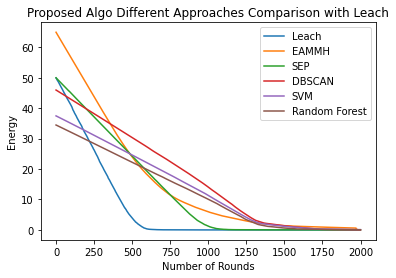

In [17]:
# Energy Graph at 0.5 J with Leach
xr = np.arange(0,2000,1)
plt.plot(xr,EnergyLeach,label='Leach')
plt.plot(xr,EnergyEAMMH,label='EAMMH')
plt.plot(xr,EnergySEP,label='SEP')
plt.plot(xr,EnergyDB,label='DBSCAN')
plt.plot(xr,EnergySVM,label='SVM')
plt.plot(xr,EnergyRand,label='Random Forest')
#plt.plot(xr,DeadNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Energy')
plt.title('Proposed Algo Different Approaches Comparison with Leach')
plt.legend()
plt.show()


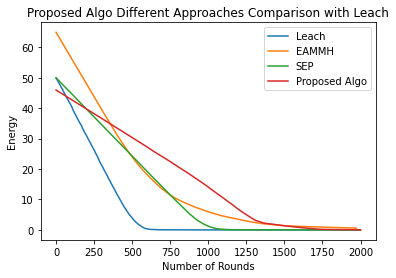

In [18]:
# Energy Graph at 0.5 J with Leach
xr = np.arange(0,2000,1)
plt.plot(xr,EnergyLeach,label='Leach')
plt.plot(xr,EnergyEAMMH,label='EAMMH')
plt.plot(xr,EnergySEP,label='SEP')
plt.plot(xr,EnergyDB,label='Proposed Algo')
#plt.plot(xr,EnergySVM,label='SVM')
#plt.plot(xr,EnergyRand,label='Random Forest')
#plt.plot(xr,DeadNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Energy')
plt.title('Proposed Algo Different Approaches Comparison with Leach')
plt.legend()
plt.show()

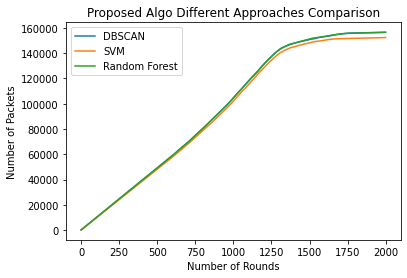

In [26]:
# Packet Transmission Graph at 0.5 J with Leach
xr = np.arange(0,2000,1)
color = ['red','blue','green','black','orange','purple']
#plt.plot(xr,pactobsLeach,label='Leach')
#plt.plot(xr,pacTobsEAMMH,label='EAMMH')
#plt.plot(xr,pactobsSEP,label='SEP')
plt.plot(xr,pacTobsDB,label='DBSCAN')
plt.plot(xr,pacTobsSVM,label='SVM')
plt.plot(xr,pactoRand,label='Random Forest')
#plt.plot(xr,DeadNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Packets')
plt.title('Proposed Algo Different Approaches Comparison')
plt.legend()
#plt.colormaps()
plt.show()

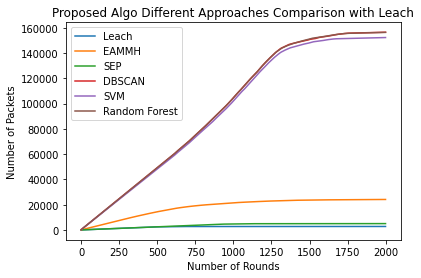

In [25]:
# Packet Transmission Graph at 0.5 J with Leach
xr = np.arange(0,2000,1)
color = ['red','blue','green','black','orange','purple']
plt.plot(xr,pactobsLeach,label='Leach')
plt.plot(xr,pacTobsEAMMH,label='EAMMH')
plt.plot(xr,pactobsSEP,label='SEP')
plt.plot(xr,pacTobsDB,label='DBSCAN')
plt.plot(xr,pacTobsSVM,label='SVM')
plt.plot(xr,pactoRand,label='Random Forest')
#plt.plot(xr,DeadNodesRand1,label='Random Forest')
plt.xlabel('Number of Rounds')
plt.ylabel('Number of Packets')
plt.title('Proposed Algo Different Approaches Comparison with Leach')
plt.legend()
#plt.colormaps()
plt.show()